In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from data_prep import DataPrep
from data_plotting import DataPlotting

import warnings
warnings.filterwarnings("ignore")

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



# Loading data

In [2]:
file_path = './data/v2_CLD/AE_3C_1D/200716-174206_174209_174205'
data_prep = DataPrep(file_path)
data = data_prep.load_data(2, 'timestamp', True)

Data  1  : 
./data/v2_CLD/AE_3C_1D/200716-174206_174209_174205\c.txt loaded.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792477 entries, 2020-07-16 08:42:07.312000 to 2020-07-16 09:06:12.722000
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mag_x        792477 non-null  float64
 1   mag_y        792477 non-null  float64
 2   mag_z        792477 non-null  float64
 3   mag_acc      792477 non-null  int64  
 4   acc_x        792477 non-null  float64
 5   acc_y        792477 non-null  float64
 6   acc_z        792477 non-null  float64
 7   acc_acc      792477 non-null  int64  
 8   gyro_x       792477 non-null  float64
 9   gyro_y       792477 non-null  float64
 10  gyro_z       792477 non-null  float64
 11  gyro_acc     792477 non-null  int64  
 12  pos_lat      792477 non-null  float64
 13  pos_lng      792477 non-null  float64
 14  pos_acc      792477 non-null  float64
 15  activity     792477 non-null

In [3]:
data = data_prep.total_intensity()

<div>
    <img src="data/earth_magnetic_field.jpg" width="250" style="float: left;">
</div>

$H = \sqrt{X^2 + Y^2}$
<br>
<br>
$F = \sqrt{H^2 + Z^2}$

In [4]:
data[0].head()

mag_x      mag_y  mag_z      mag_f  mag_acc  \
timestamp                                                              
2020-07-16 08:42:07.312  -24.5  30.300001  -33.3  51.256512        3   
2020-07-16 08:42:07.313  -24.5  30.300001  -33.3  51.256512        3   
2020-07-16 08:42:07.314  -24.5  30.300001  -33.3  51.256512        3   
2020-07-16 08:42:07.314  -24.5  30.300001  -33.3  51.256512        3   
2020-07-16 08:42:07.315  -24.5  30.300001  -33.3  51.256512        3   

                            acc_x     acc_y      acc_z  acc_acc    gyro_x  \
timestamp                                                                   
2020-07-16 08:42:07.312 -1.544260 -3.344700   9.850943        3 -1.169660   
2020-07-16 08:42:07.313 -2.009932 -3.281253  10.097546        3 -1.169660   
2020-07-16 08:42:07.314 -2.009932 -3.281253  10.097546        3 -1.153681   
2020-07-16 08:42:07.314 -2.009932 -3.281253  10.097546        3 -1.153681   
2020-07-16 08:42:07.315 -2.009932 -3.281253  10.097546        3 -1.153681   

                           gyro_y    gyro_z  gyro_acc    pos_lat     pos_lng  \
timestamp                                                                      
2020-07-16 08:42:07.312  0.033023 -1.569135         3  35.150231  129.004071   
2020-07-16 08:42:07.313  0.033023 -1.569135         3  35.150231  129.004071   
2020-07-16 08:42:07.314 -0.104396 -1.444499         3  35.150231  129.004071   
2020-07-16 08:42:07.314 -0.104396 -1.444499         3  35.150231  129.004071   
2020-07-16 08:42:07.315 -0.104396 -1.444499         3  35.150231  129.004071   

                         pos_acc activity pos_state update_from  
timestamp                                                        
2020-07-16 08:42:07.312   22.279       wk         o         GPS  
2020-07-16 08:42:07.313   22.279       wk         o         acc  
2020-07-16 08:42:07.314   22.279       wk         o        gyro  
2020-07-16 08:42:07.314   22.279       wk         o         acc  
2020-07-16 08:42:07.315   22.279       wk         o        gyro

In [5]:
data[1].head()

mag_x    mag_y      mag_z    mag_f  mag_acc  \
timestamp                                                                  
2020-07-16 08:42:13.610 -62.331707  52.4776 -20.274324  83.9654        2   
2020-07-16 08:42:13.612 -62.331707  52.4776 -20.274324  83.9654        2   
2020-07-16 08:42:13.612 -62.331707  52.4776 -20.274324  83.9654        2   
2020-07-16 08:42:13.613 -62.331707  52.4776 -20.274324  83.9654        2   
2020-07-16 08:42:13.613 -62.331707  52.4776 -20.274324  83.9654        2   

                            acc_x     acc_y     acc_z  acc_acc    gyro_x  \
timestamp                                                                  
2020-07-16 08:42:13.610 -2.513804  9.736800  8.324282        3 -0.076192   
2020-07-16 08:42:13.612 -2.513804  9.736800  8.324282        3 -0.077414   
2020-07-16 08:42:13.612 -2.291152  9.863687  8.290764        3 -0.077414   
2020-07-16 08:42:13.613 -2.291152  9.863687  8.290764        3 -0.084744   
2020-07-16 08:42:13.613 -2.092442  9.959451  8.250065        3 -0.084744   

                           gyro_y    gyro_z  gyro_acc   pos_lat     pos_lng  \
timestamp                                                                     
2020-07-16 08:42:13.610 -0.972210 -0.181118         3  35.15031  129.003927   
2020-07-16 08:42:13.612 -0.948997 -0.190891         3  35.15031  129.003927   
2020-07-16 08:42:13.612 -0.948997 -0.190891         3  35.15031  129.003927   
2020-07-16 08:42:13.613 -0.918454 -0.199444         3  35.15031  129.003927   
2020-07-16 08:42:13.613 -0.918454 -0.199444         3  35.15031  129.003927   

                         pos_acc activity pos_state update_from  
timestamp                                                        
2020-07-16 08:42:13.610    9.618       wk         o         GPS  
2020-07-16 08:42:13.612    9.618       wk         o        gyro  
2020-07-16 08:42:13.612    9.618       wk         o         acc  
2020-07-16 08:42:13.613    9.618       wk         o        gyro  
2020-07-16 08:42:13.613    9.618       wk         o         acc

In [6]:
data[2].head()

mag_x  mag_y  mag_z      mag_f  mag_acc     acc_x  \
timestamp                                                                    
2020-07-16 08:42:05.853  -20.4   39.8  -44.2  62.879567        3  0.975637   
2020-07-16 08:42:05.876  -20.4   39.8  -44.2  62.879567        3  1.543063   
2020-07-16 08:42:05.876  -21.6   39.8  -44.7  63.629317        3  1.543063   
2020-07-16 08:42:05.877  -21.6   39.8  -44.7  63.629317        3  1.543063   
2020-07-16 08:42:05.877  -21.6   39.8  -44.7  63.629317        3  1.543063   

                            acc_y     acc_z  acc_acc    gyro_x    gyro_y  \
timestamp                                                                  
2020-07-16 08:42:05.853 -0.445322  8.765172        3  0.209857 -1.663943   
2020-07-16 08:42:05.876 -0.349553  9.017760        3  0.209857 -1.663943   
2020-07-16 08:42:05.876 -0.349553  9.017760        3  0.209857 -1.663943   
2020-07-16 08:42:05.877 -0.349553  9.017760        3  0.372843 -1.679922   
2020-07-16 08:42:05.877 -0.349553  9.017760        3  0.372843 -1.679922   

                           gyro_z  gyro_acc    pos_lat    pos_lng  pos_acc  \
timestamp                                                                    
2020-07-16 08:42:05.853 -0.752077         3  35.150136  128.99892   1700.0   
2020-07-16 08:42:05.876 -0.752077         3  35.150136  128.99892   1700.0   
2020-07-16 08:42:05.876 -0.752077         3  35.150136  128.99892   1700.0   
2020-07-16 08:42:05.877 -0.794687         3  35.150136  128.99892   1700.0   
2020-07-16 08:42:05.877 -0.794687         3  35.150136  128.99892   1700.0   

                        activity pos_state update_from  
timestamp                                               
2020-07-16 08:42:05.853       wk         o         GPS  
2020-07-16 08:42:05.876       wk         o         acc  
2020-07-16 08:42:05.876       wk         o         mag  
2020-07-16 08:42:05.877       wk         o        gyro  
2020-07-16 08:42:05.877       wk         o         acc

## Plotting data

In [7]:
data_plotting = DataPlotting()

### First data (ex : case)

In [8]:
dir_name = 'E8508BDFF2AE'
file_name = '20200716_174206'

Start :
 2020-07-16 08:42:07.312000
End :
 2020-07-16 09:06:12.722000
Time delta :
 0 days 00:24:05.410000
Shape :
 (792477, 19) 



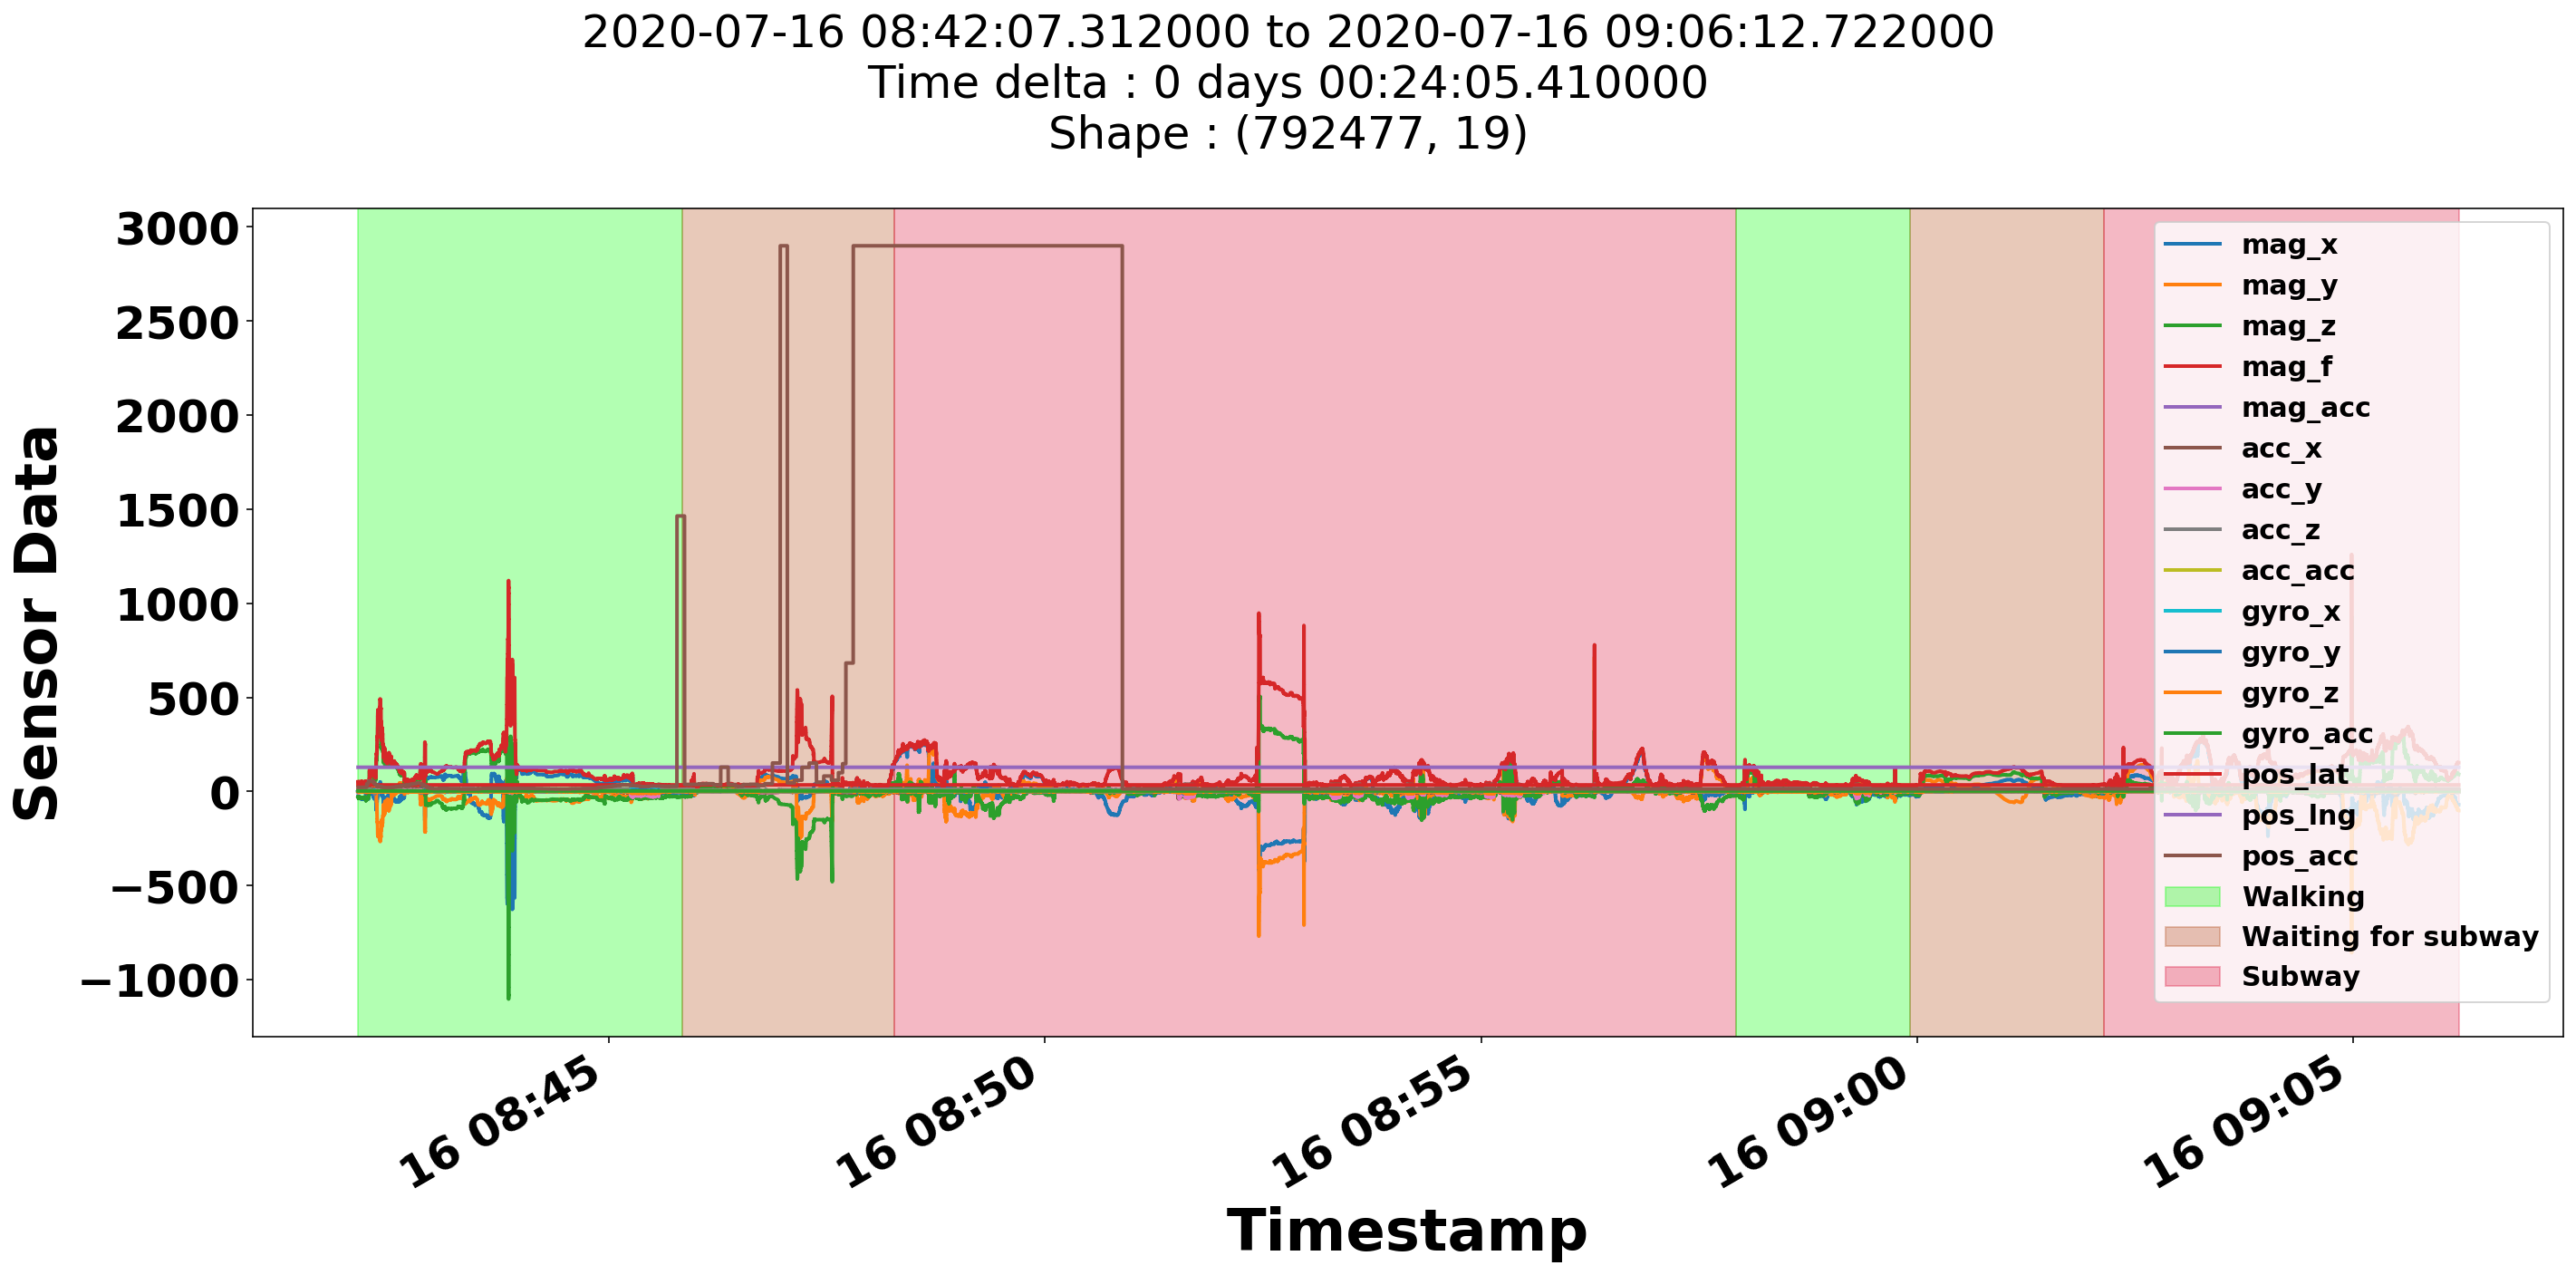

In [9]:
data_plotting.plot_data(data[0], 'Timestamp', 'Sensor Data', 15, dir_name, file_name, True)

Start :
 2020-07-16 08:43:00.031000
End :
 2020-07-16 08:44:59.999000
Time delta :
 0 days 00:01:59.968000
Shape :
 (66610, 19) 



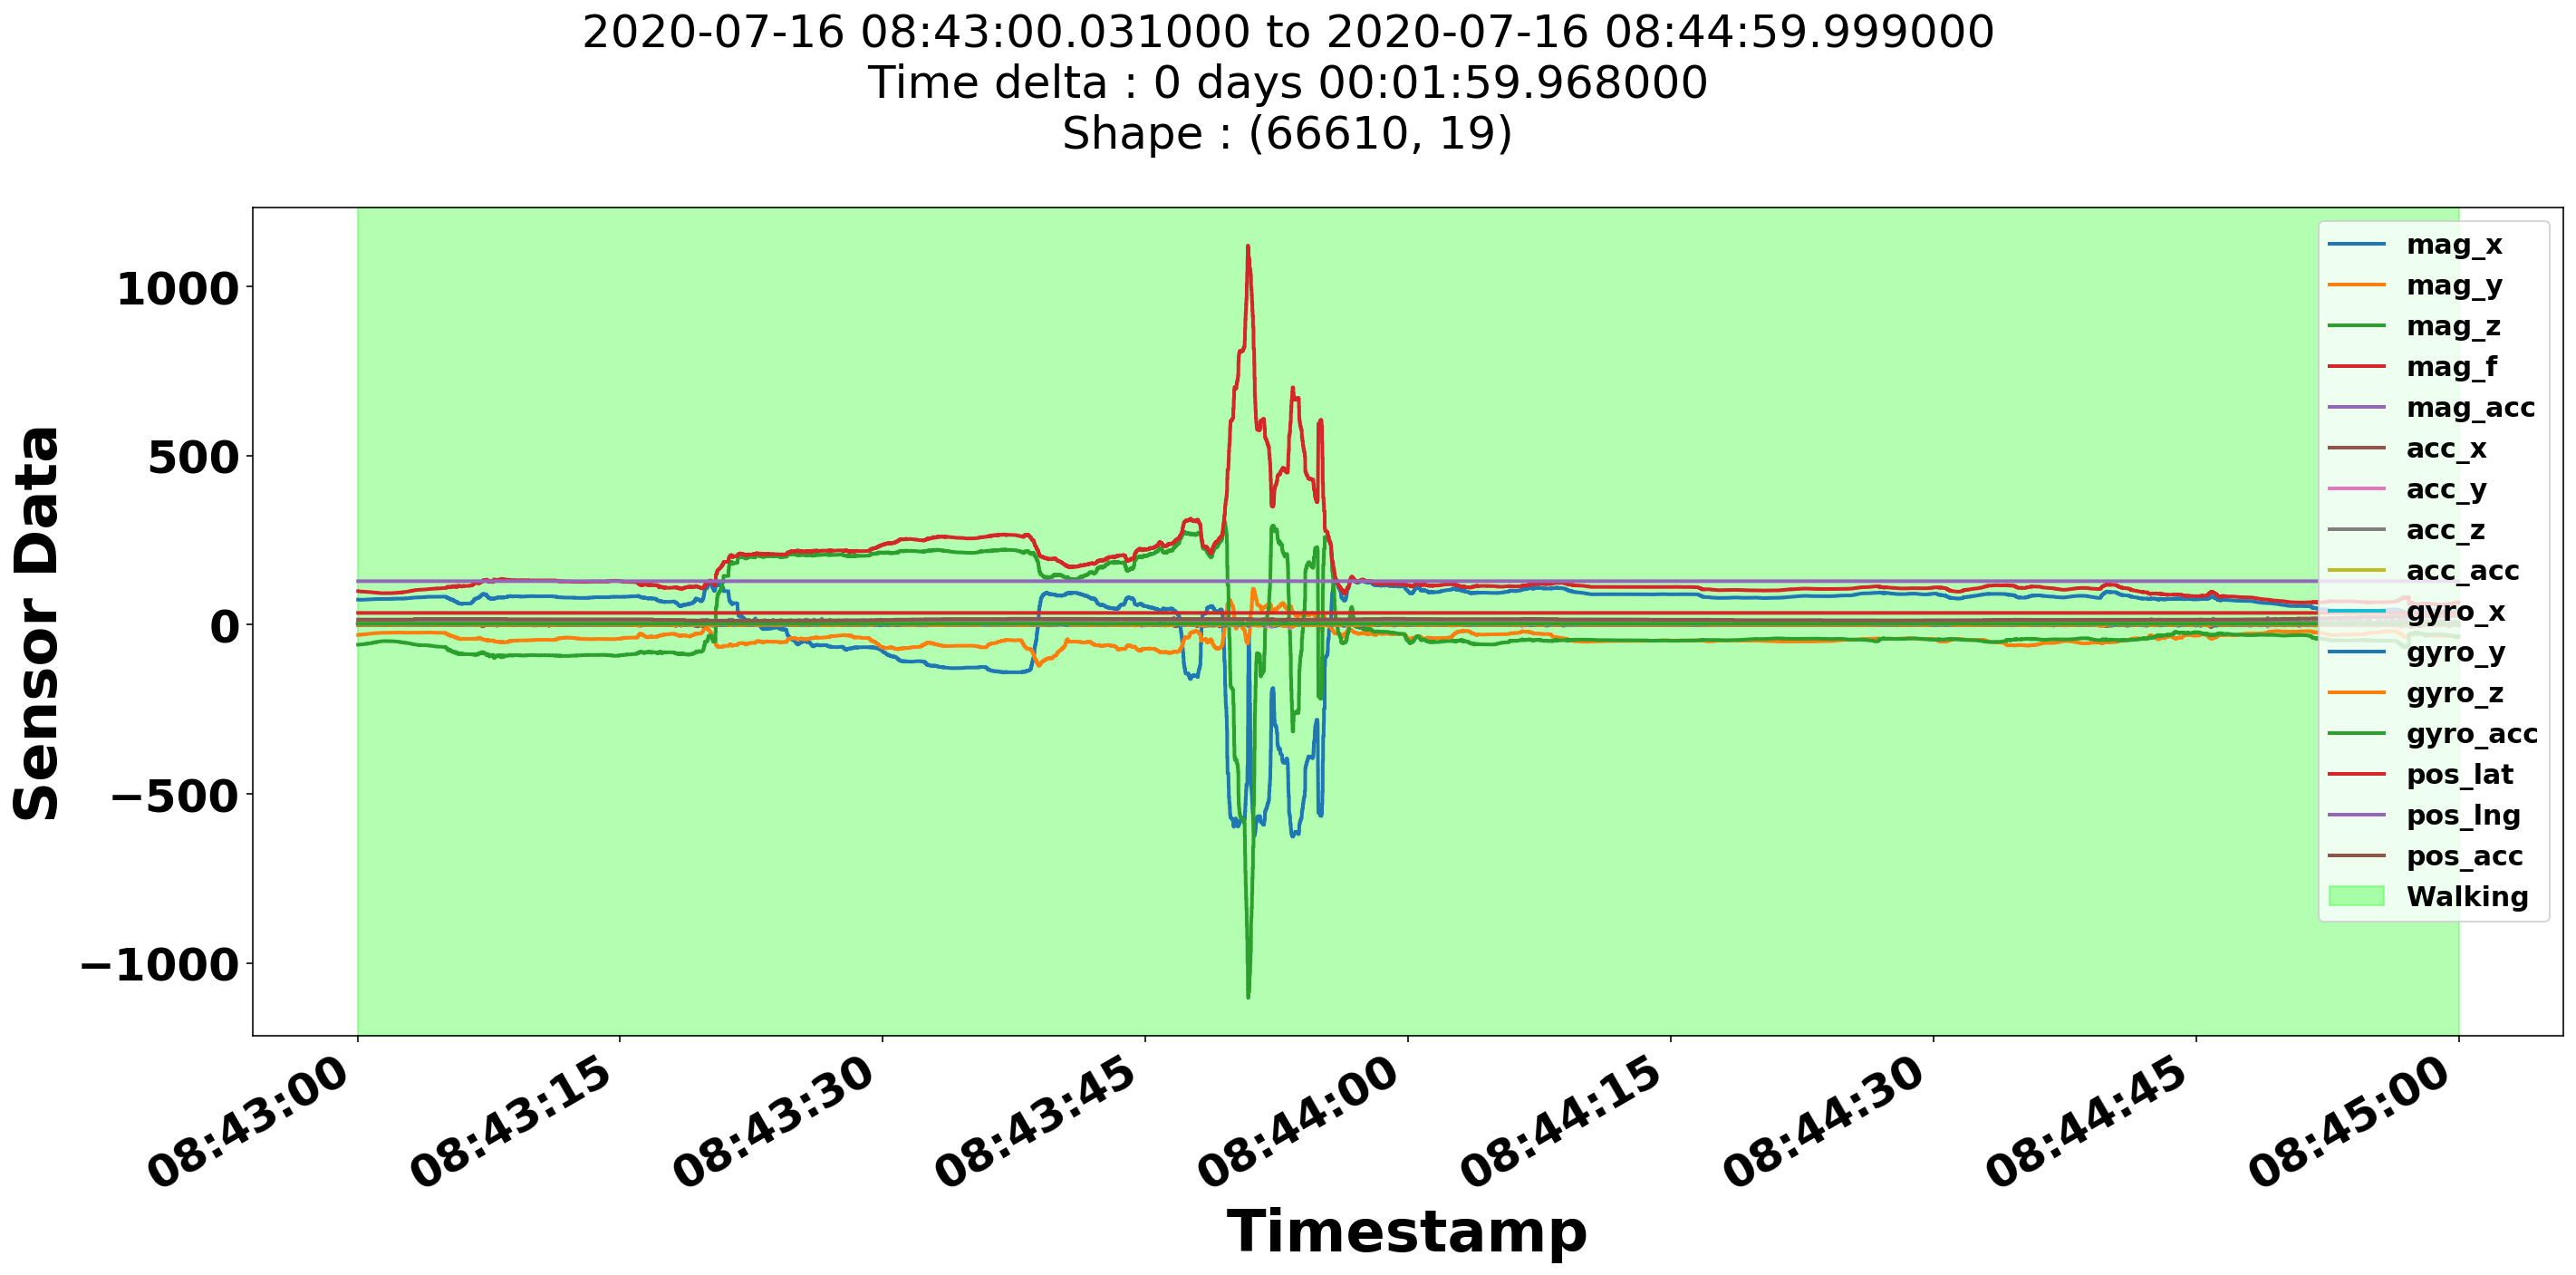

In [10]:
data_plotting.plot_data(data[0]["2020-07-16 08:43":"2020-07-16 08:44"],
                          'Timestamp', 'Sensor Data', 15, dir_name, file_name + '_st_1', True)

### Second data - (ex : suspected case 1)

In [11]:
dir_name = 'A8346A9C5F3C'
file_name = '20200716_174209'

Start :
 2020-07-16 08:42:13.610000
End :
 2020-07-16 09:06:18.015000
Time delta :
 0 days 00:24:04.405000
Shape :
 (1352906, 19) 



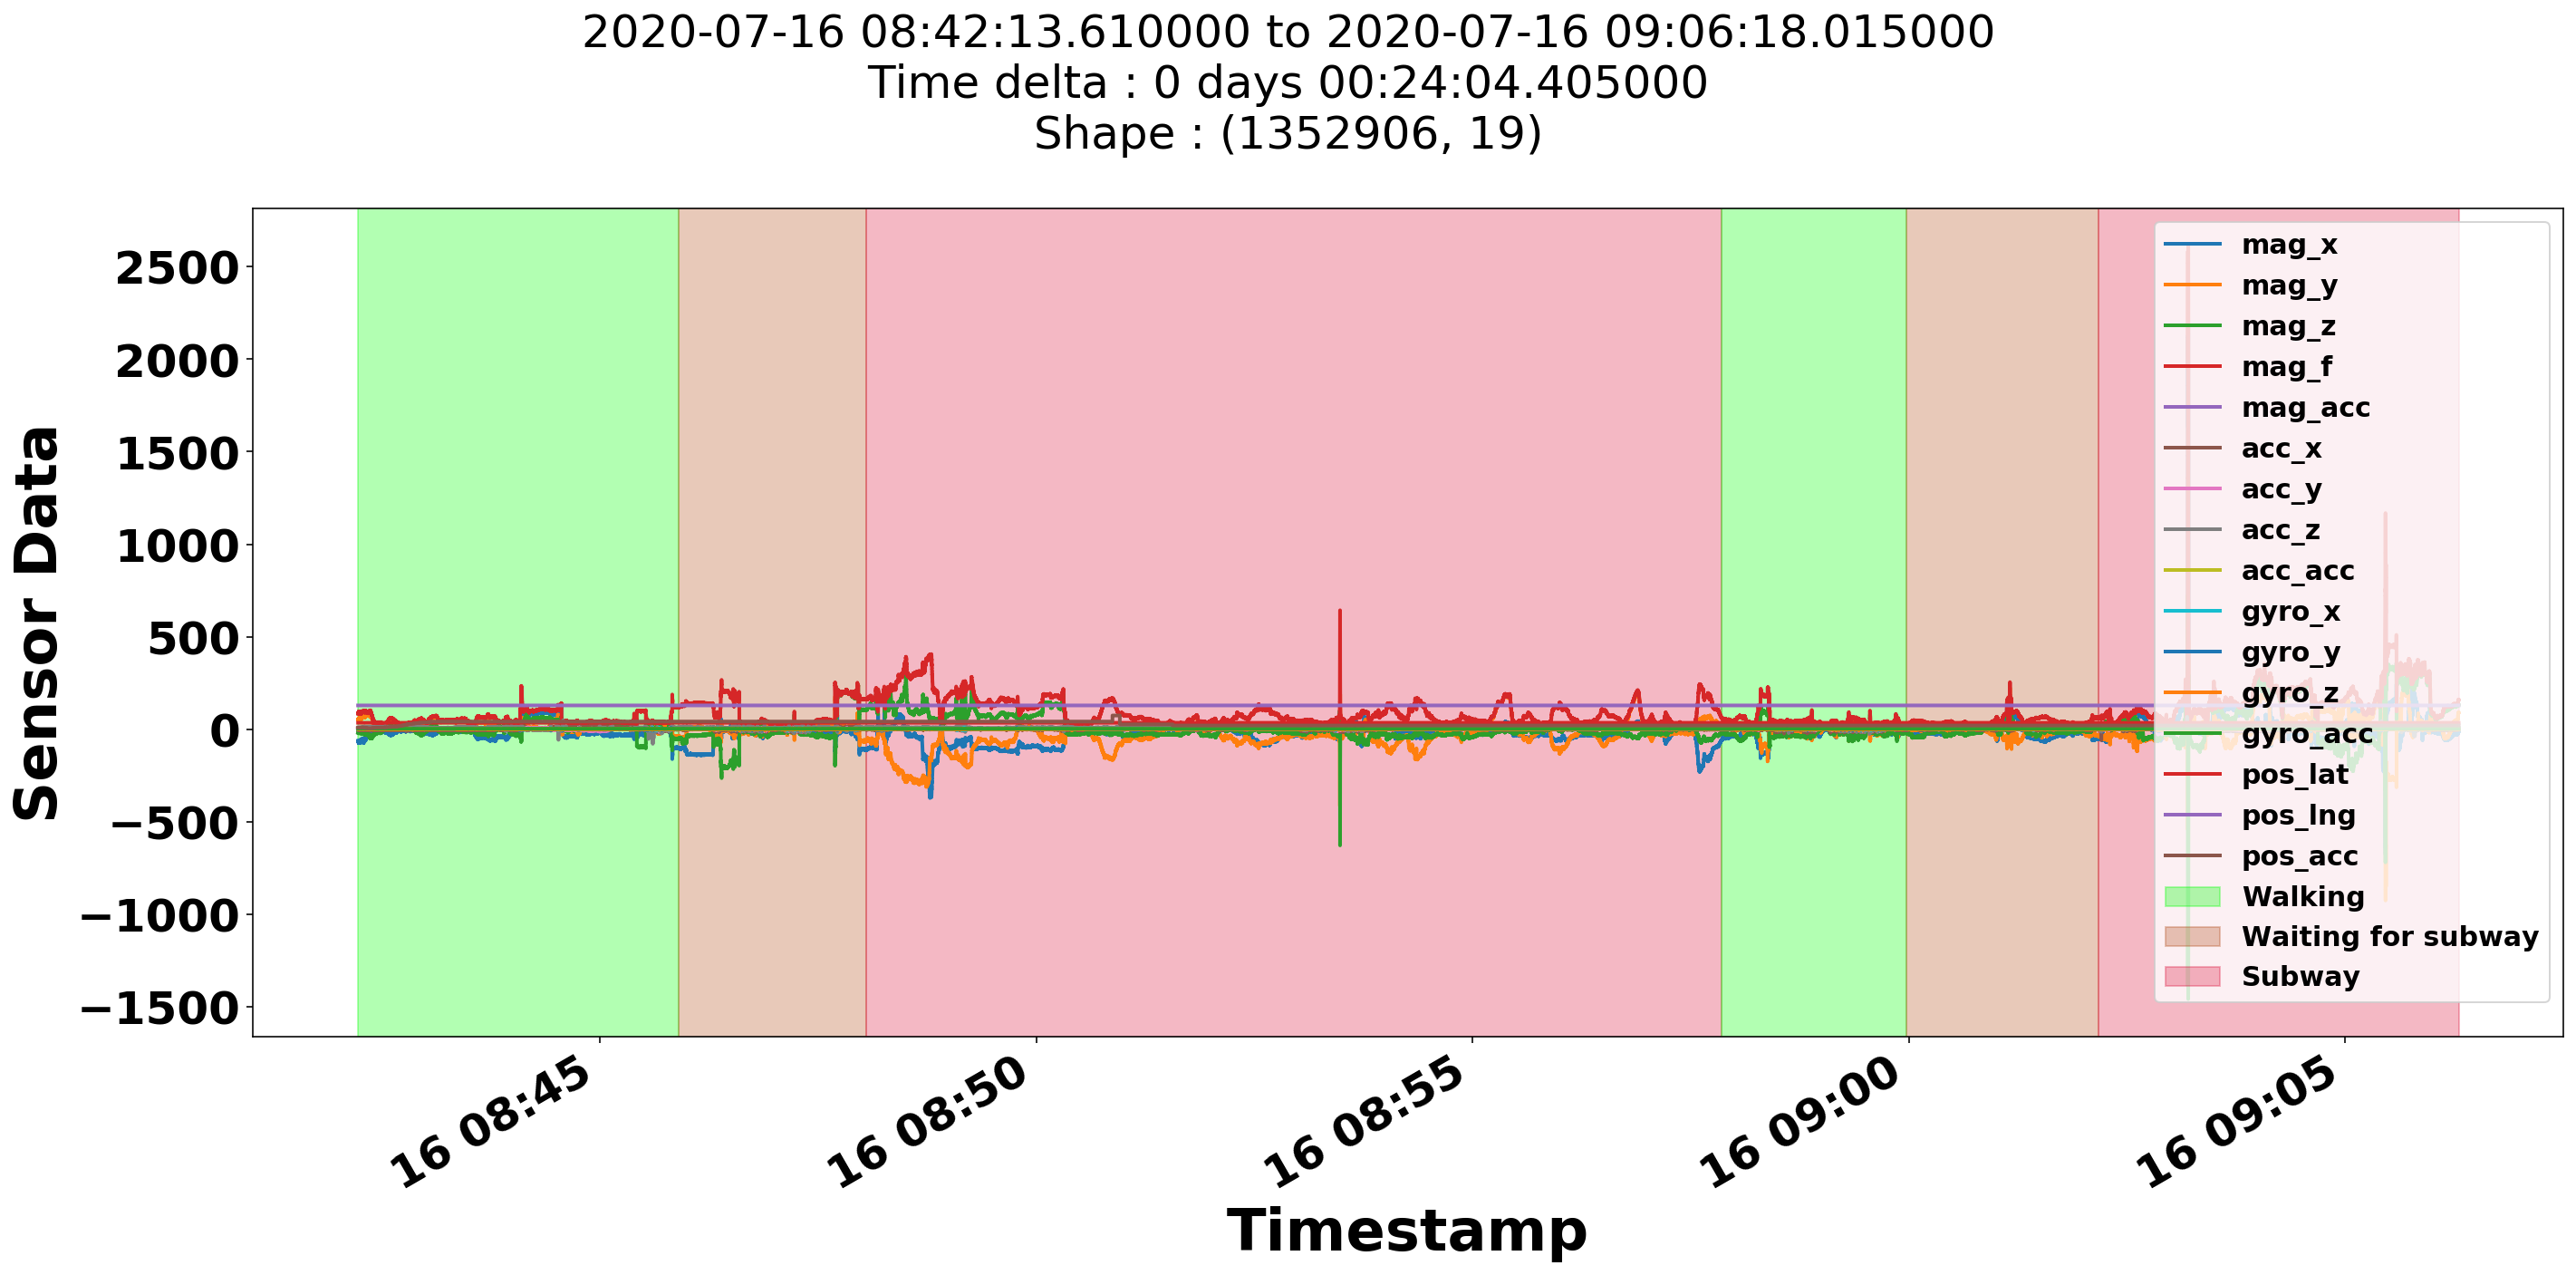

In [12]:
data_plotting.plot_data(data[1], 'Timestamp', 'Sensor Data', 15, dir_name, file_name , True)

Start :
 2020-07-16 08:43:00.003000
End :
 2020-07-16 08:44:59.999000
Time delta :
 0 days 00:01:59.996000
Shape :
 (112651, 19) 



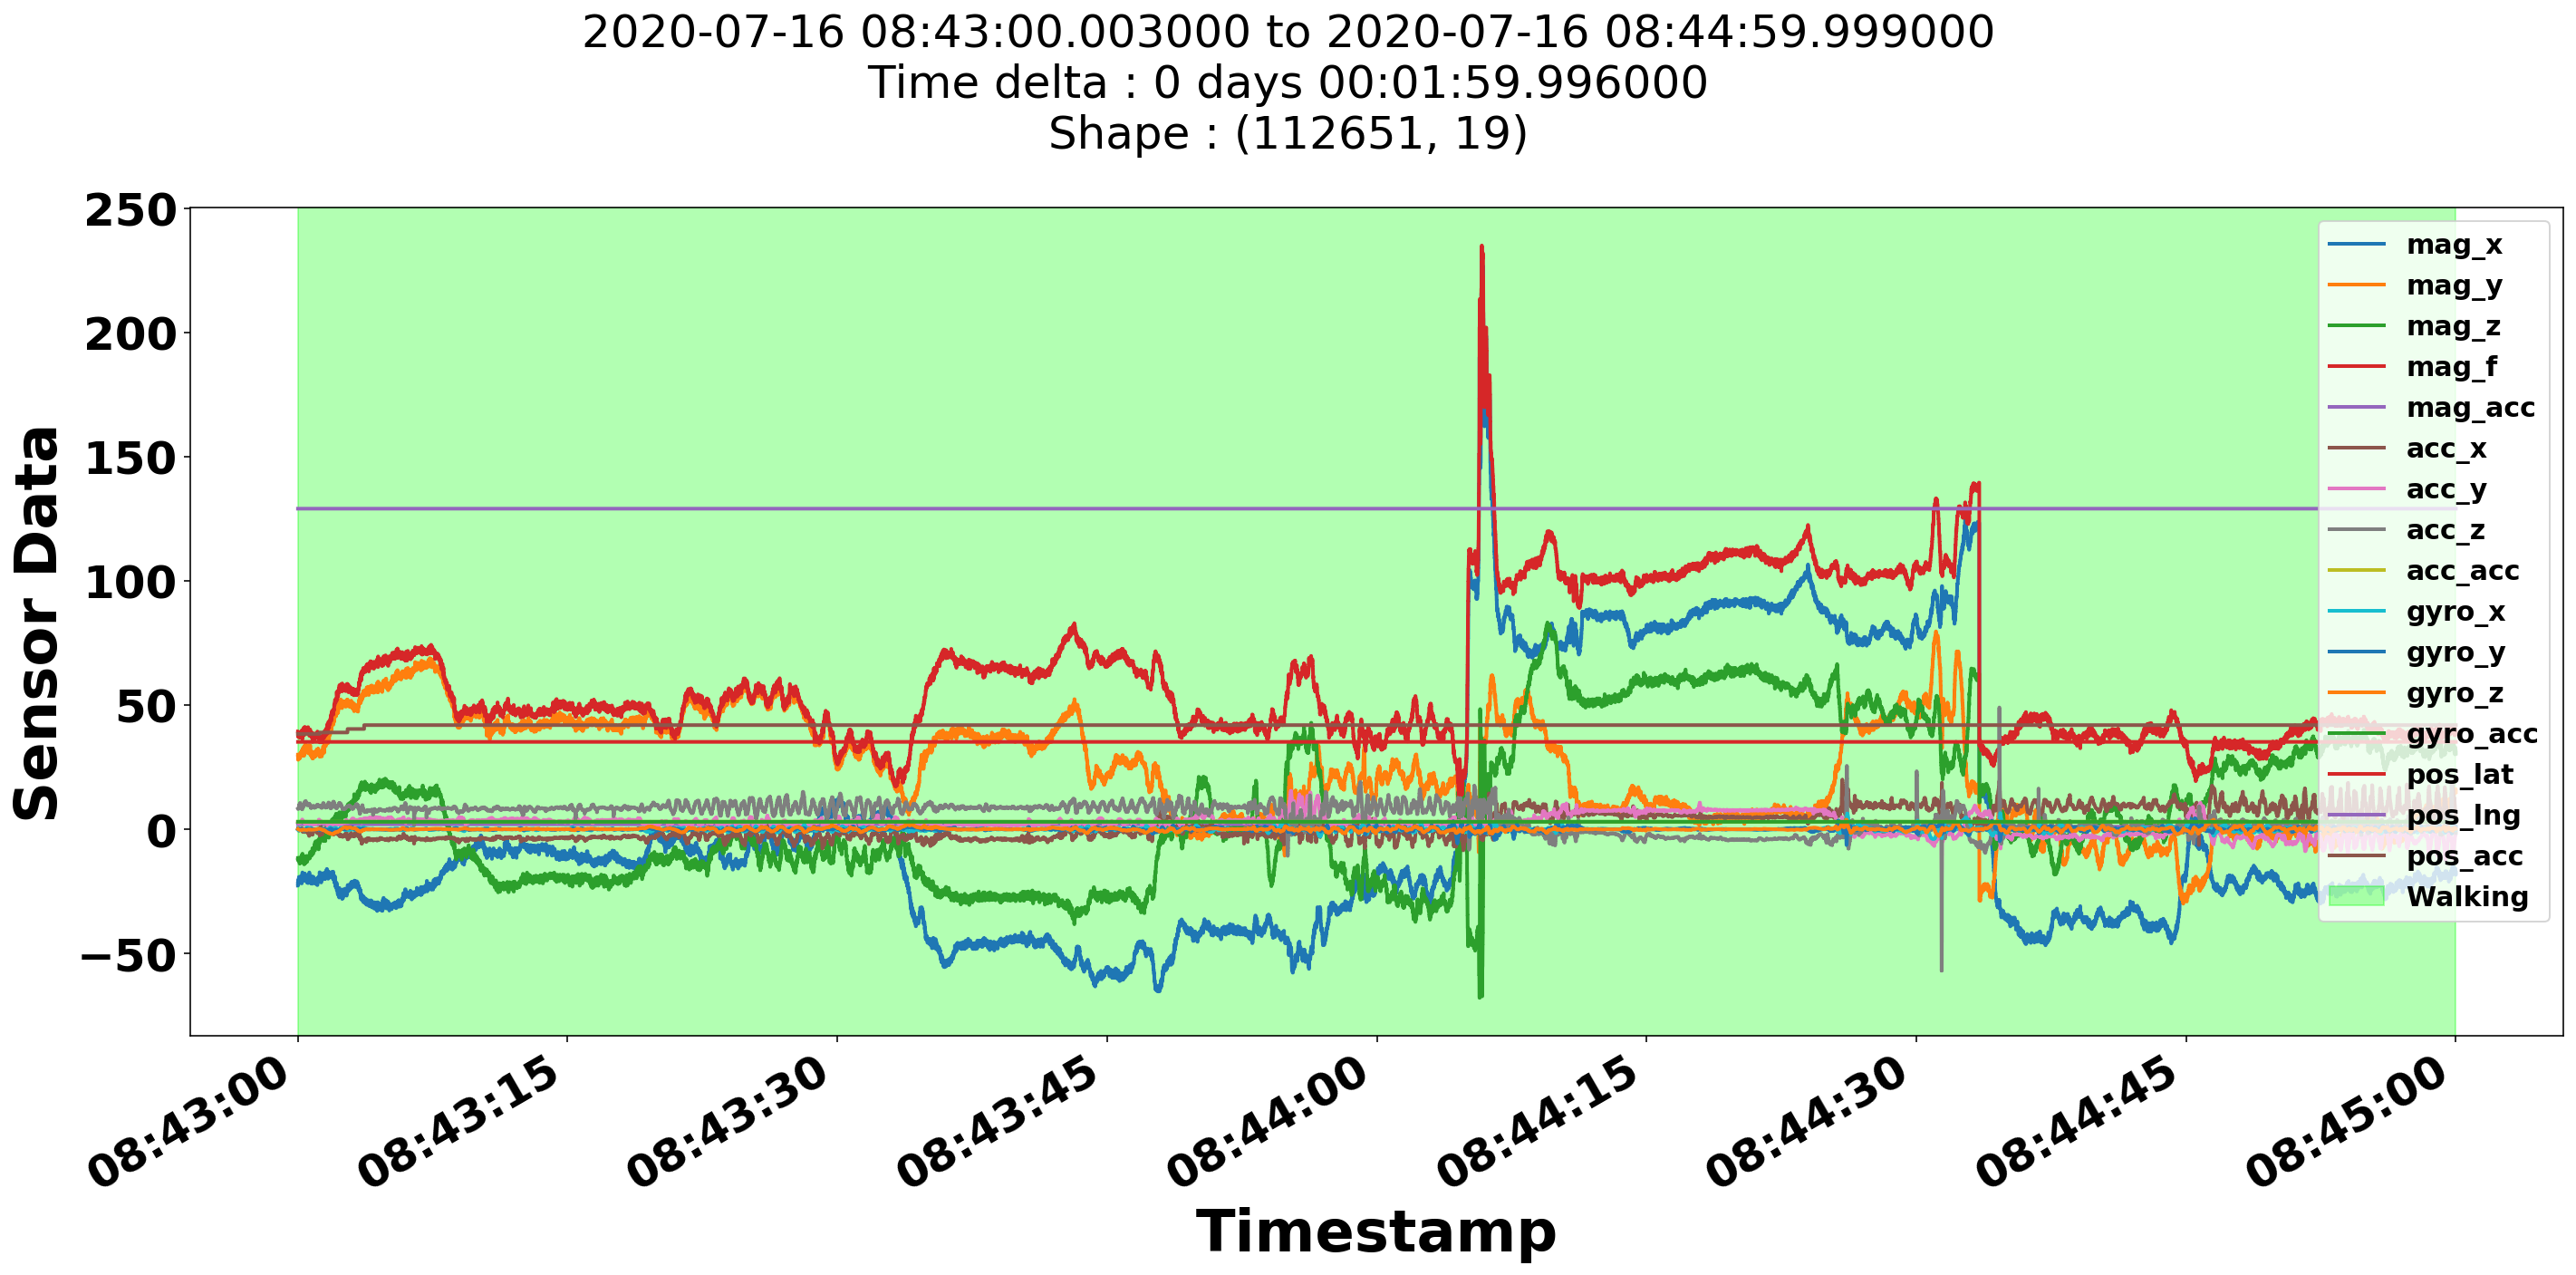

In [13]:
data_plotting.plot_data(data[1]["2020-07-16 08:43":"2020-07-16 08:44"], 
                          'Timestamp', 'Sensor Data', 15, dir_name, file_name + '_st_1', True)

### Third data  - (ex : suspected case 2)

In [14]:
dir_name = 'F4428F5EB41D'
file_name = '20200716_174205'

Start :
 2020-07-16 08:42:05.853000
End :
 2020-07-16 09:06:11.870000
Time delta :
 0 days 00:24:06.017000
Shape :
 (783535, 19) 



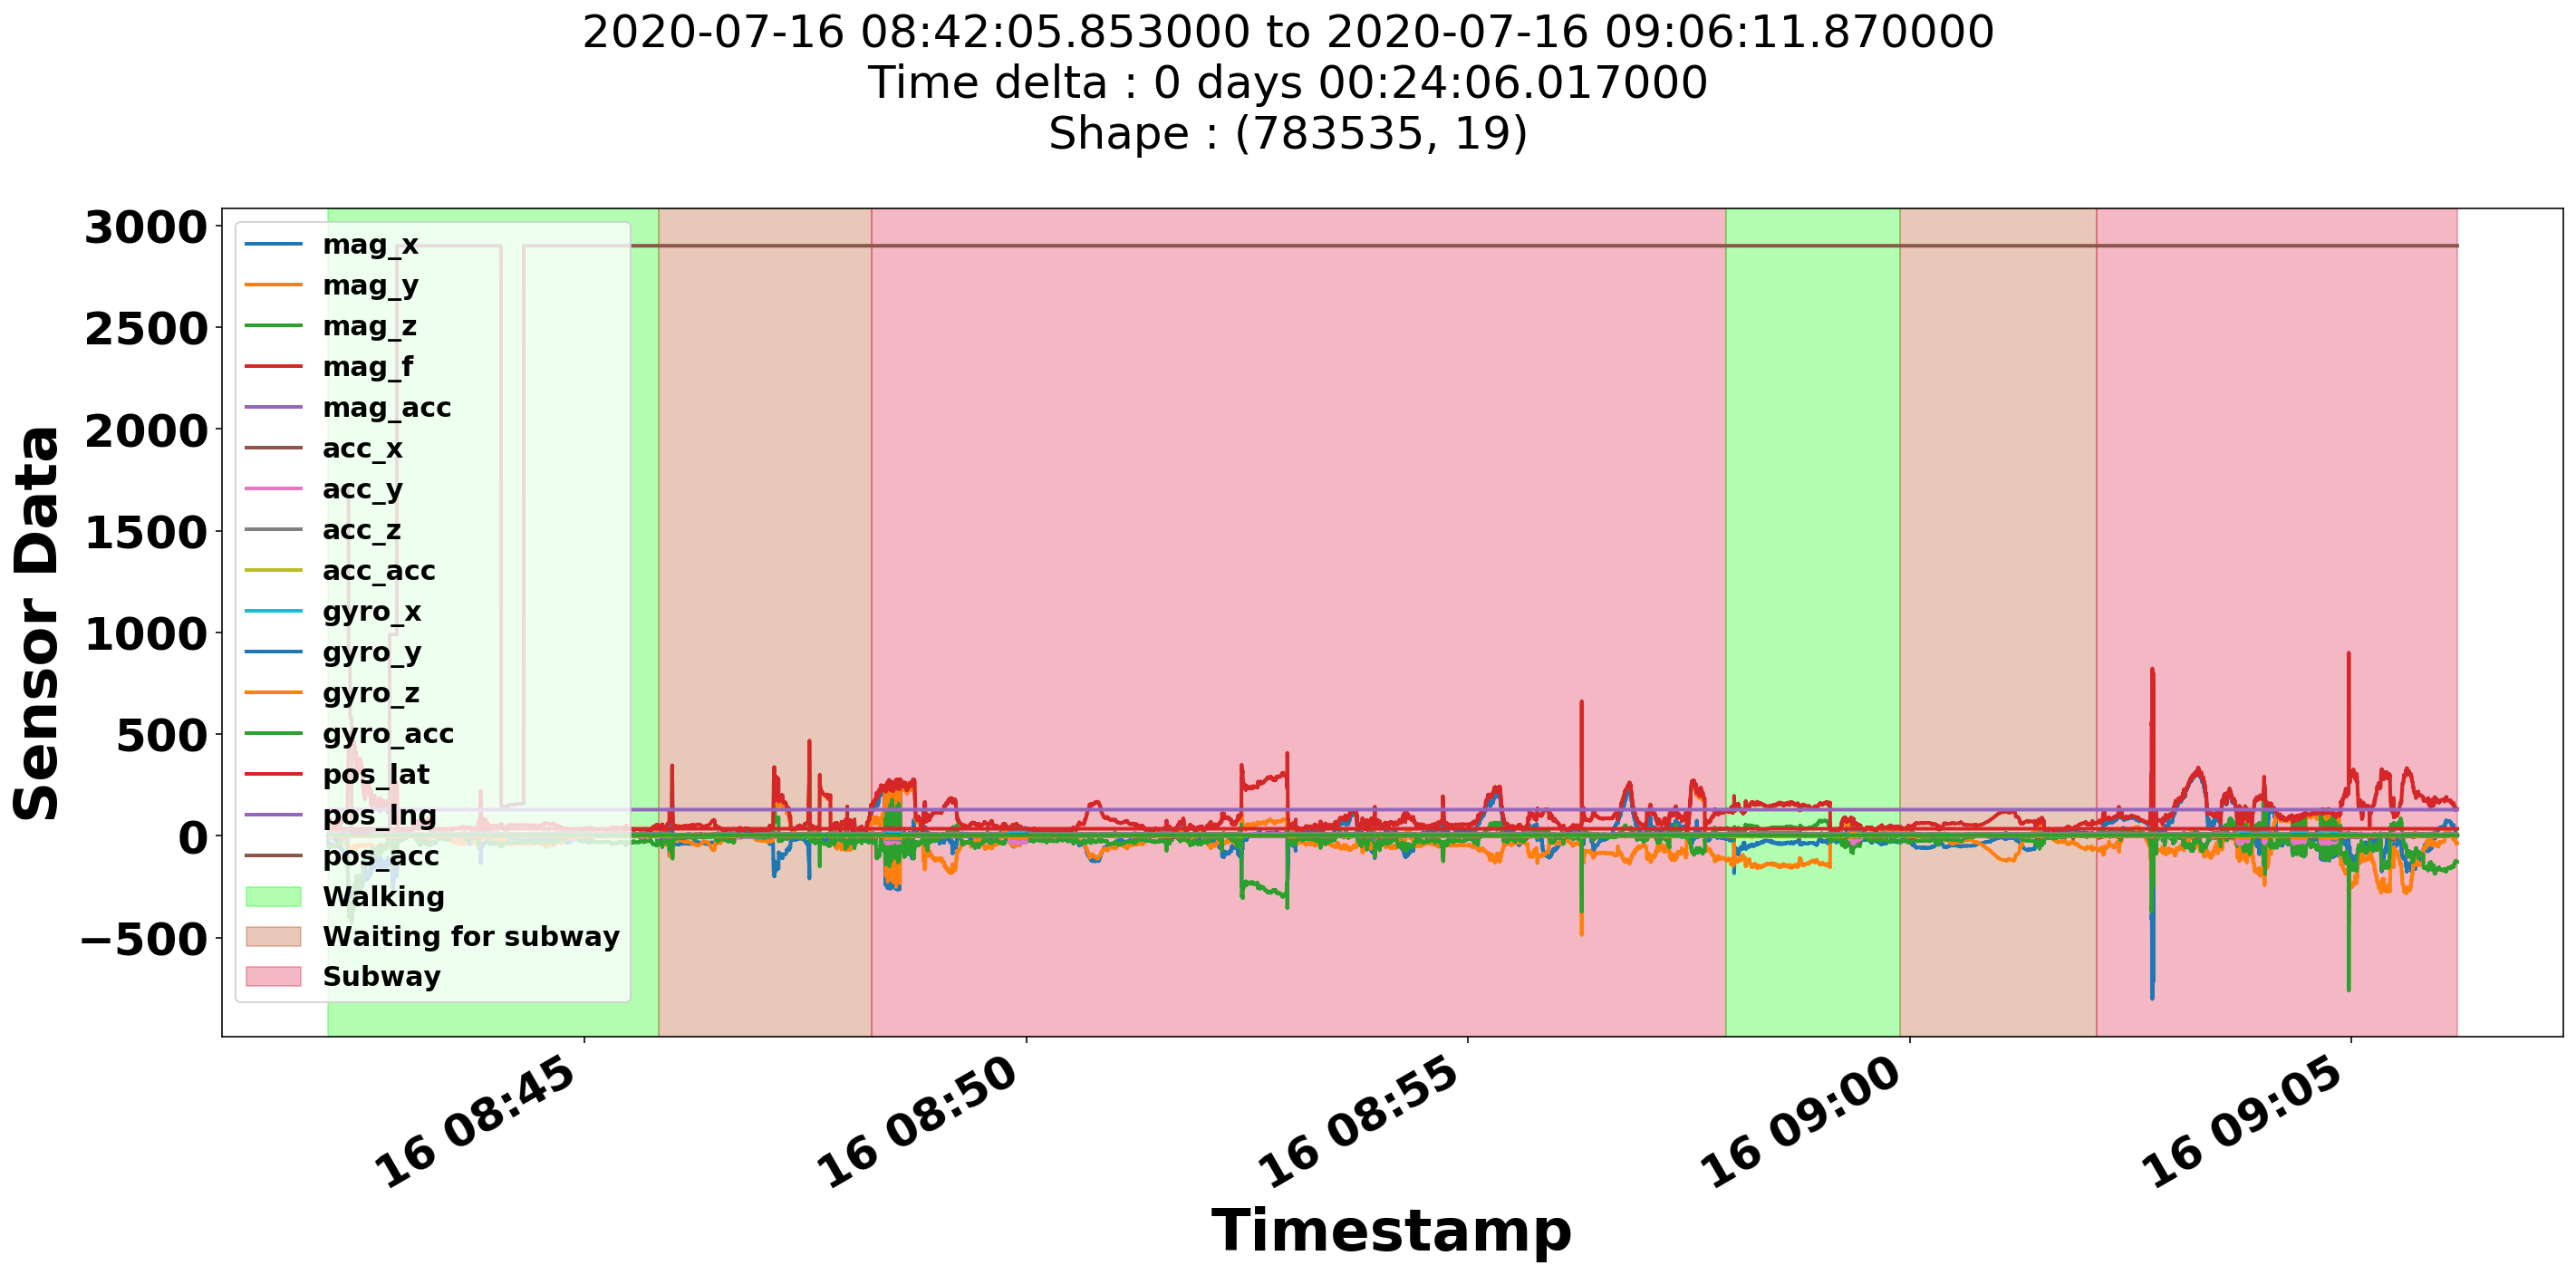

In [15]:
data_plotting.plot_data(data[2], 'Timestamp', 'Sensor Data', 15, dir_name, file_name, True)

Start :
 2020-07-16 08:43:00.008000
End :
 2020-07-16 08:44:59.999000
Time delta :
 0 days 00:01:59.991000
Shape :
 (63962, 19) 



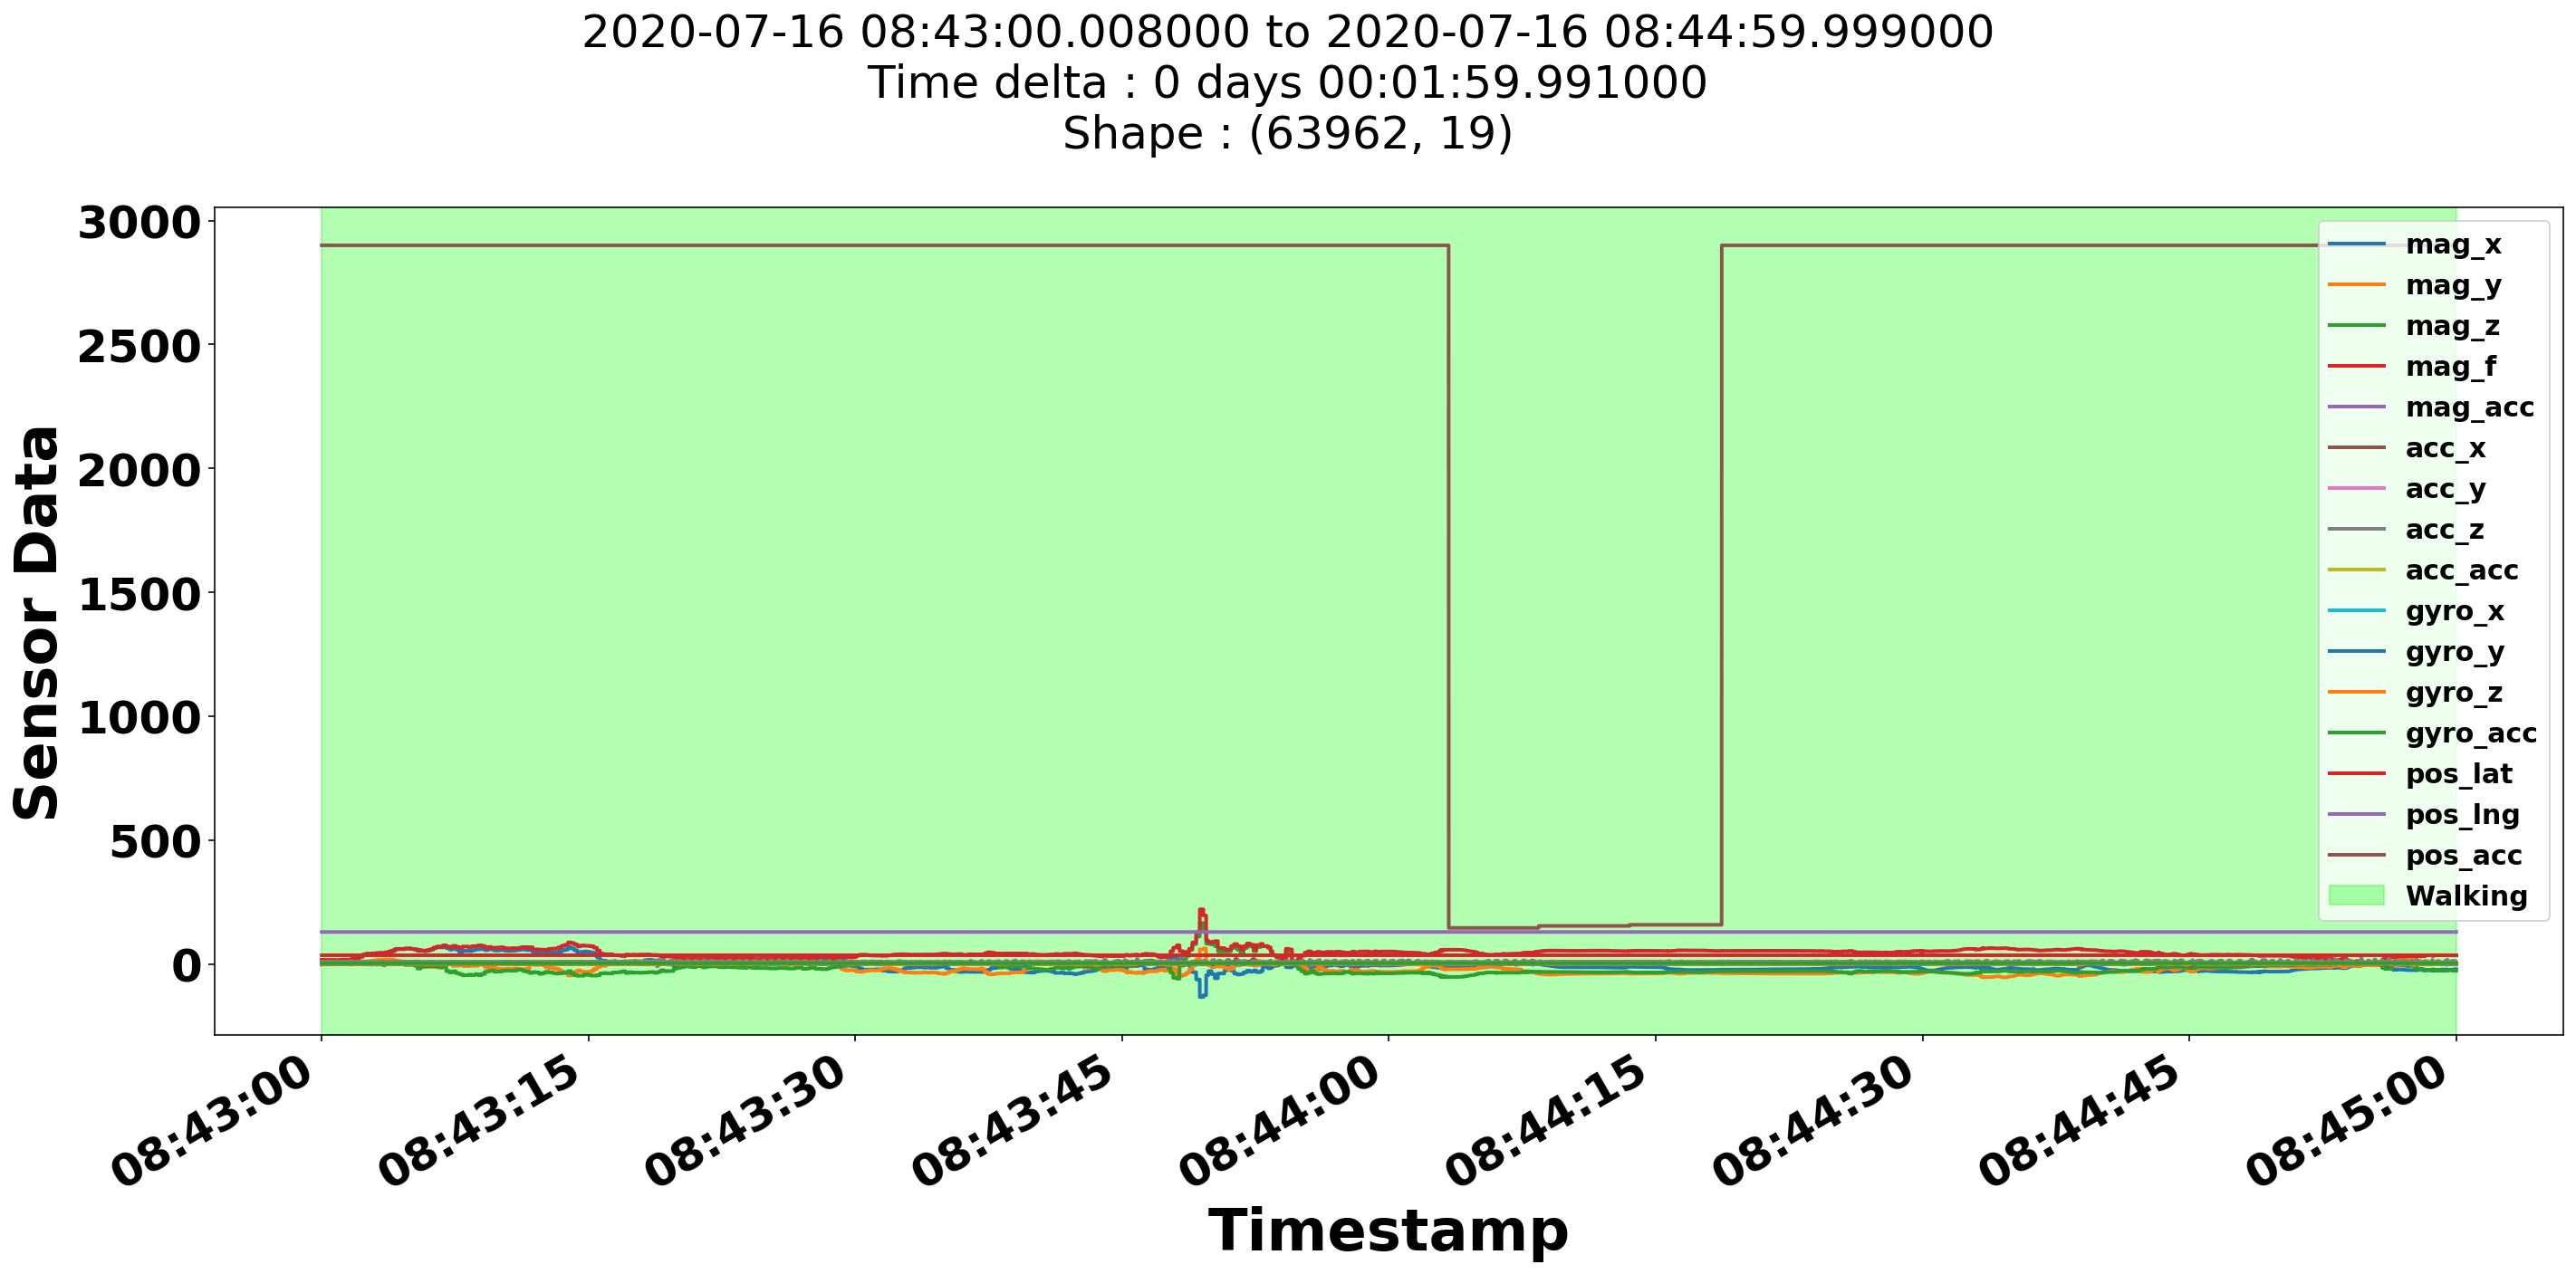

In [16]:
data_plotting.plot_data(data[2]["2020-07-16 08:43":"2020-07-16 08:44"],
                          'Timestamp', 'Sensor Data', 15, dir_name, file_name + '_st_1', True)

### Subplot

In [17]:
dir_name = 'AE_3C_1D'
file_name = '200716-174206_174209_174205'

Data 1 : 
Start :
 2020-07-16 08:42:14
End :
 2020-07-16 09:06:11.989000
Time delta :
 0 days 00:23:57.989000
Shape :
 (788292, 19) 

Data 2 : 
Start :
 2020-07-16 08:42:14.002000
End :
 2020-07-16 09:06:11.999000
Time delta :
 0 days 00:23:57.997000
Shape :
 (1346921, 19) 

Data 3 : 
Start :
 2020-07-16 08:42:14.001000
End :
 2020-07-16 09:06:11.870000
Time delta :
 0 days 00:23:57.869000
Shape :
 (779209, 19) 



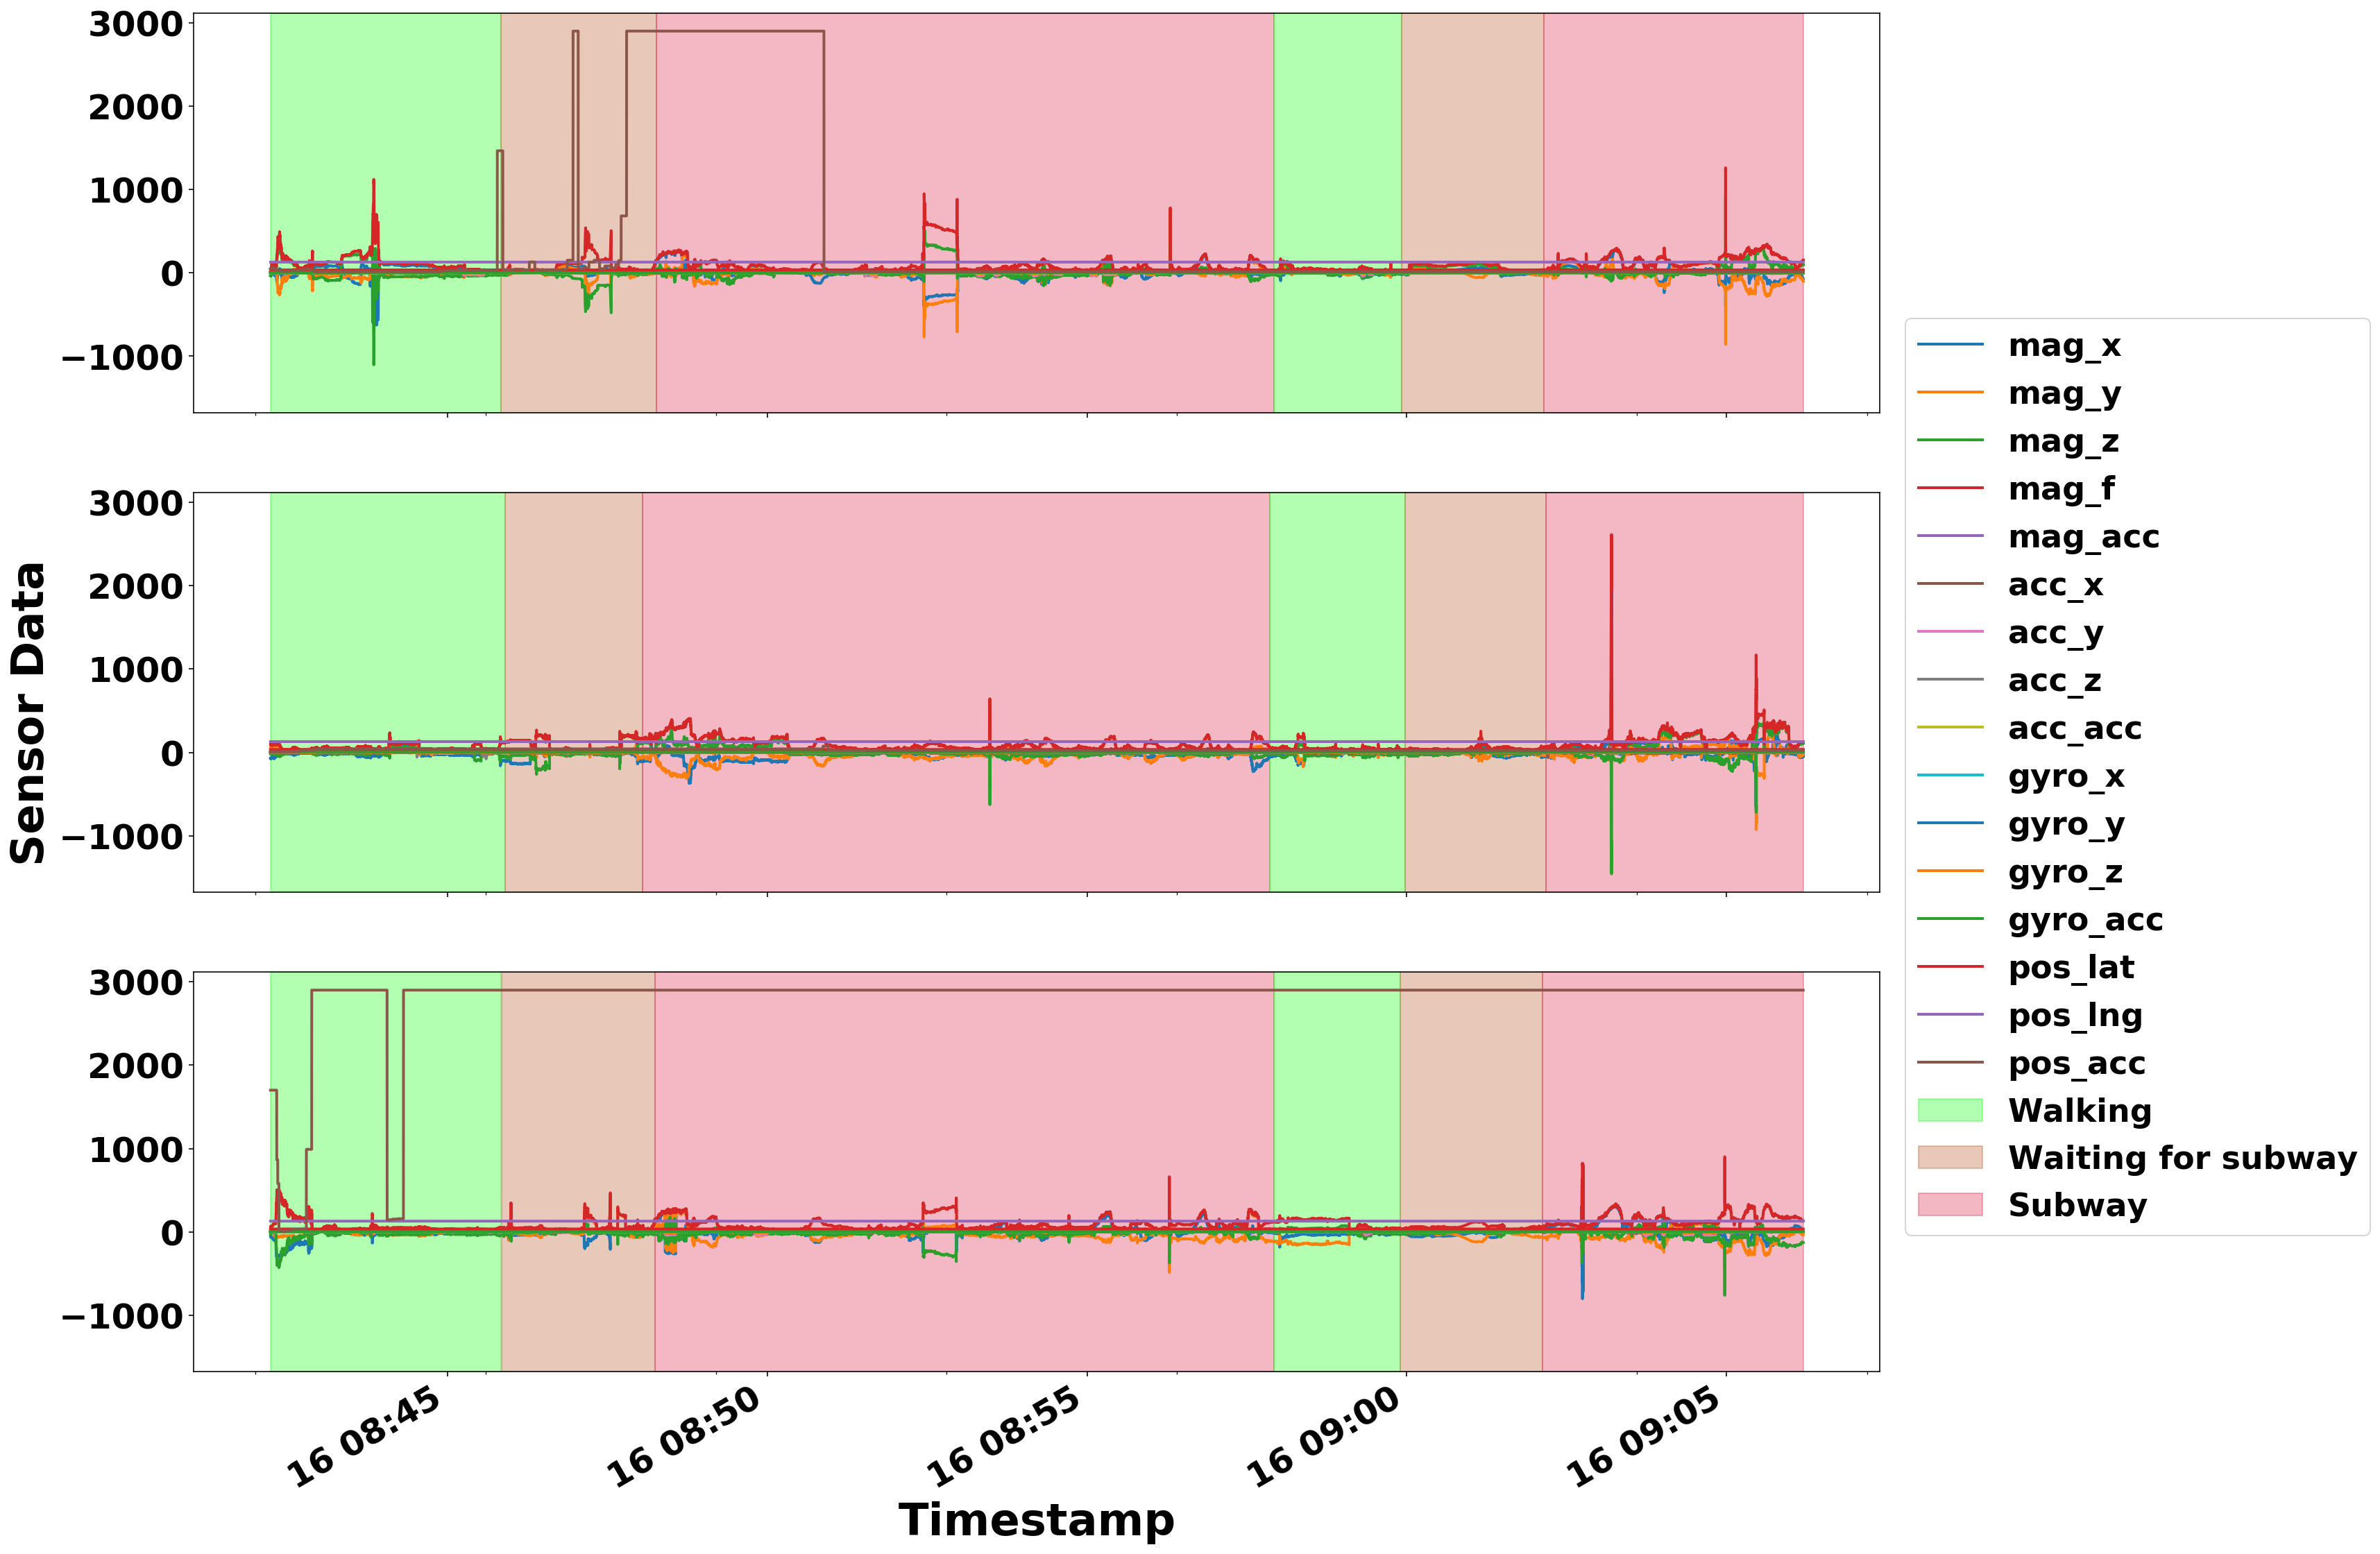

In [18]:
data_display = data[0].columns
time_from = "2020-07-16 08:42:14"
time_to = "2020-07-16 09:06:11"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.8), 27, (25, 20),
                               dir_name, file_name, True)

Data 1 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (65248, 19) 

Data 2 : 
Start :
 2020-07-16 08:50:00.001000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.998000
Shape :
 (113588, 19) 

Data 3 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (66521, 19) 



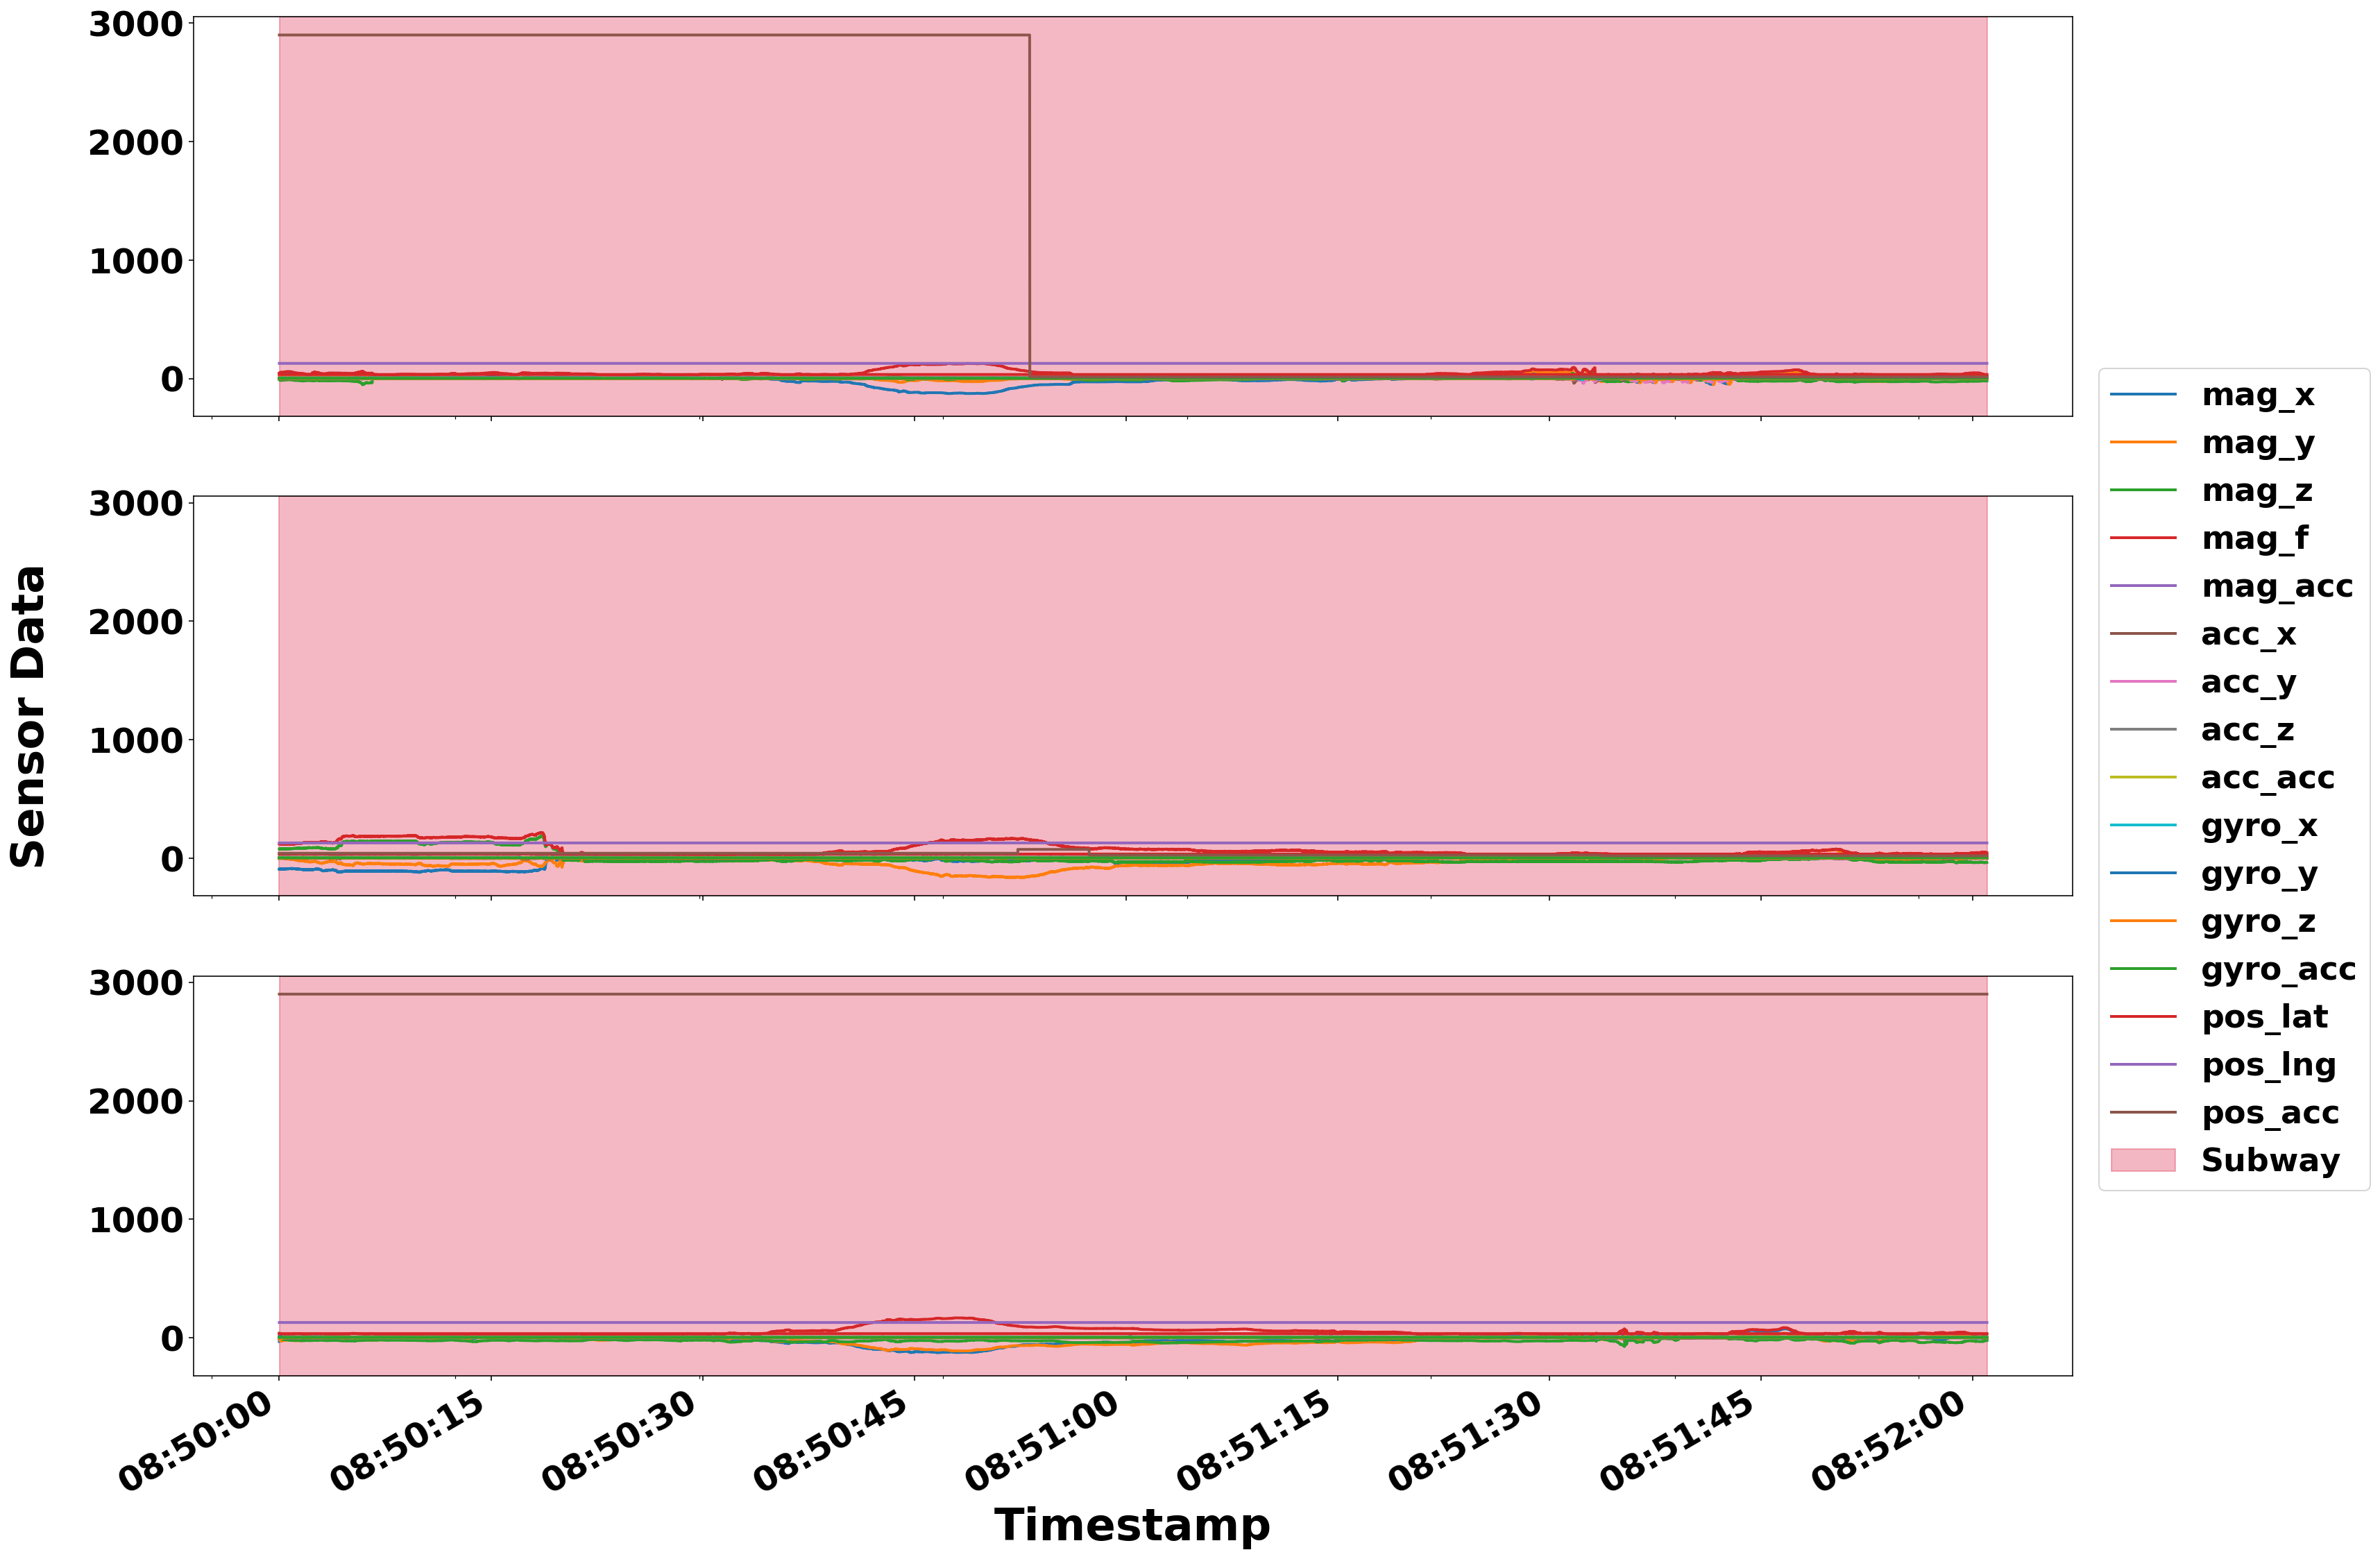

In [19]:
data_display = data[0].columns
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.877), 27, (25, 20),
                               dir_name, file_name + '_st_1', True)

Data 1 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (65248, 5) 

Data 2 : 
Start :
 2020-07-16 08:50:00.001000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.998000
Shape :
 (113588, 5) 

Data 3 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (66521, 5) 



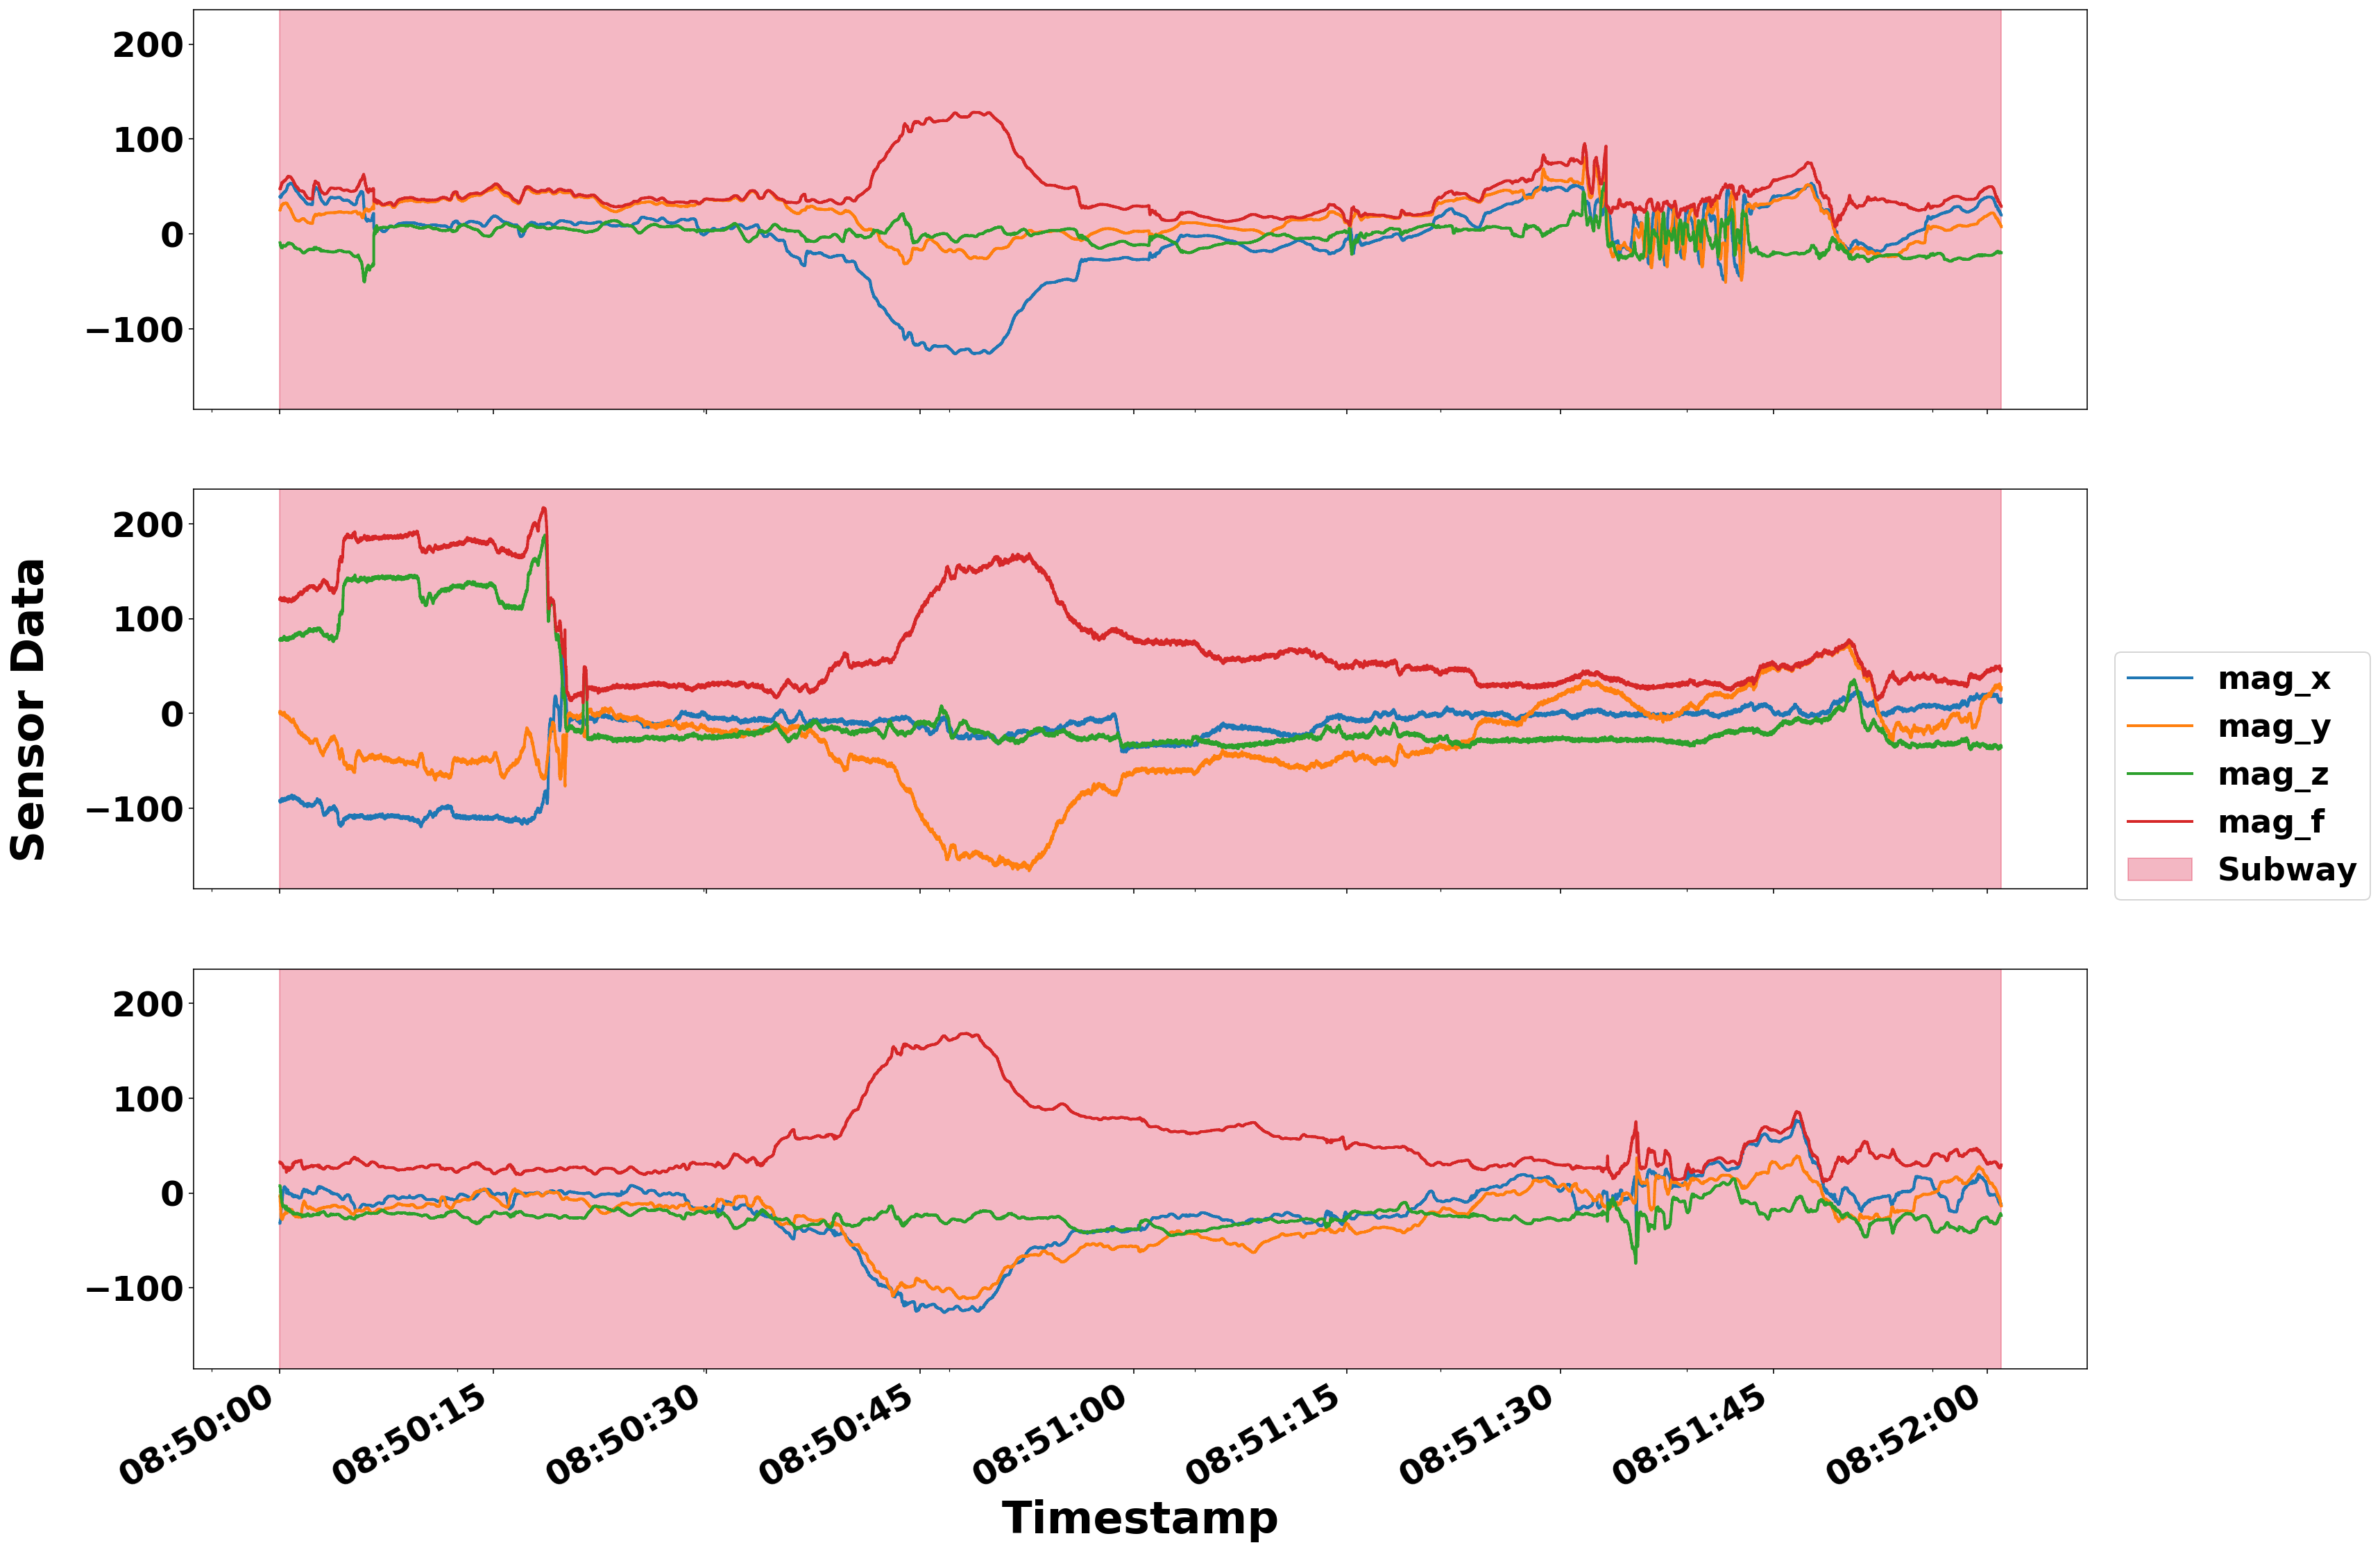

In [20]:
data_display = ['mag_x','mag_y','mag_z','mag_f','activity']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.883), 27, (25, 20),
                             dir_name, file_name + '_st_2', True)

Data 1 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (65248, 2) 

Data 2 : 
Start :
 2020-07-16 08:50:00.001000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.998000
Shape :
 (113588, 2) 

Data 3 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (66521, 2) 



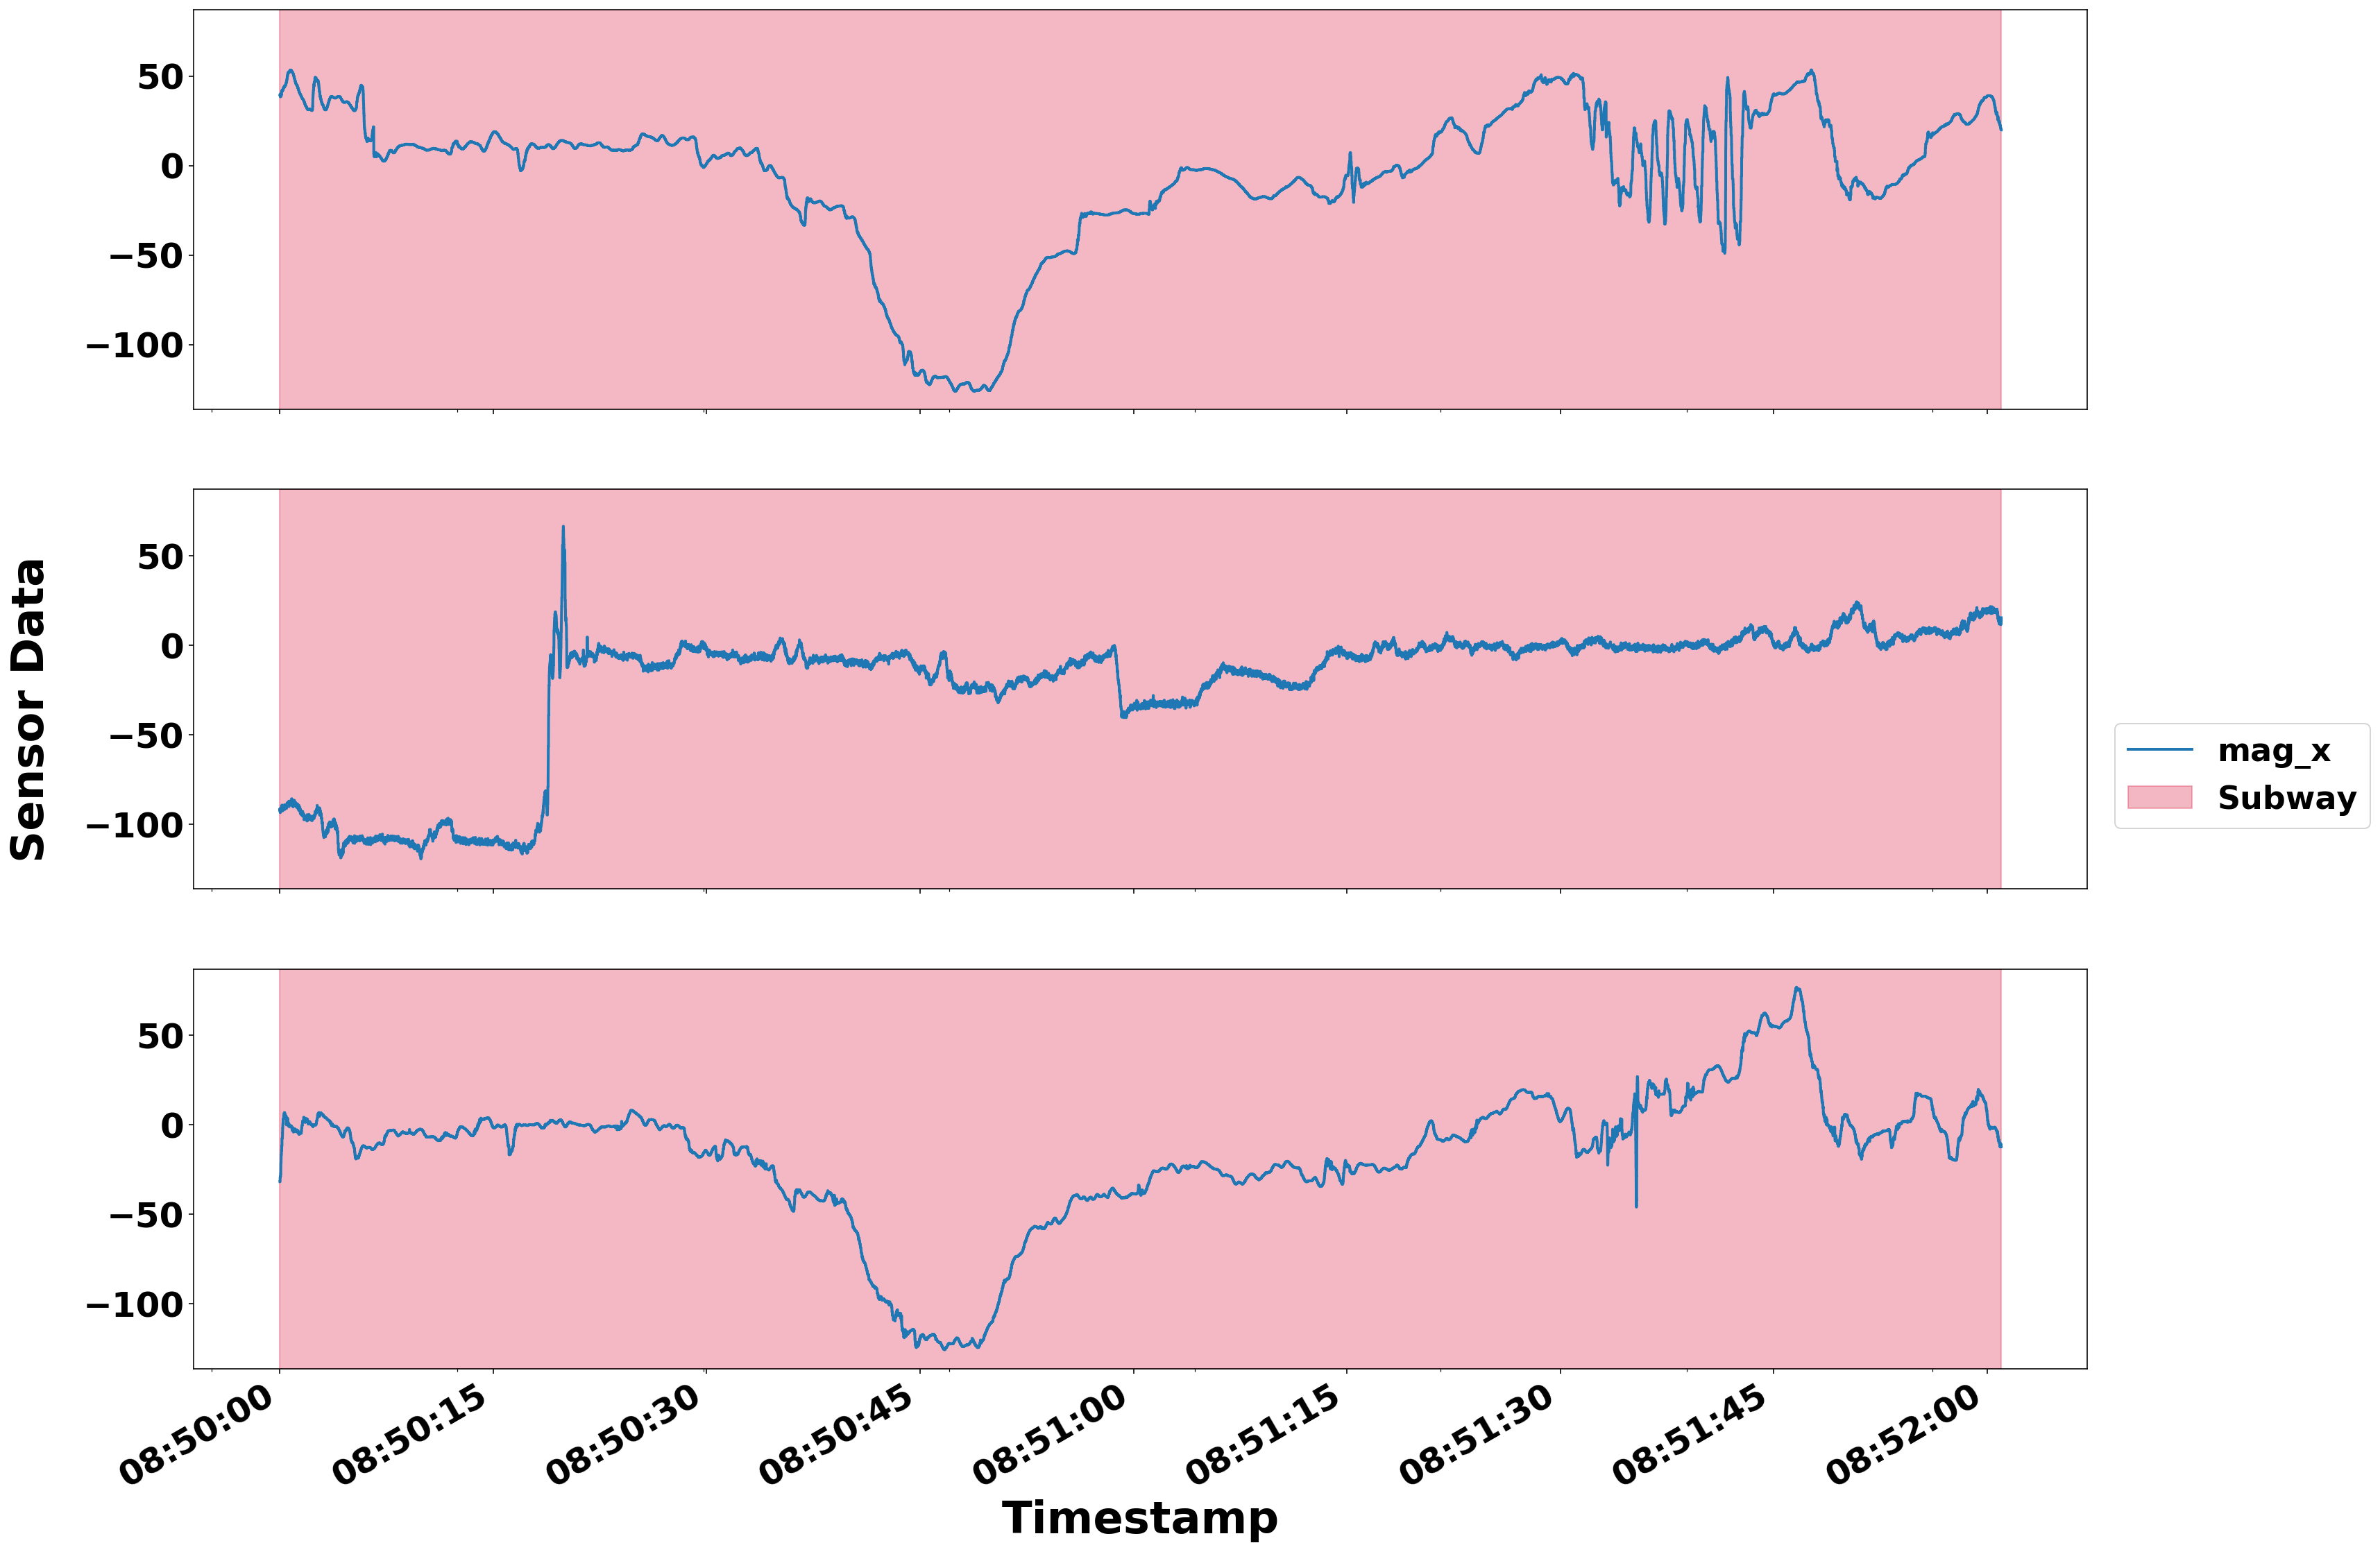

In [21]:
data_display = ['mag_x','activity']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.883), 27, (25, 20),
                             dir_name, file_name + '_st_3x', True)

Data 1 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (65248, 2) 

Data 2 : 
Start :
 2020-07-16 08:50:00.001000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.998000
Shape :
 (113588, 2) 

Data 3 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (66521, 2) 



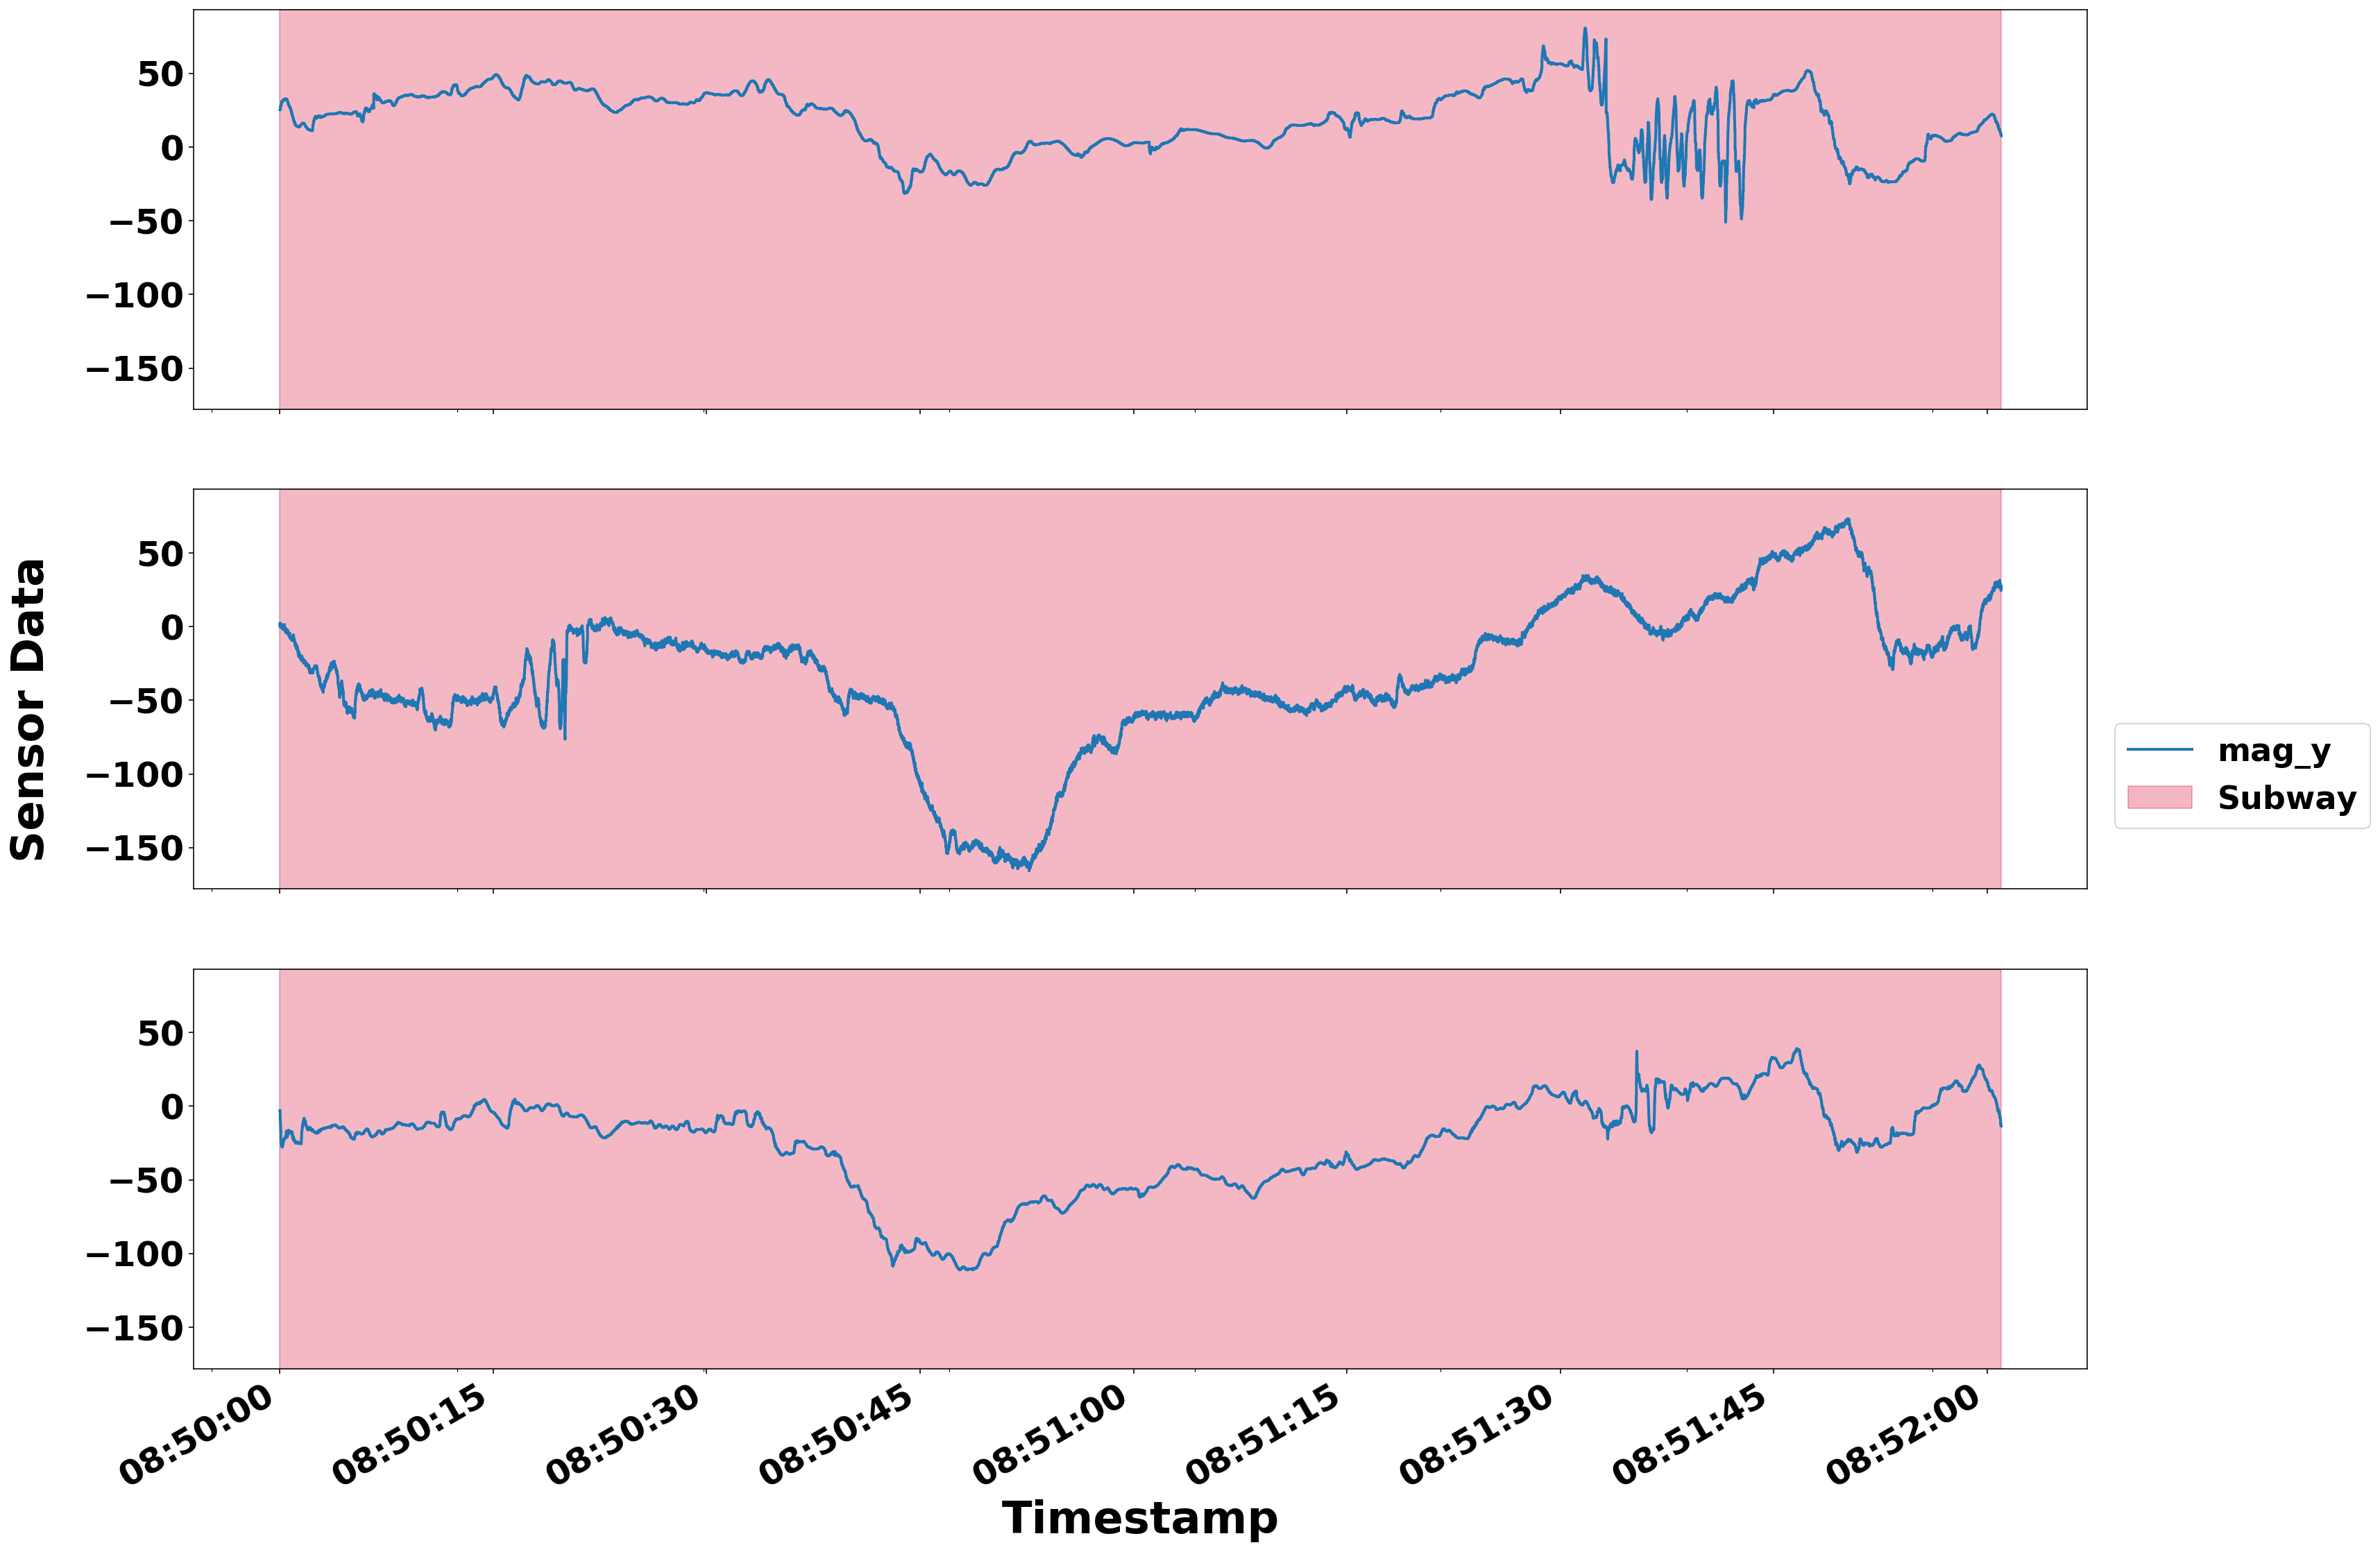

In [22]:
data_display = ['mag_y','activity']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.883), 27, (25, 20),
                             dir_name, file_name + '_st_3y', True)

Data 1 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (65248, 2) 

Data 2 : 
Start :
 2020-07-16 08:50:00.001000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.998000
Shape :
 (113588, 2) 

Data 3 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (66521, 2) 



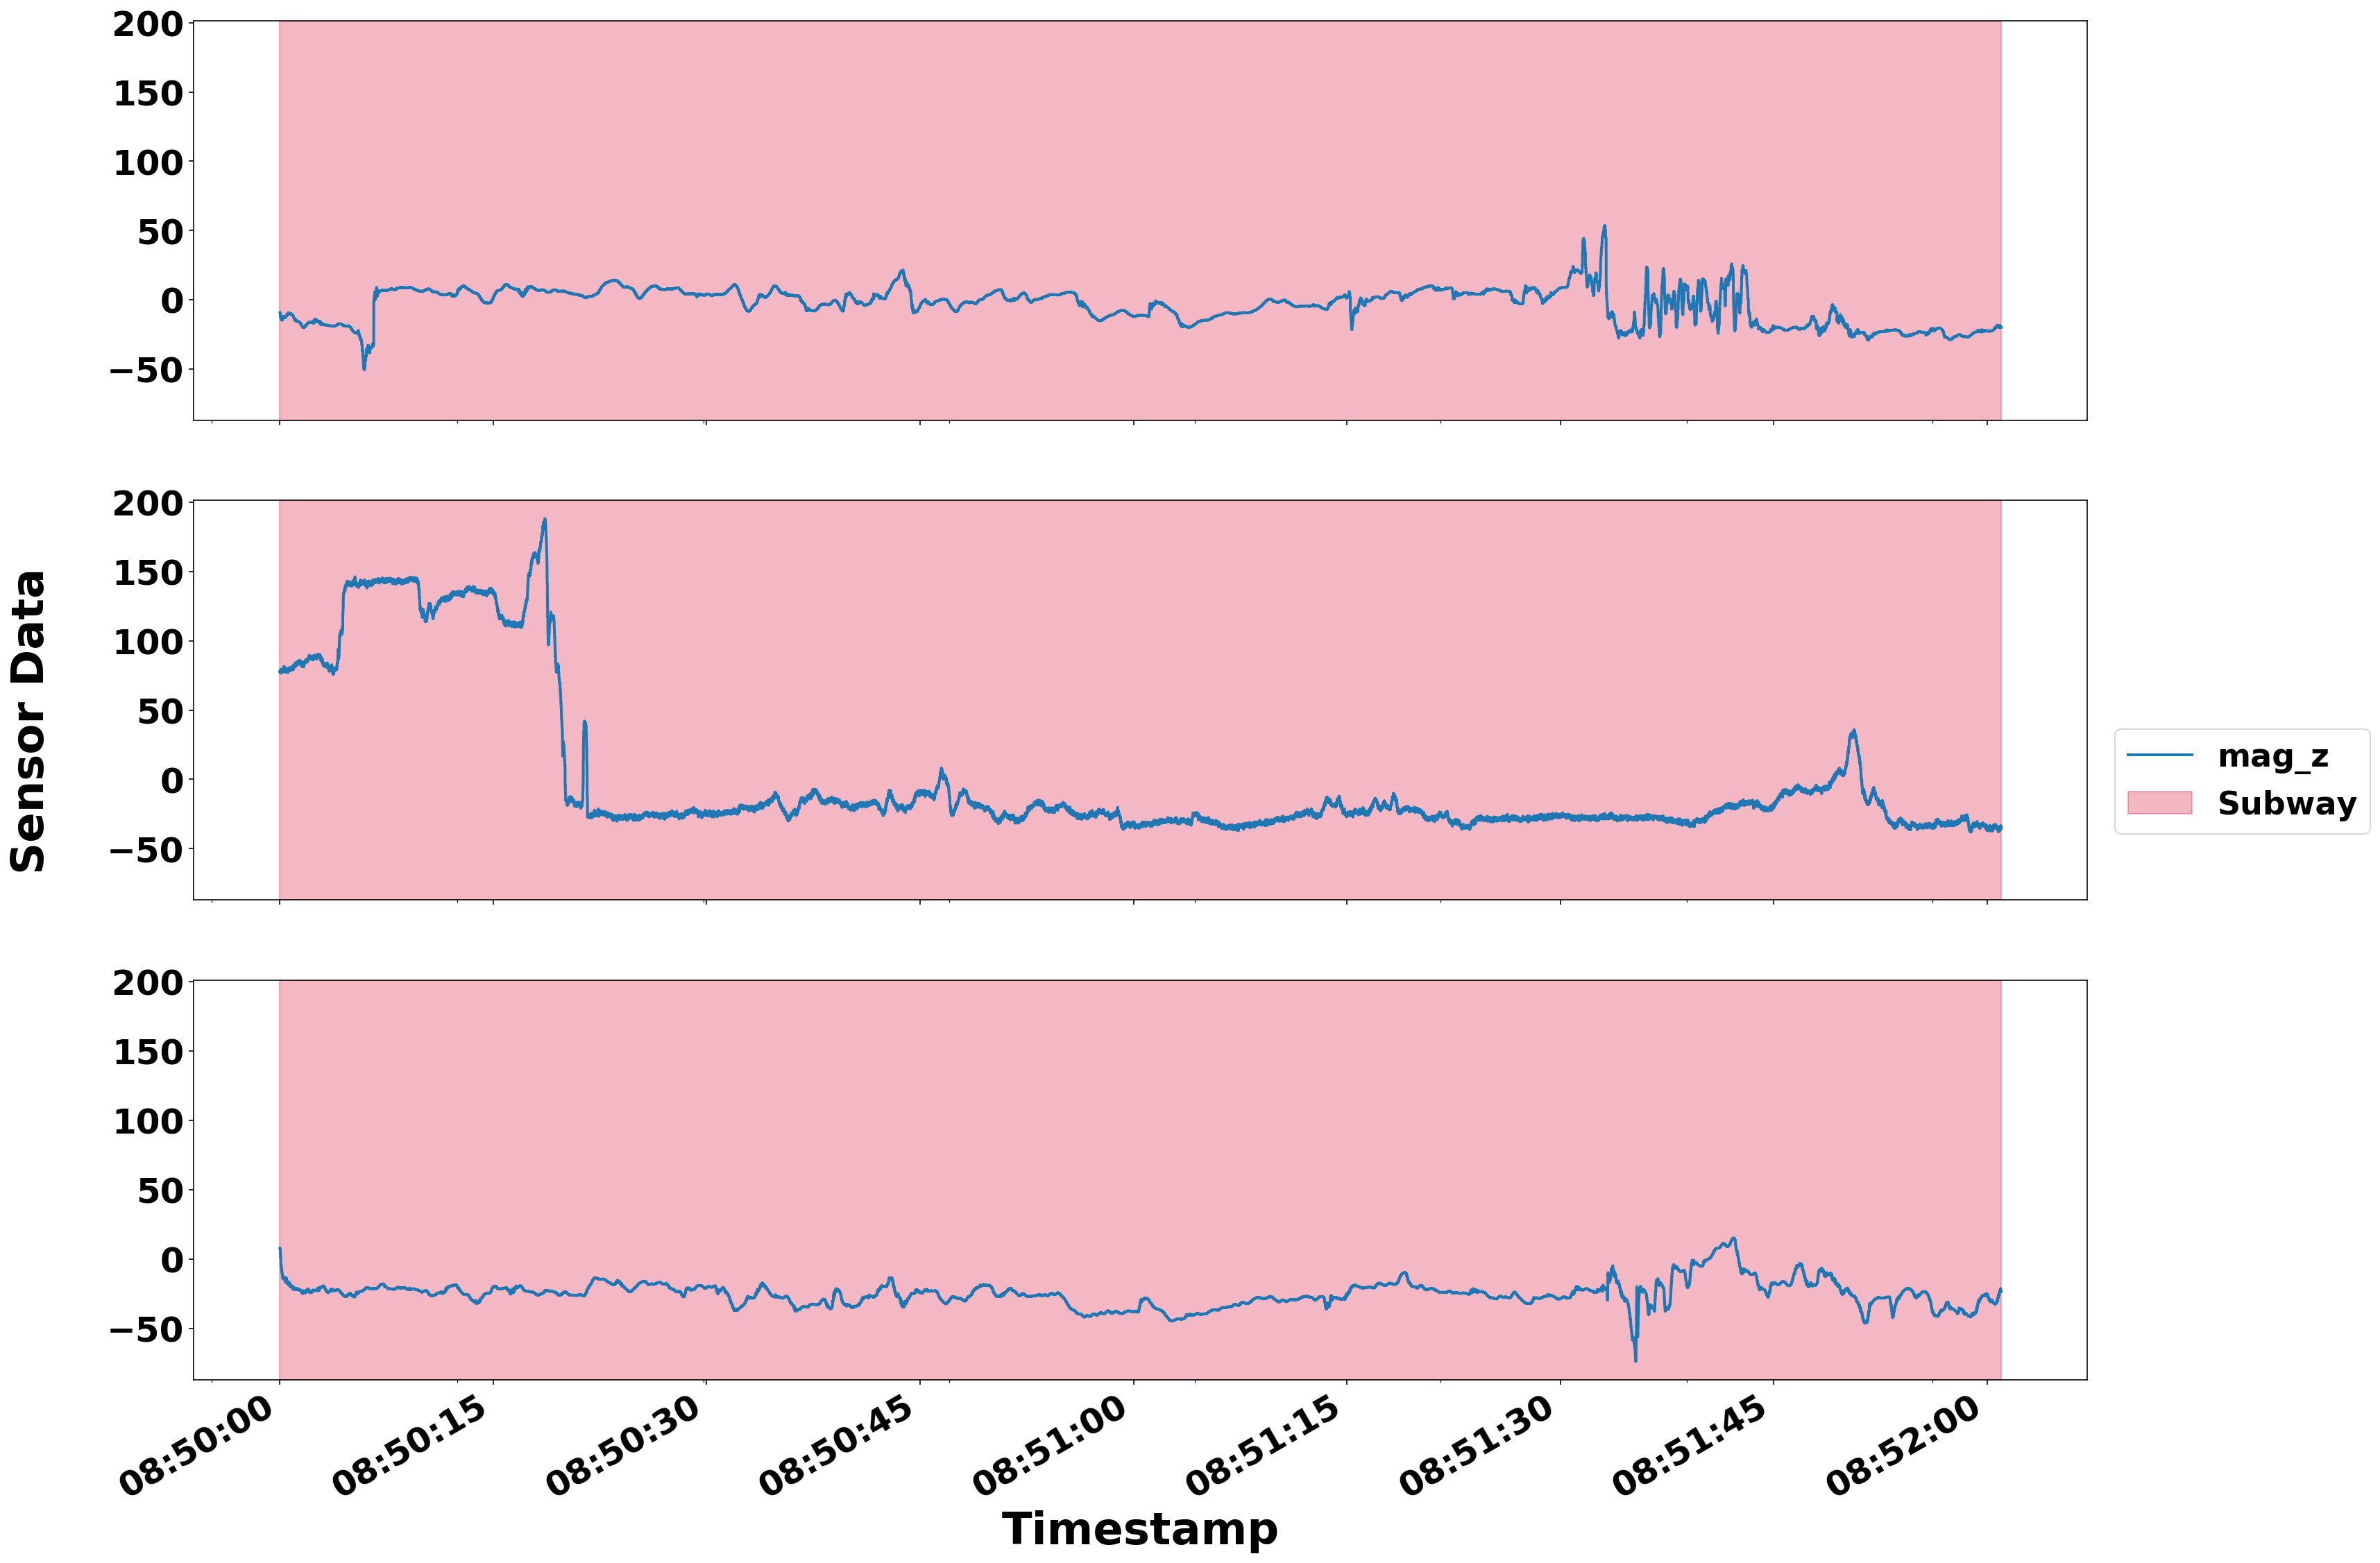

In [23]:
data_display = ['mag_z','activity']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.883), 27, (25, 20),
                             dir_name, file_name + '_st_3z', True)

Data 1 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (65248, 2) 

Data 2 : 
Start :
 2020-07-16 08:50:00.001000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.998000
Shape :
 (113588, 2) 

Data 3 : 
Start :
 2020-07-16 08:50:00.004000
End :
 2020-07-16 08:52:00.999000
Time delta :
 0 days 00:02:00.995000
Shape :
 (66521, 2) 



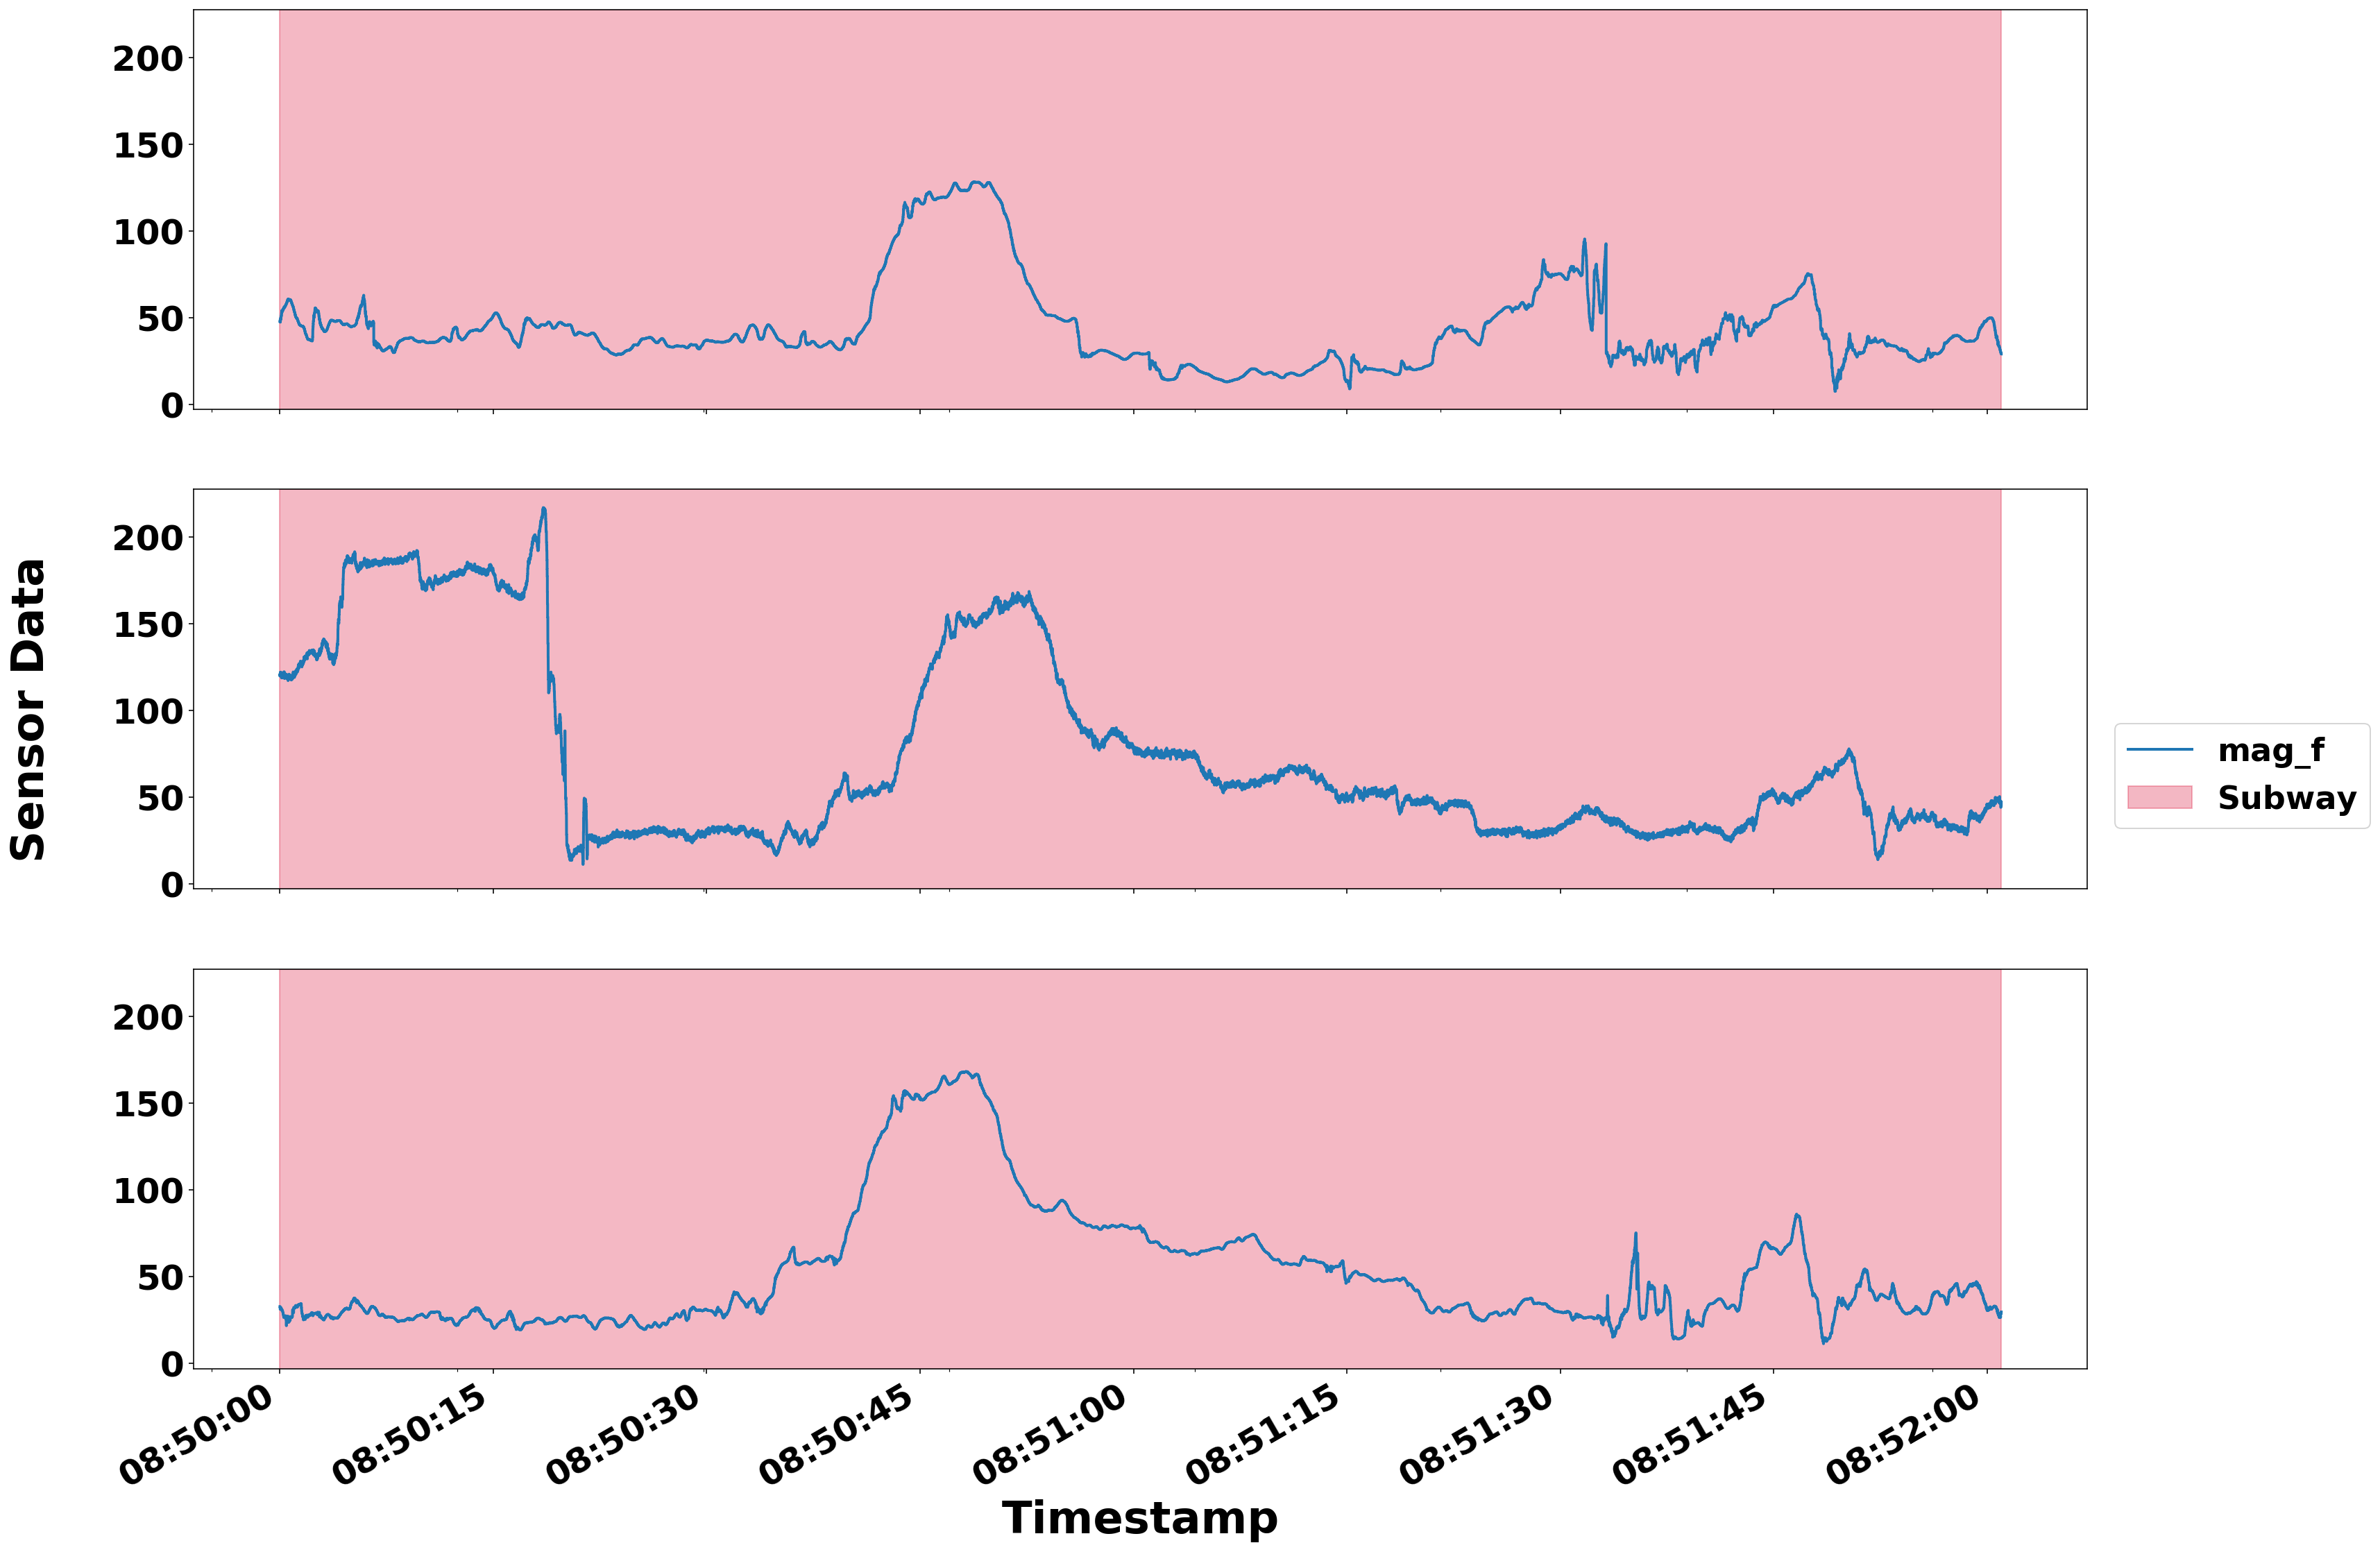

In [24]:
data_display = ['mag_f','activity']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.883), 27, (25, 20),
                             dir_name, file_name + '_st_3f', True)

# Accuracy Analysis

In [25]:
data[0]["2020-07-16 09:03:00":"2020-07-16 09:04:00"][['mag_acc', 'activity','pos_state']]

mag_acc activity pos_state
timestamp                                          
2020-07-16 09:03:00.011        3       sb         i
2020-07-16 09:03:00.013        3       sb         i
2020-07-16 09:03:00.014        3       sb         i
2020-07-16 09:03:00.015        3       sb         i
2020-07-16 09:03:00.017        3       sb         i
...                          ...      ...       ...
2020-07-16 09:04:00.992        3       sb         i
2020-07-16 09:04:00.994        3       sb         i
2020-07-16 09:04:00.996        3       sb         i
2020-07-16 09:04:00.998        3       sb         i
2020-07-16 09:04:00.999        3       sb         i

[31698 rows x 3 columns]

In [26]:
data[1]["2020-07-16 09:03:00":"2020-07-16 09:04:00"][['mag_acc', 'activity','pos_state']]

mag_acc activity pos_state
timestamp                                          
2020-07-16 09:03:00.001        1       sb         i
2020-07-16 09:03:00.003        1       sb         i
2020-07-16 09:03:00.003        1       sb         i
2020-07-16 09:03:00.005        1       sb         i
2020-07-16 09:03:00.005        1       sb         i
...                          ...      ...       ...
2020-07-16 09:04:00.996        0       sb         i
2020-07-16 09:04:00.997        0       sb         i
2020-07-16 09:04:00.998        0       sb         i
2020-07-16 09:04:00.999        0       sb         i
2020-07-16 09:04:00.999        0       sb         i

[57253 rows x 3 columns]

In [27]:
data[2]["2020-07-16 09:03:00":"2020-07-16 09:04:00"][['mag_acc', 'activity','pos_state']]

mag_acc activity pos_state
timestamp                                          
2020-07-16 09:03:00.002        0       sb         i
2020-07-16 09:03:00.003        0       sb         i
2020-07-16 09:03:00.008        0       sb         i
2020-07-16 09:03:00.009        0       sb         i
2020-07-16 09:03:00.009        0       sb         i
...                          ...      ...       ...
2020-07-16 09:04:00.989        1       sb         i
2020-07-16 09:04:00.990        1       sb         i
2020-07-16 09:04:00.990        1       sb         i
2020-07-16 09:04:00.993        1       sb         i
2020-07-16 09:04:00.993        1       sb         i

[33183 rows x 3 columns]

Data 1 : 
Start :
 2020-07-16 09:03:00.011000
End :
 2020-07-16 09:04:00.999000
Time delta :
 0 days 00:01:00.988000
Shape :
 (31698, 5) 

Data 2 : 
Start :
 2020-07-16 09:03:00.001000
End :
 2020-07-16 09:04:00.999000
Time delta :
 0 days 00:01:00.998000
Shape :
 (57253, 5) 

Data 3 : 
Start :
 2020-07-16 09:03:00.002000
End :
 2020-07-16 09:04:00.993000
Time delta :
 0 days 00:01:00.991000
Shape :
 (33183, 5) 



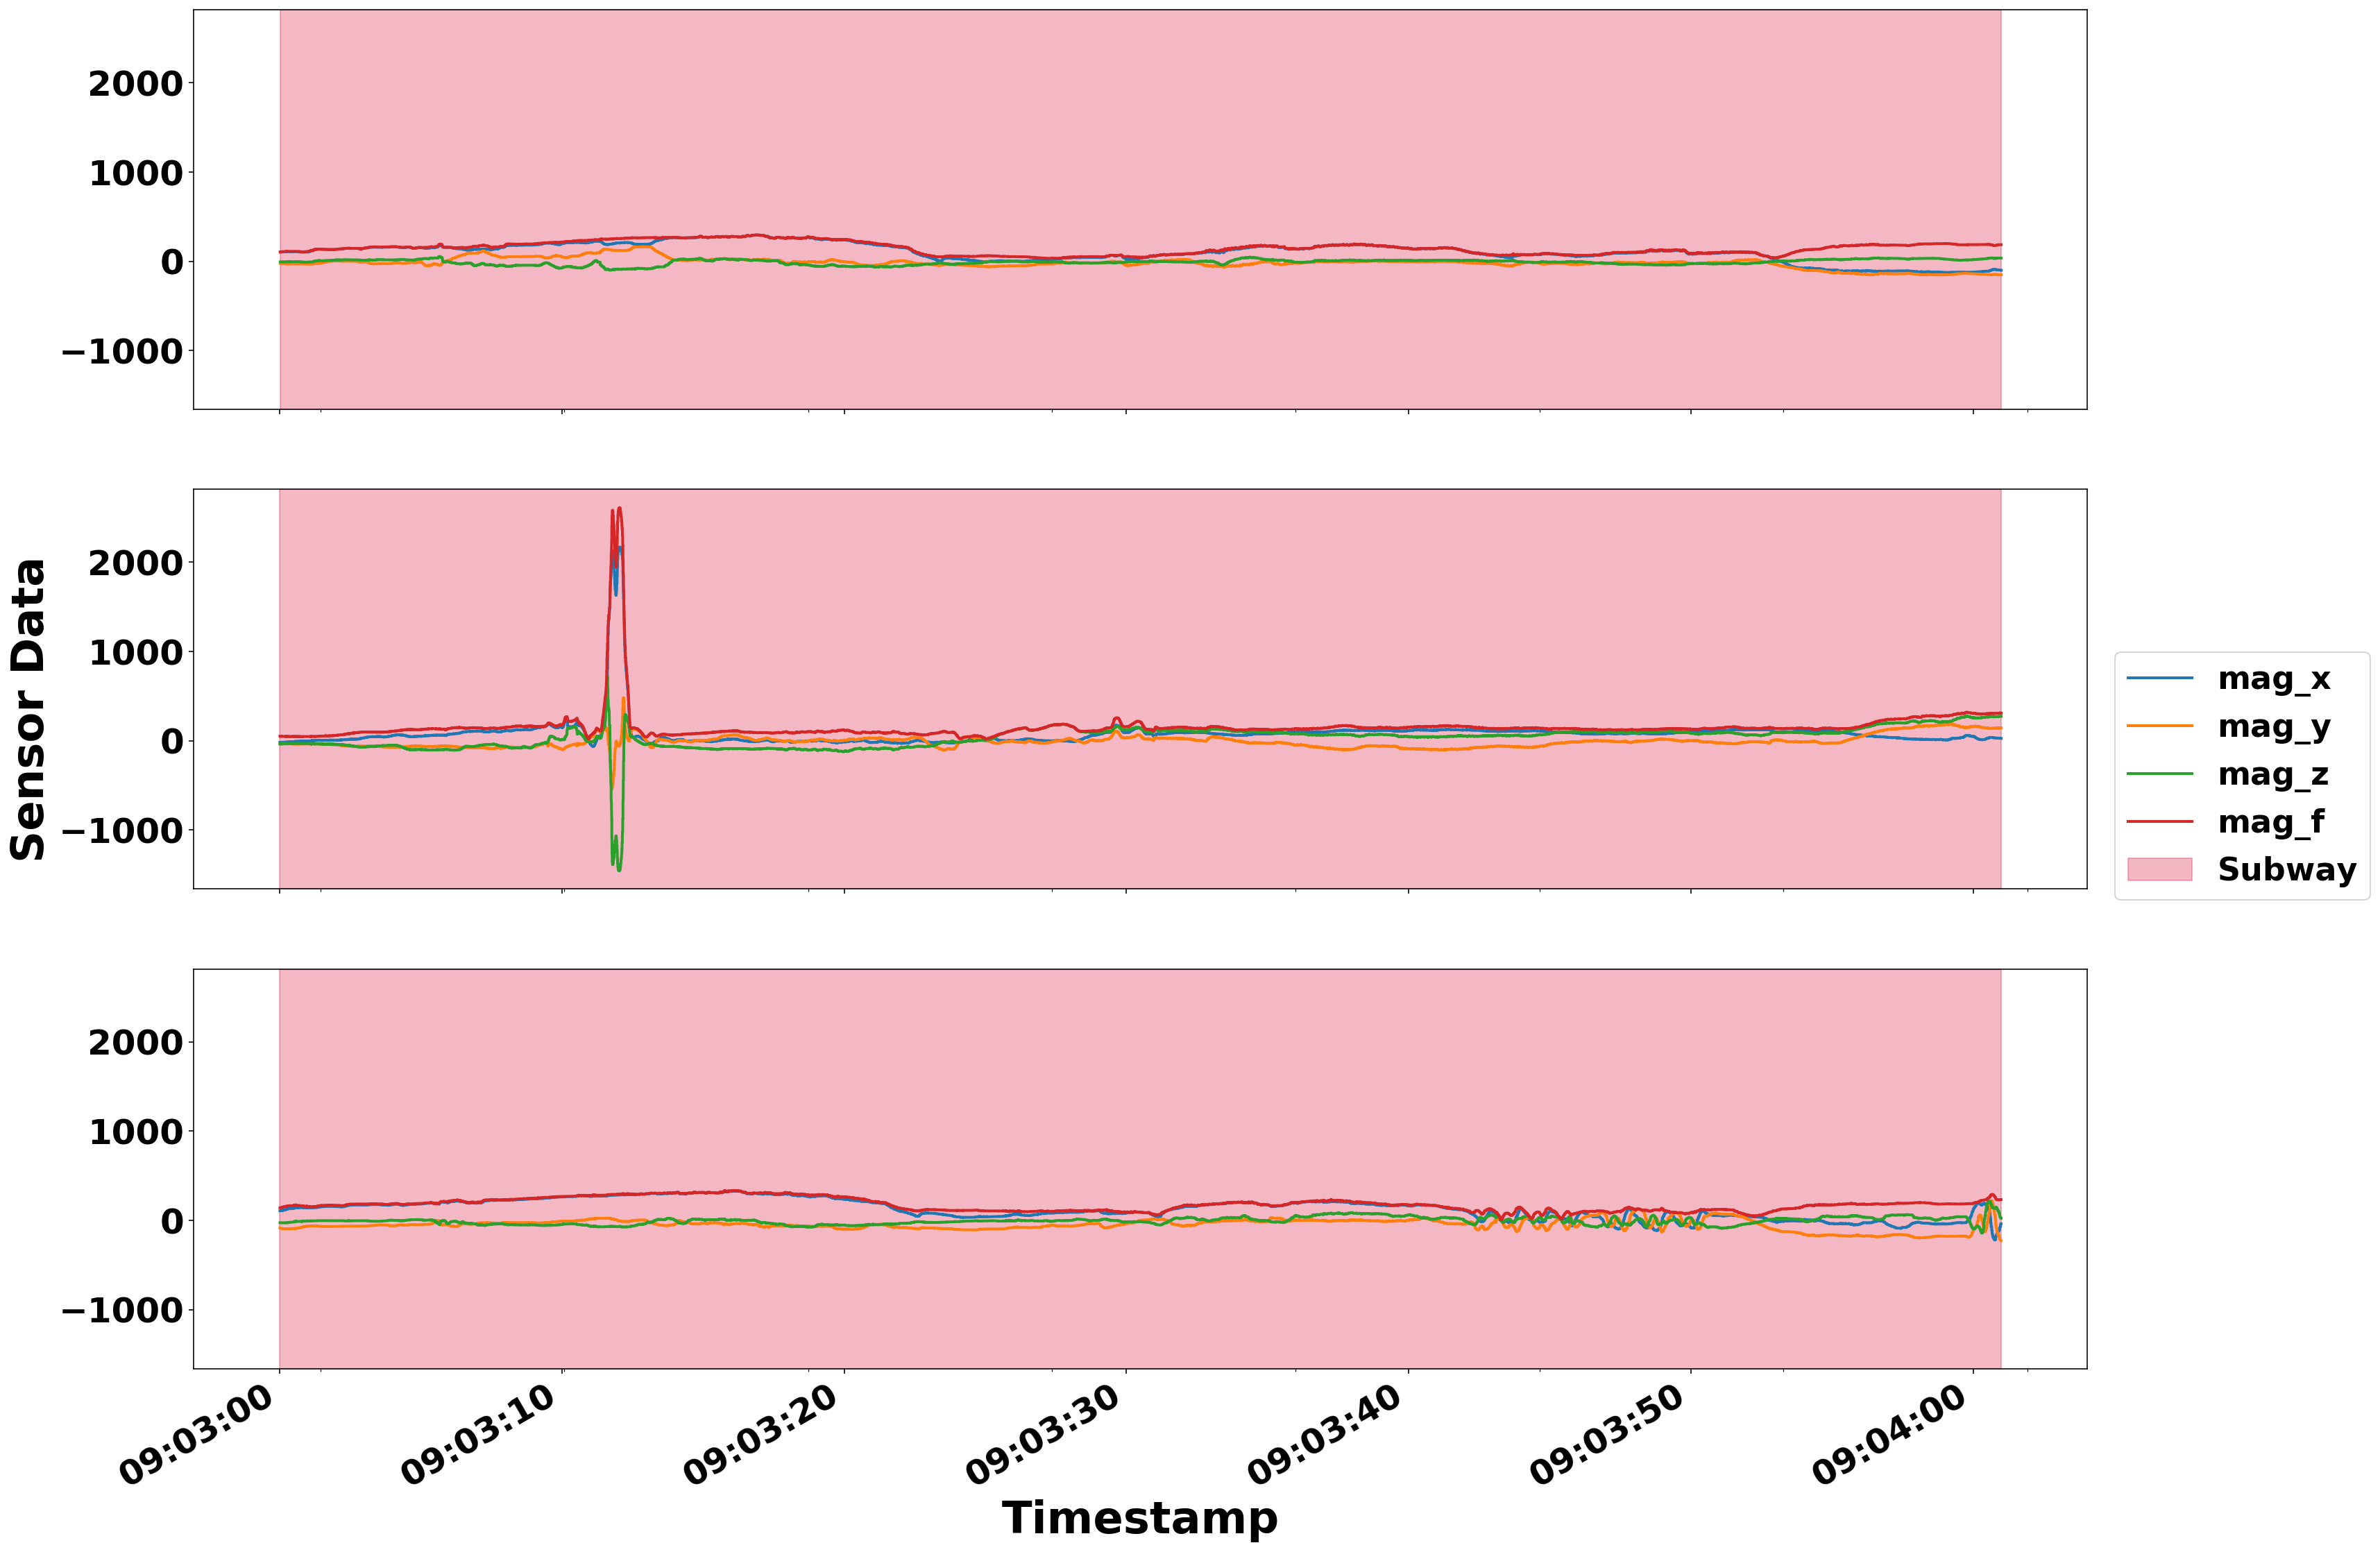

In [28]:
data_display = ['mag_x','mag_y','mag_z','mag_f','activity']
time_from = "2020-07-16 09:03:00"
time_to = "2020-07-16 09:04:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.883), 27, (25, 20), 
                             dir_name, file_name + '_st_4(aa)', True)

In [29]:
data[0]["2020-07-16 09:05:00":"2020-07-16 09:06:00"][['mag_acc', 'activity','pos_state']]

mag_acc activity pos_state
timestamp                                          
2020-07-16 09:05:00.002        0       sb         i
2020-07-16 09:05:00.007        0       sb         i
2020-07-16 09:05:00.010        0       sb         i
2020-07-16 09:05:00.011        0       sb         i
2020-07-16 09:05:00.012        0       sb         i
...                          ...      ...       ...
2020-07-16 09:06:00.985        0       sb         i
2020-07-16 09:06:00.992        0       sb         i
2020-07-16 09:06:00.992        0       sb         i
2020-07-16 09:06:00.999        0       sb         i
2020-07-16 09:06:00.999        0       sb         i

[34703 rows x 3 columns]

In [30]:
data[1]["2020-07-16 09:05:00":"2020-07-16 09:06:00"][['mag_acc', 'activity','pos_state']]

mag_acc activity pos_state
timestamp                                          
2020-07-16 09:05:00.000        0       sb         i
2020-07-16 09:05:00.000        0       sb         i
2020-07-16 09:05:00.003        0       sb         i
2020-07-16 09:05:00.004        0       sb         i
2020-07-16 09:05:00.005        0       sb         i
...                          ...      ...       ...
2020-07-16 09:06:00.997        0       sb         i
2020-07-16 09:06:00.997        0       sb         i
2020-07-16 09:06:00.997        0       sb         i
2020-07-16 09:06:00.997        0       sb         i
2020-07-16 09:06:00.997        0       sb         i

[57132 rows x 3 columns]

In [31]:
data[2]["2020-07-16 09:05:00":"2020-07-16 09:06:00"][['mag_acc', 'activity','pos_state']]

mag_acc activity pos_state
timestamp                                          
2020-07-16 09:05:00.001        0       sb         i
2020-07-16 09:05:00.001        0       sb         i
2020-07-16 09:05:00.002        0       sb         i
2020-07-16 09:05:00.004        0       sb         i
2020-07-16 09:05:00.005        0       sb         i
...                          ...      ...       ...
2020-07-16 09:06:00.994        0       sb         i
2020-07-16 09:06:00.994        0       sb         i
2020-07-16 09:06:00.994        0       sb         i
2020-07-16 09:06:00.996        0       sb         i
2020-07-16 09:06:00.997        0       sb         i

[33518 rows x 3 columns]

Data 1 : 
Start :
 2020-07-16 09:05:00.002000
End :
 2020-07-16 09:06:00.999000
Time delta :
 0 days 00:01:00.997000
Shape :
 (34703, 5) 

Data 2 : 
Start :
 2020-07-16 09:05:00
End :
 2020-07-16 09:06:00.997000
Time delta :
 0 days 00:01:00.997000
Shape :
 (57132, 5) 

Data 3 : 
Start :
 2020-07-16 09:05:00.001000
End :
 2020-07-16 09:06:00.997000
Time delta :
 0 days 00:01:00.996000
Shape :
 (33518, 5) 



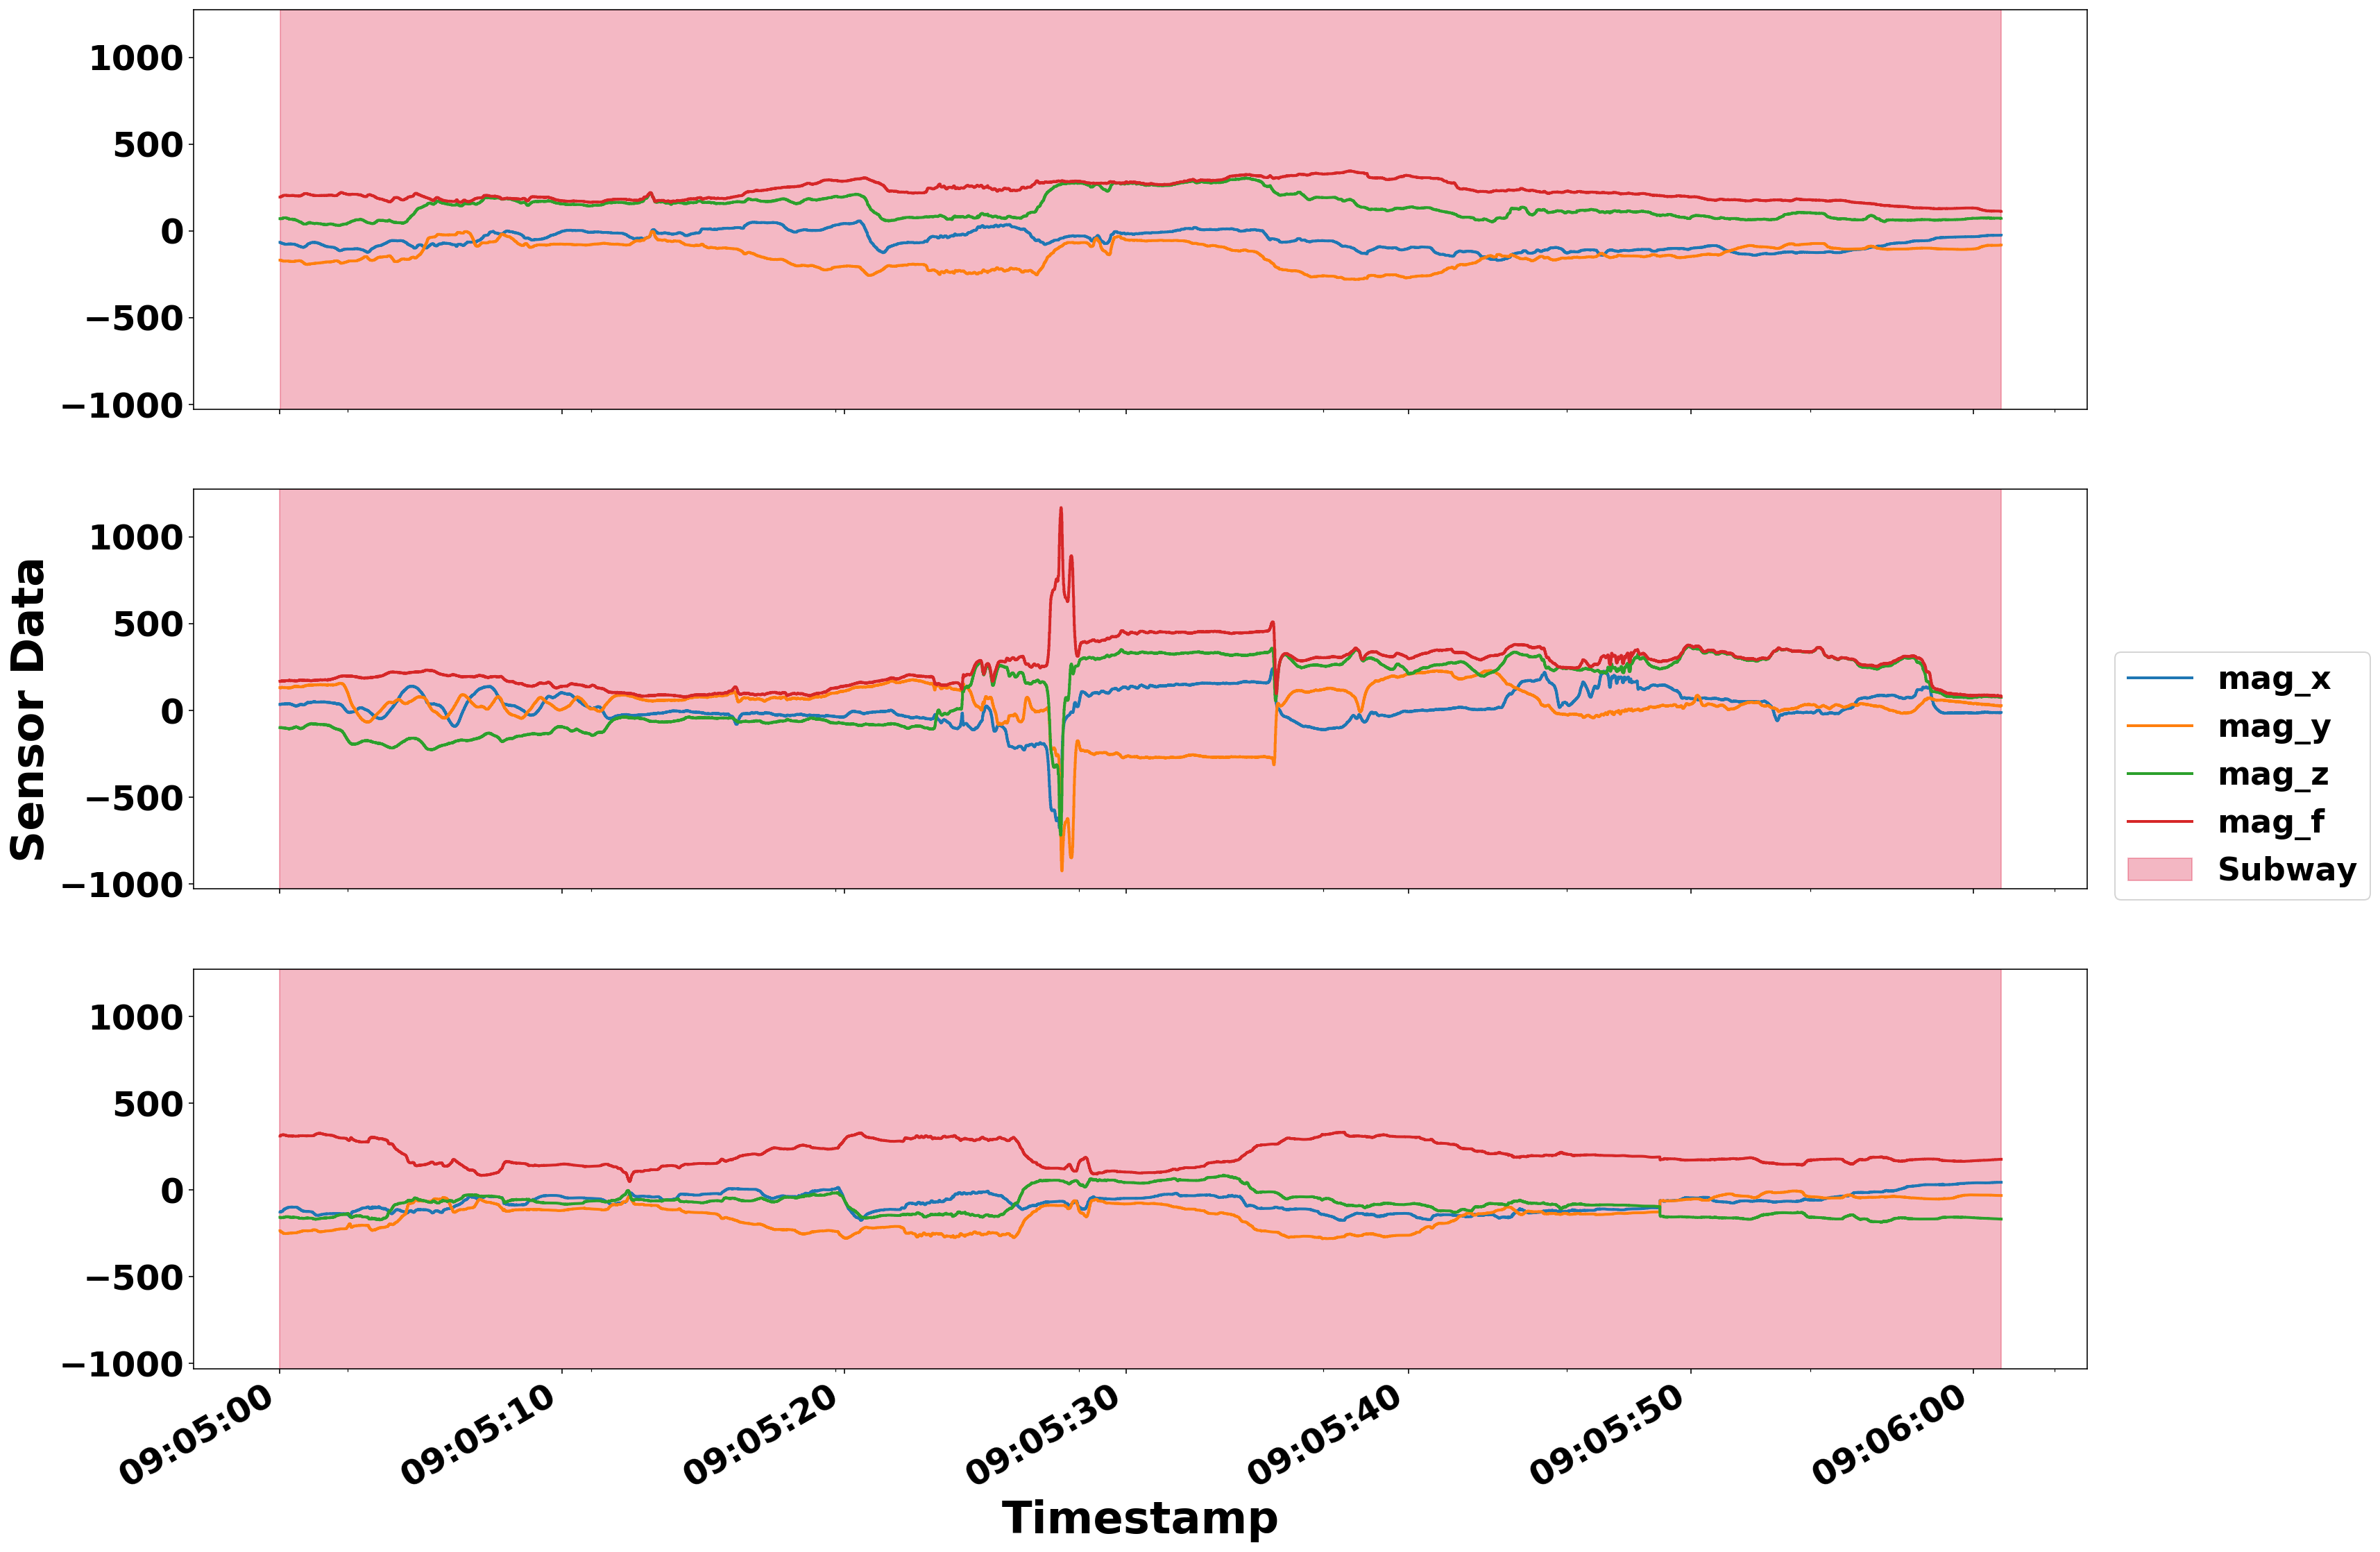

In [32]:
data_display = ['mag_x','mag_y','mag_z','mag_f','activity']
time_from = "2020-07-16 09:05:00"
time_to = "2020-07-16 09:06:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.883), 27, (25, 20), 
                             dir_name, file_name + '_st_5(aa)', True)

# Downsampling

In [33]:
data_ds = data_prep.downsampling('1s')

In [34]:
data_ds[0].head()

mag_x      mag_y      mag_z      mag_f  mag_acc  \
timestamp                                                                  
2020-07-16 08:42:07 -26.659241  28.748102 -31.665823  50.675934      3.0   
2020-07-16 08:42:08 -32.393662  19.197183 -33.815845  50.827492      3.0   
2020-07-16 08:42:09 -38.745018  10.023310 -32.733452  51.900008      3.0   
2020-07-16 08:42:10 -39.284353   6.142266 -33.038669  51.786133      3.0   
2020-07-16 08:42:11 -39.267263  13.230054 -31.222540  51.935905      3.0   

                        acc_x     acc_y     acc_z  acc_acc    gyro_x  \
timestamp                                                              
2020-07-16 08:42:07 -0.282264 -1.035950  9.658758      3.0  0.527031   
2020-07-16 08:42:08  1.620110  1.995632  9.447842      3.0  0.185418   
2020-07-16 08:42:09  2.069736  3.668820  8.735190      3.0  0.185930   
2020-07-16 08:42:10  1.858800  3.933256  8.829142      3.0  0.022158   
2020-07-16 08:42:11  4.657204  4.369592  7.358710      3.0  0.023228   

                       gyro_y    gyro_z  gyro_acc    pos_lat    pos_lng  \
timestamp                                                                 
2020-07-16 08:42:07 -0.229315  0.232087       3.0  35.150231  129.00407   
2020-07-16 08:42:08 -0.235332 -0.126586       3.0  35.150231  129.00407   
2020-07-16 08:42:09 -0.021423 -0.047438       3.0  35.150231  129.00407   
2020-07-16 08:42:10  0.012356  0.234525       3.0  35.150231  129.00407   
2020-07-16 08:42:11 -0.183790  0.146219       3.0  35.150231  129.00407   

                     pos_acc  
timestamp                     
2020-07-16 08:42:07   22.279  
2020-07-16 08:42:08   22.279  
2020-07-16 08:42:09   22.279  
2020-07-16 08:42:10   22.279  
2020-07-16 08:42:11   22.279

In [35]:
data_ds[1].head()

mag_x      mag_y      mag_z      mag_f  mag_acc  \
timestamp                                                                  
2020-07-16 08:42:13 -68.186047  54.697265 -17.516004  89.179799      2.0   
2020-07-16 08:42:14 -71.893240  58.826296 -18.790904  94.787315      2.0   
2020-07-16 08:42:15 -62.436790  55.777505 -19.439534  86.001862      2.0   
2020-07-16 08:42:16 -57.633449  71.558491 -21.808625  94.738824      2.0   
2020-07-16 08:42:17 -62.597859  71.617293 -21.876000  97.998395      2.0   

                        acc_x     acc_y     acc_z  acc_acc    gyro_x  \
timestamp                                                              
2020-07-16 08:42:13 -1.908464  6.488441  7.225141      3.0 -0.273135   
2020-07-16 08:42:14 -0.655602  5.135117  8.357490      3.0 -0.034266   
2020-07-16 08:42:15 -2.754953  5.243147  7.060816      3.0 -0.103618   
2020-07-16 08:42:16 -1.700276  3.845027  9.558433      3.0 -0.225191   
2020-07-16 08:42:17 -2.203473  2.386927  8.810758      3.0 -0.199304   

                       gyro_y    gyro_z  gyro_acc    pos_lat     pos_lng  \
timestamp                                                                  
2020-07-16 08:42:13 -0.530848  0.098046       3.0  35.150310  129.003927   
2020-07-16 08:42:14  0.061687  0.017907       3.0  35.150311  129.003921   
2020-07-16 08:42:15  0.121830 -0.092806       3.0  35.150313  129.003902   
2020-07-16 08:42:16  0.038892  0.344142       3.0  35.150316  129.003882   
2020-07-16 08:42:17  0.035797  0.100842       3.0  35.150318  129.003877   

                       pos_acc  
timestamp                       
2020-07-16 08:42:13   9.618000  
2020-07-16 08:42:14   9.957000  
2020-07-16 08:42:15  10.458040  
2020-07-16 08:42:16  10.071780  
2020-07-16 08:42:17   9.335405

In [36]:
data_ds[2].head()

mag_x      mag_y      mag_z      mag_f  mag_acc  \
timestamp                                                                  
2020-07-16 08:42:05 -24.905435  38.434783 -43.786957  63.387402      3.0   
2020-07-16 08:42:06  -1.945750  41.649910 -51.183183  67.658078      3.0   
2020-07-16 08:42:07   5.876208  43.809108 -42.745167  61.912034      3.0   
2020-07-16 08:42:08   1.766667  35.074621 -42.419697  55.217077      3.0   
2020-07-16 08:42:09  -3.733271  29.483459 -48.885527  57.816669      3.0   

                        acc_x     acc_y     acc_z  acc_acc    gyro_x  \
timestamp                                                              
2020-07-16 08:42:05  2.525375  0.196650  9.596832      3.0  0.424172   
2020-07-16 08:42:06 -0.238511 -0.055463  9.274031      3.0 -0.083692   
2020-07-16 08:42:07 -0.918090 -1.349647  9.175851      3.0  0.005449   
2020-07-16 08:42:08  0.625465  1.014790  9.288968      3.0  0.199477   
2020-07-16 08:42:09 -1.891554  1.821047  8.746759      3.0  0.239829   

                       gyro_y    gyro_z  gyro_acc    pos_lat    pos_lng  \
timestamp                                                                 
2020-07-16 08:42:05 -0.656573 -0.024142       3.0  35.150136  128.99892   
2020-07-16 08:42:06  0.192337  0.044695       3.0  35.150136  128.99892   
2020-07-16 08:42:07  0.011769  0.029154       3.0  35.150136  128.99892   
2020-07-16 08:42:08  0.111227 -0.107576       3.0  35.150136  128.99892   
2020-07-16 08:42:09  0.424131 -0.083361       3.0  35.150136  128.99892   

                     pos_acc  
timestamp                     
2020-07-16 08:42:05   1700.0  
2020-07-16 08:42:06   1700.0  
2020-07-16 08:42:07   1700.0  
2020-07-16 08:42:08   1700.0  
2020-07-16 08:42:09   1700.0

## Plotting data

### Subplot

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 4) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 4) 

Data 3 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 4) 



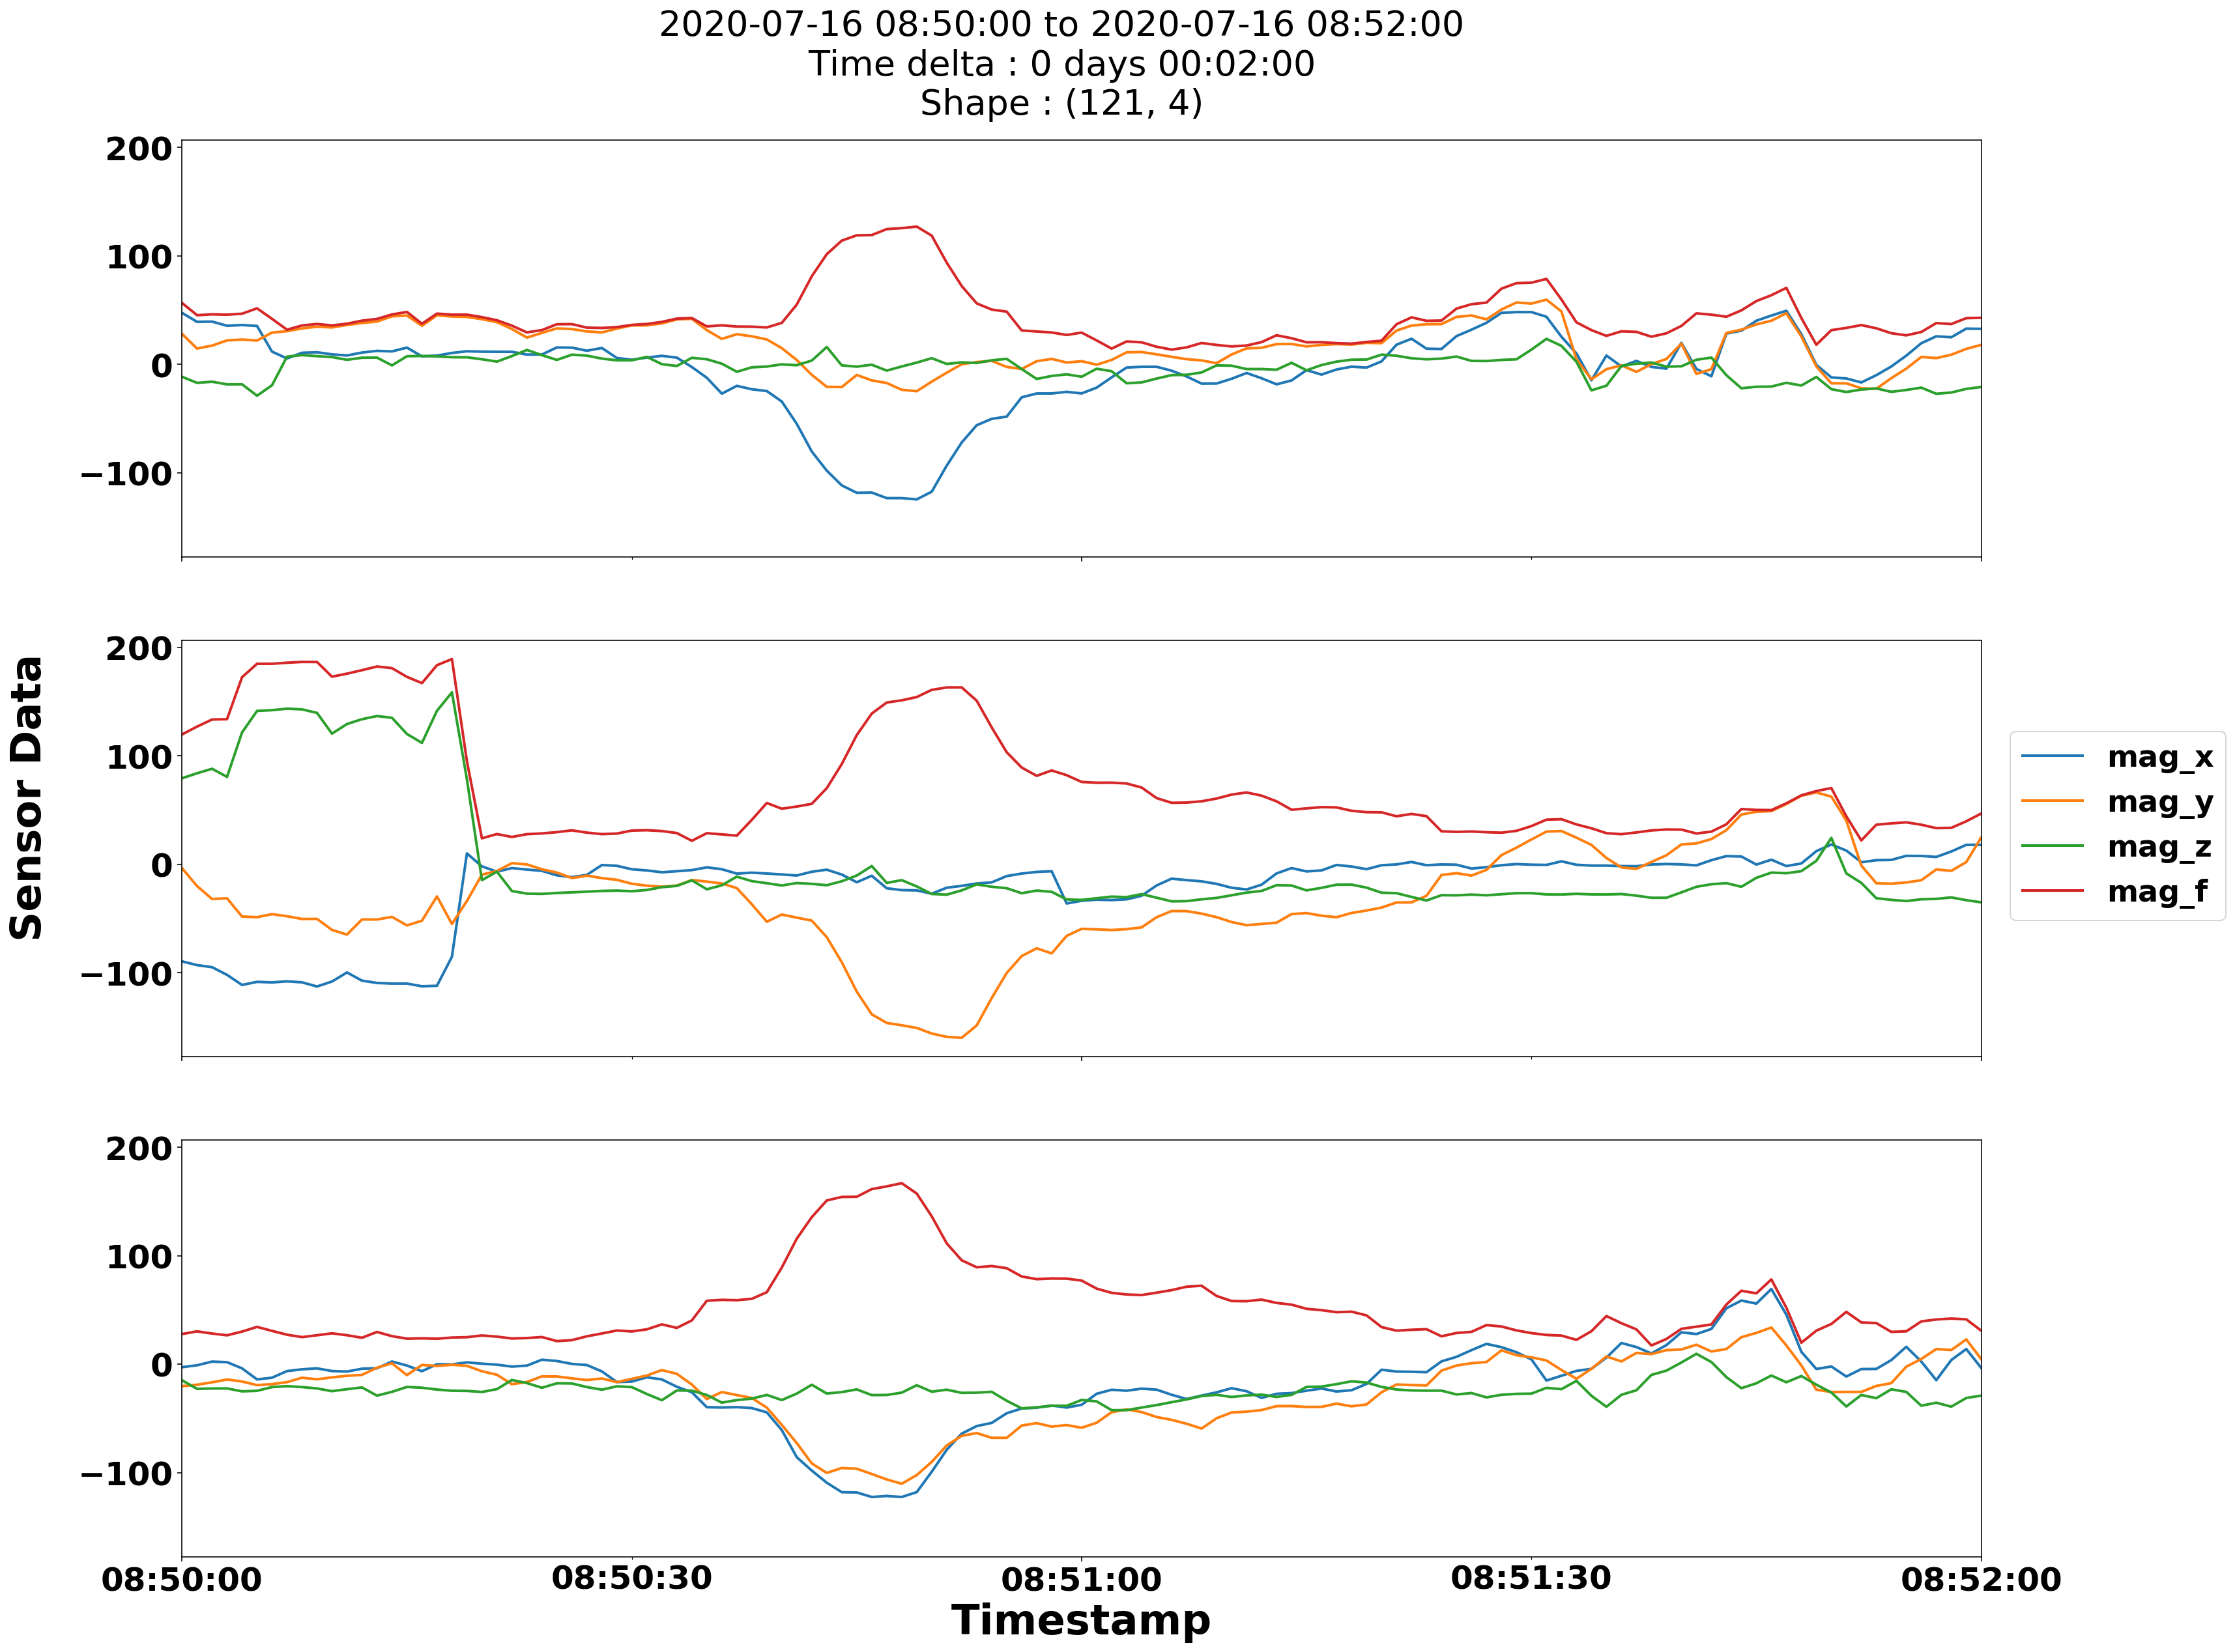

In [37]:
data_display = ['mag_x','mag_y','mag_z','mag_f']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data_ds, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.892), 27, (25, 20), 
                             dir_name, file_name + '_st_1(ds)', False)

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 3 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



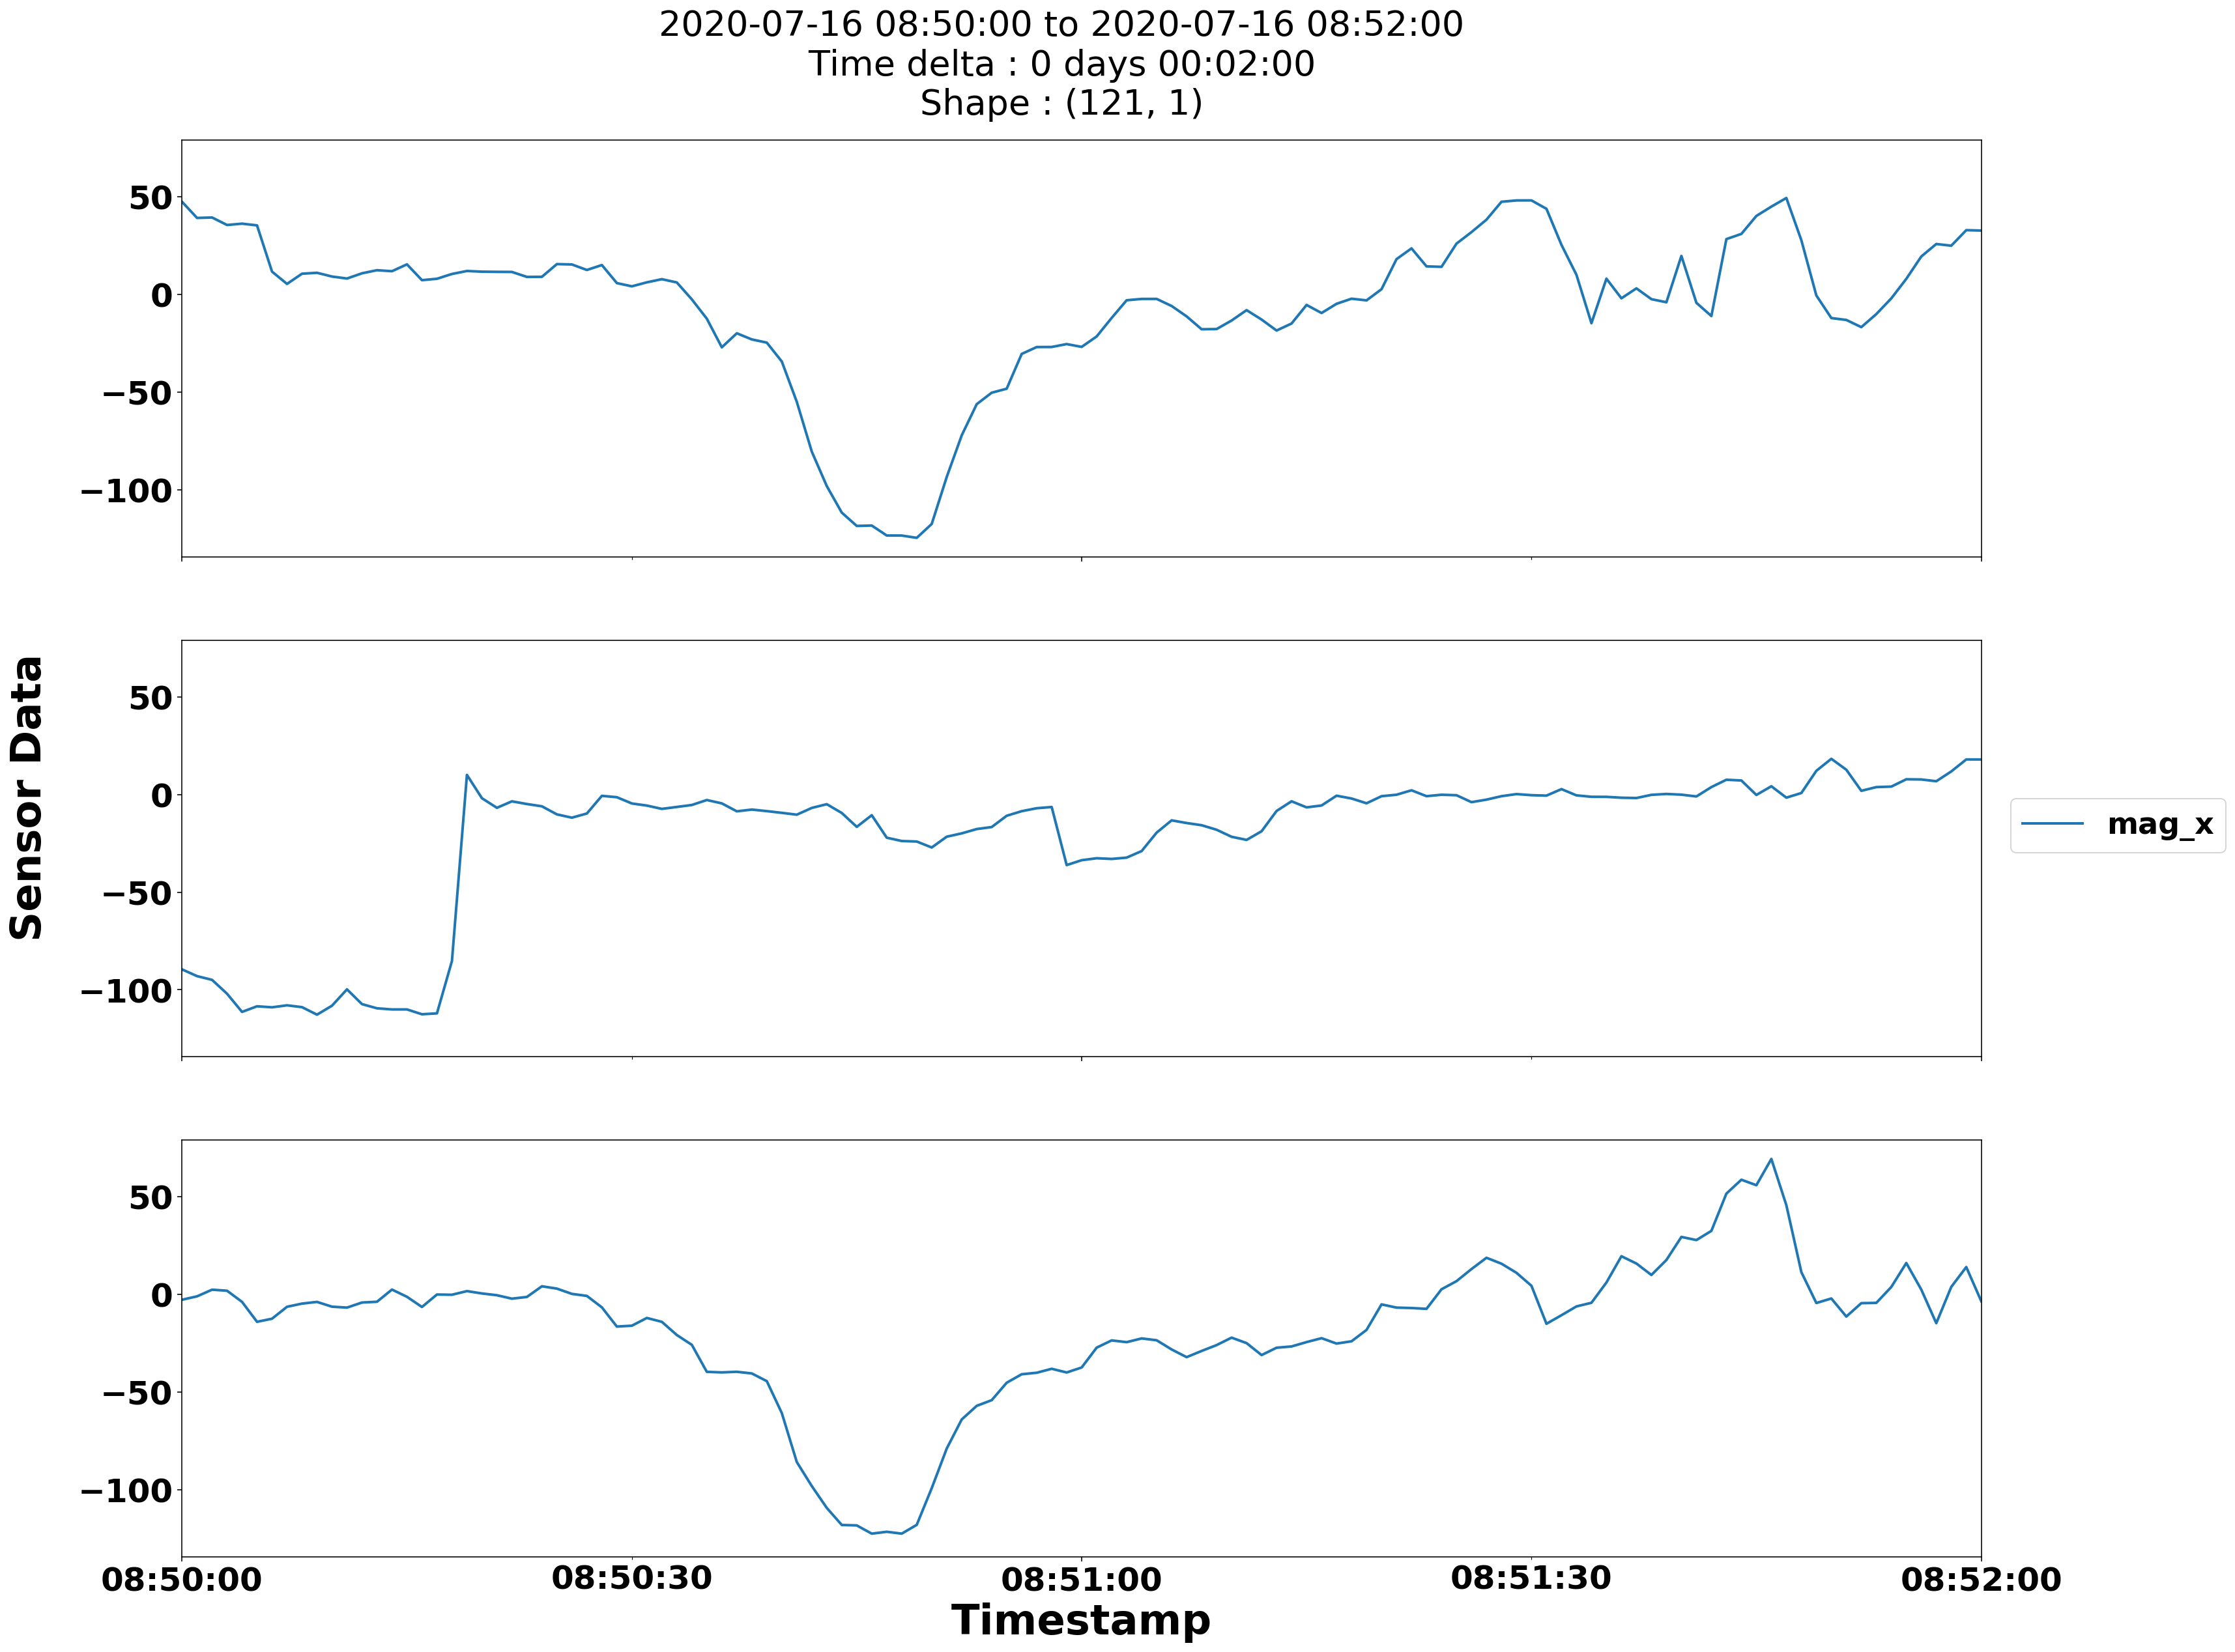

In [38]:
data_display = ['mag_x']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data_ds, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.892), 27, (25, 20), 
                             dir_name, file_name + '_st_2x(ds)', False)

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 3 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



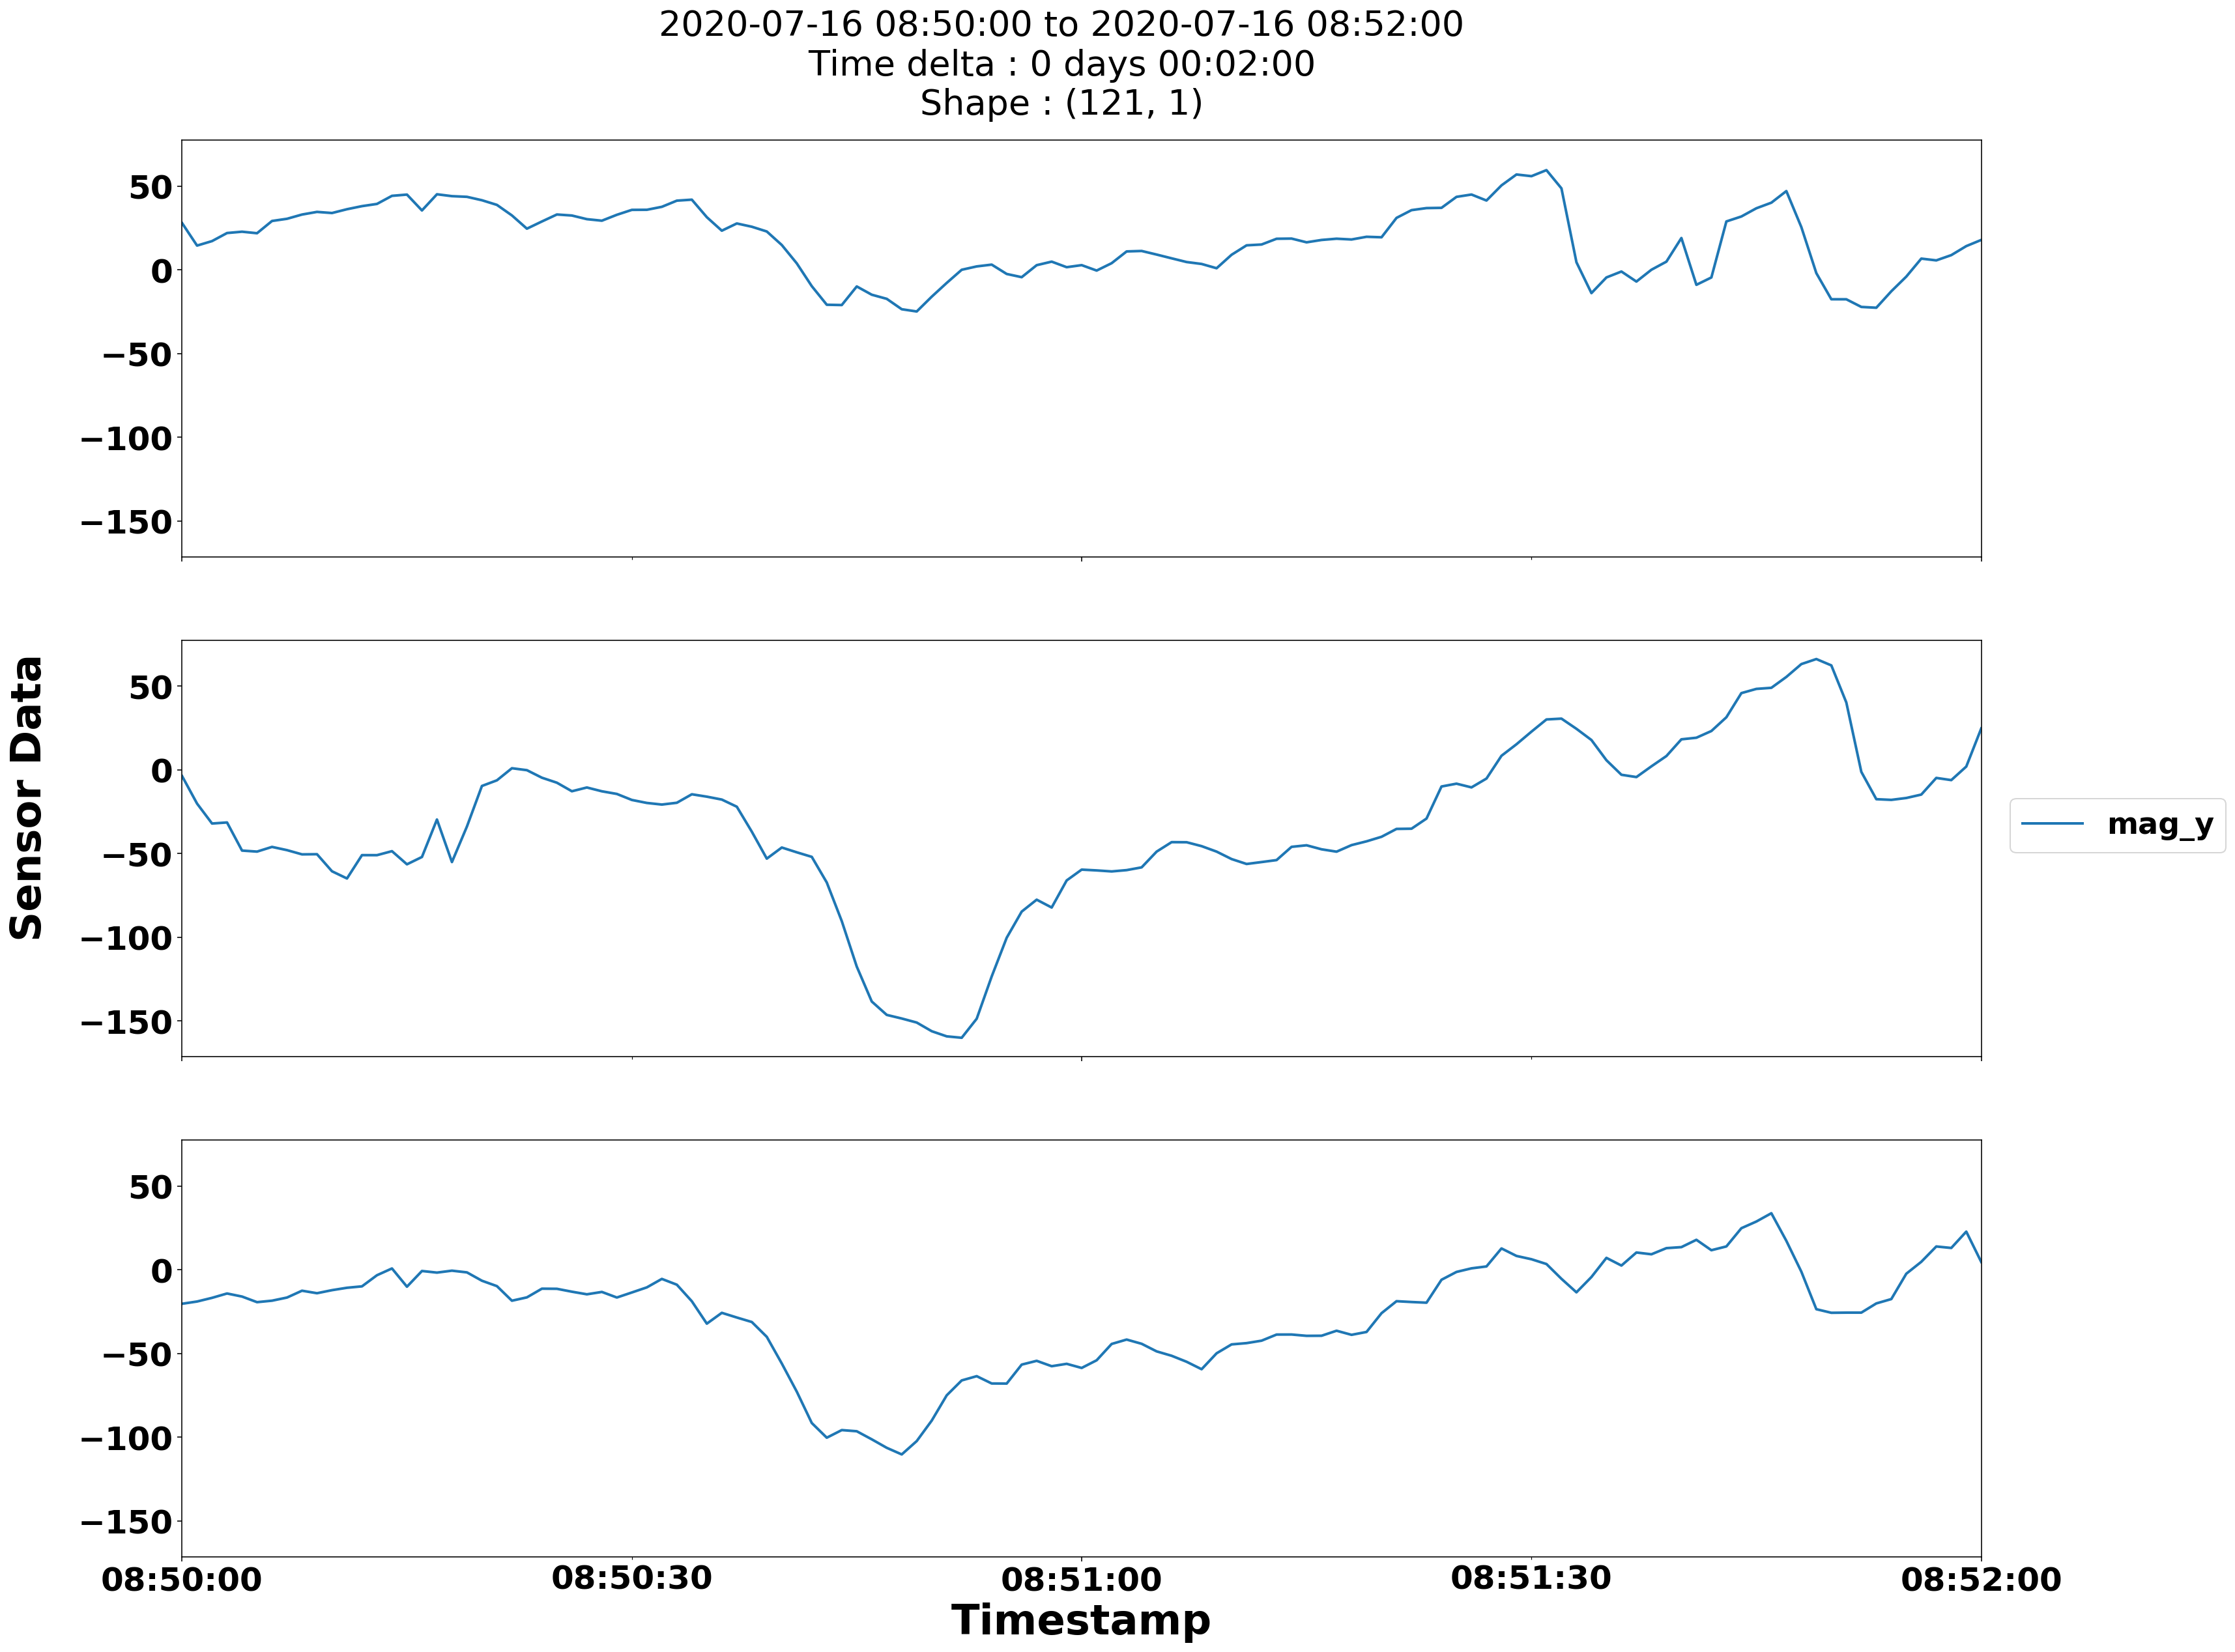

In [39]:
data_display = ['mag_y']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data_ds, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.892), 27, (25, 20),  
                             dir_name, file_name + '_st_2y(ds)', False)

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 3 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



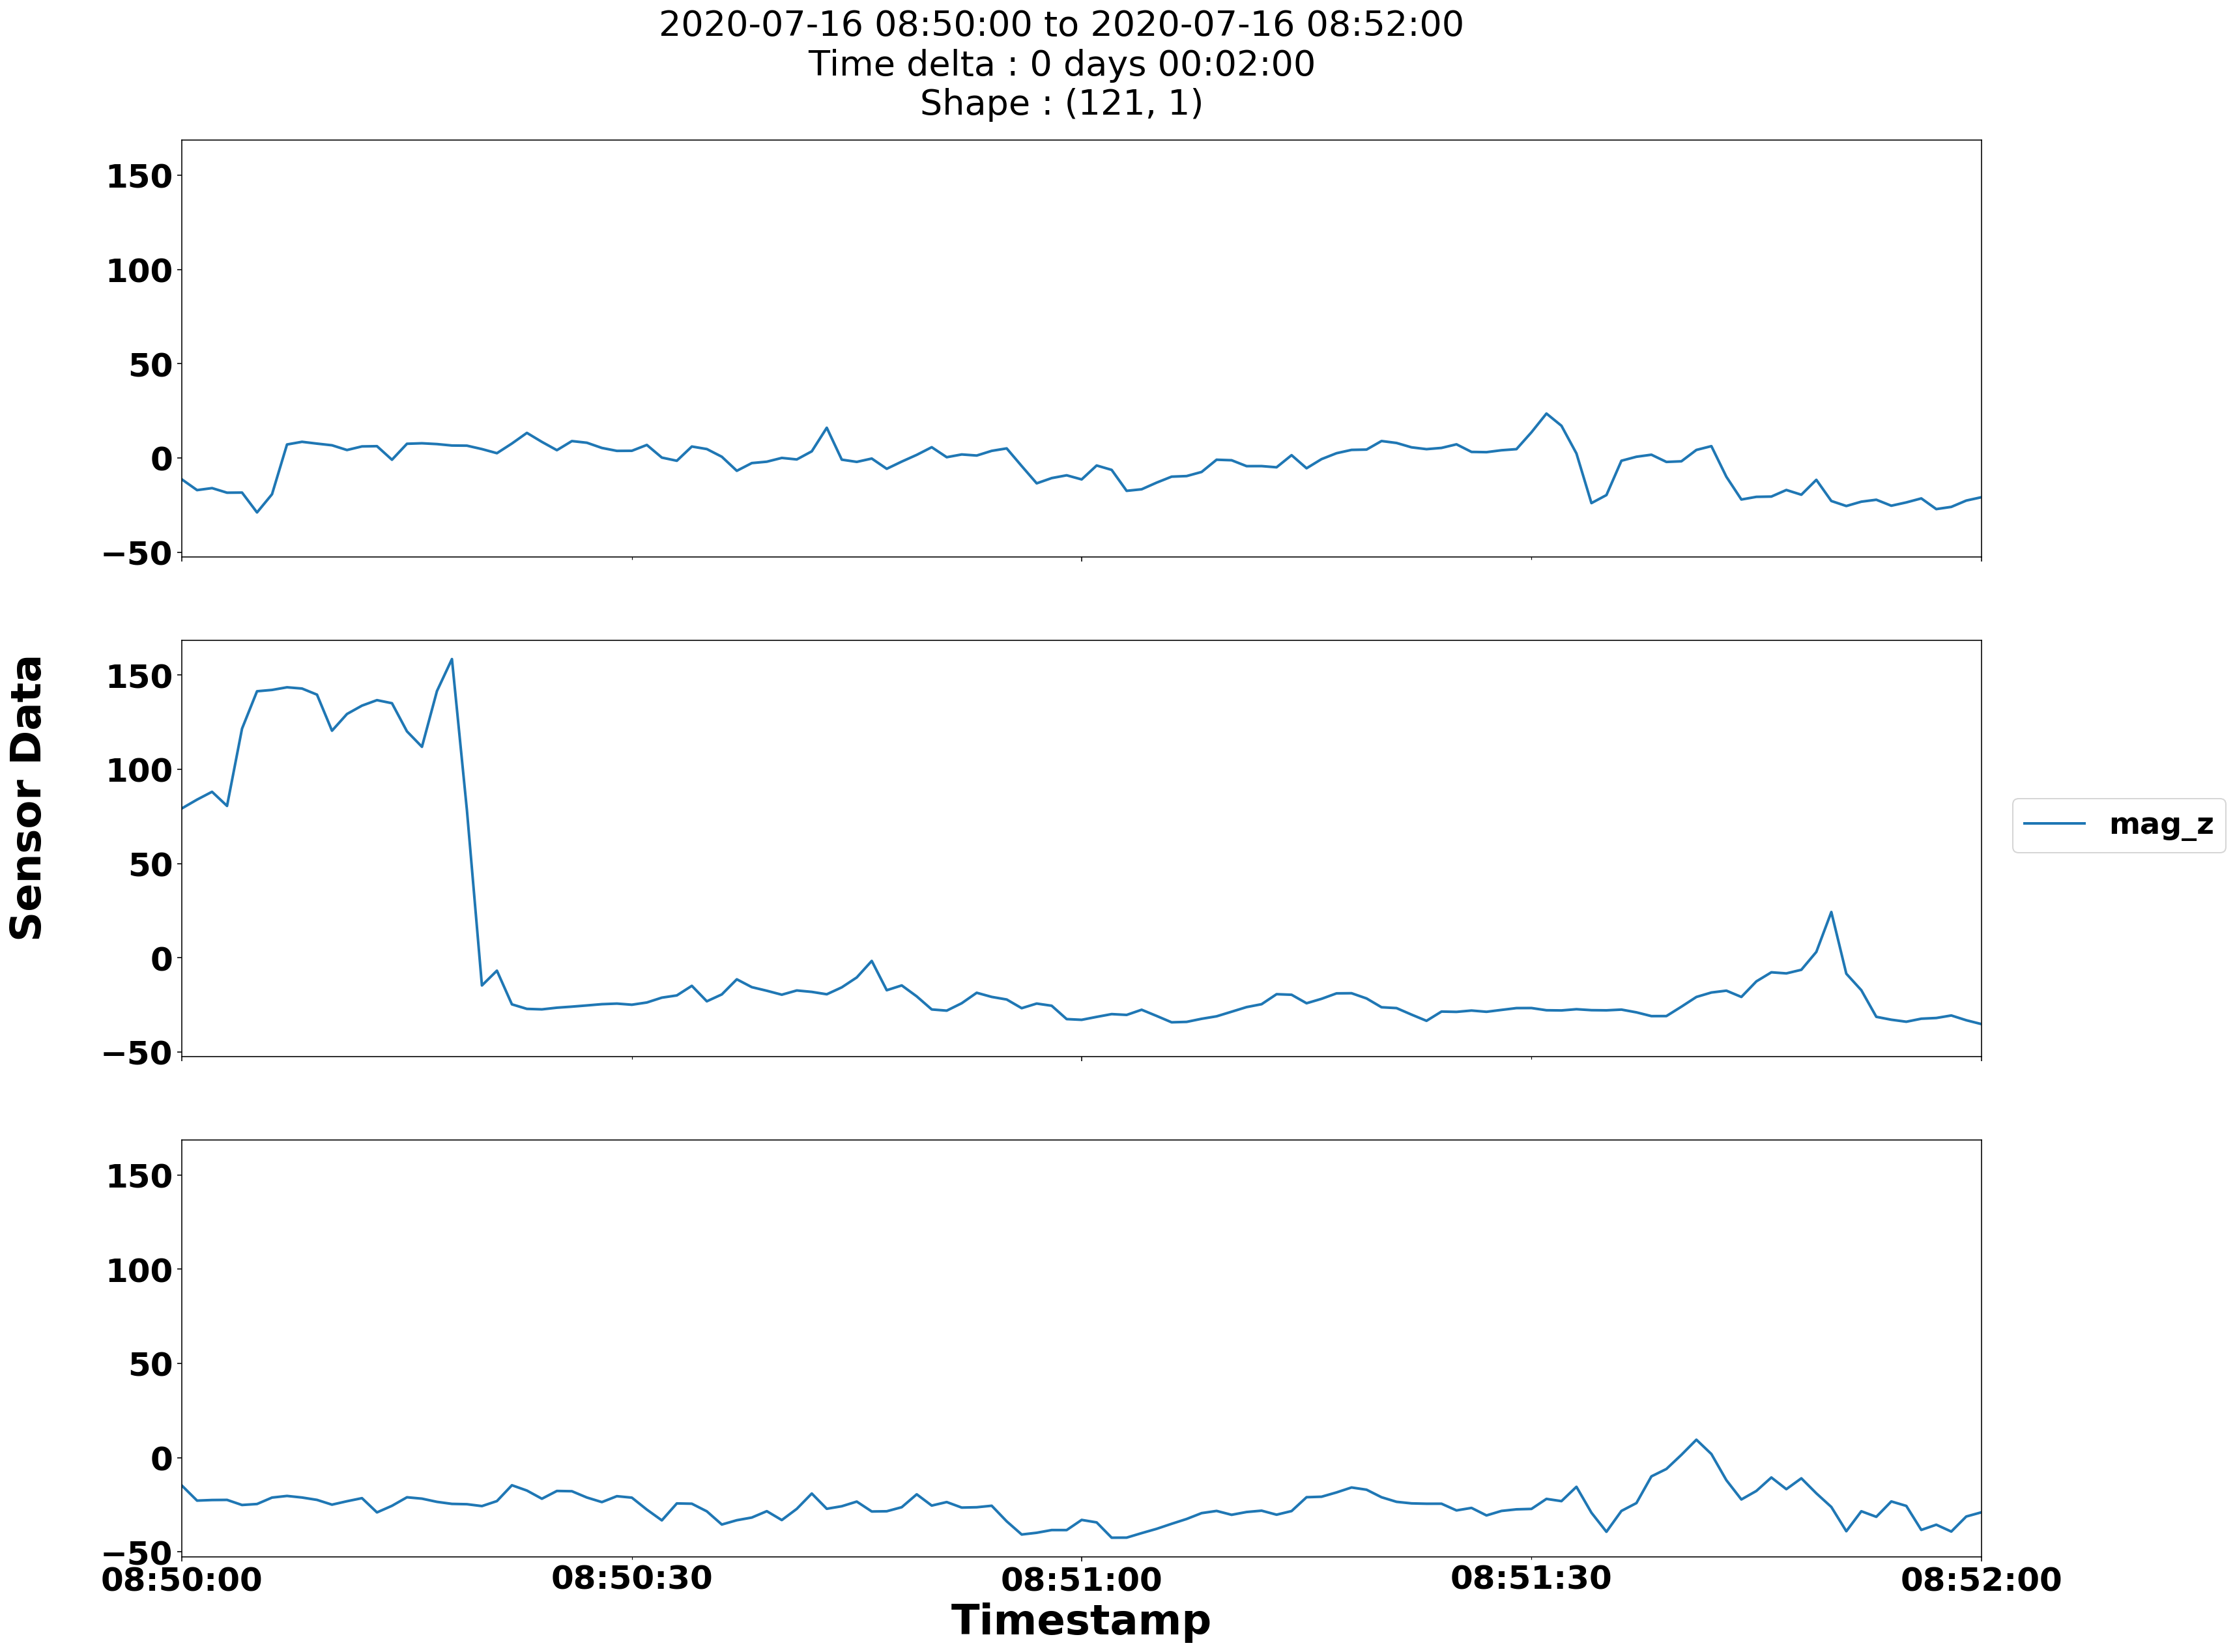

In [40]:
data_display = ['mag_z']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data_ds, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.892), 27, (25, 20), 
                             dir_name, file_name + '_st_2z(ds)', False)

Data 1 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 3 : 
Start :
 2020-07-16 08:50:00
End :
 2020-07-16 08:52:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



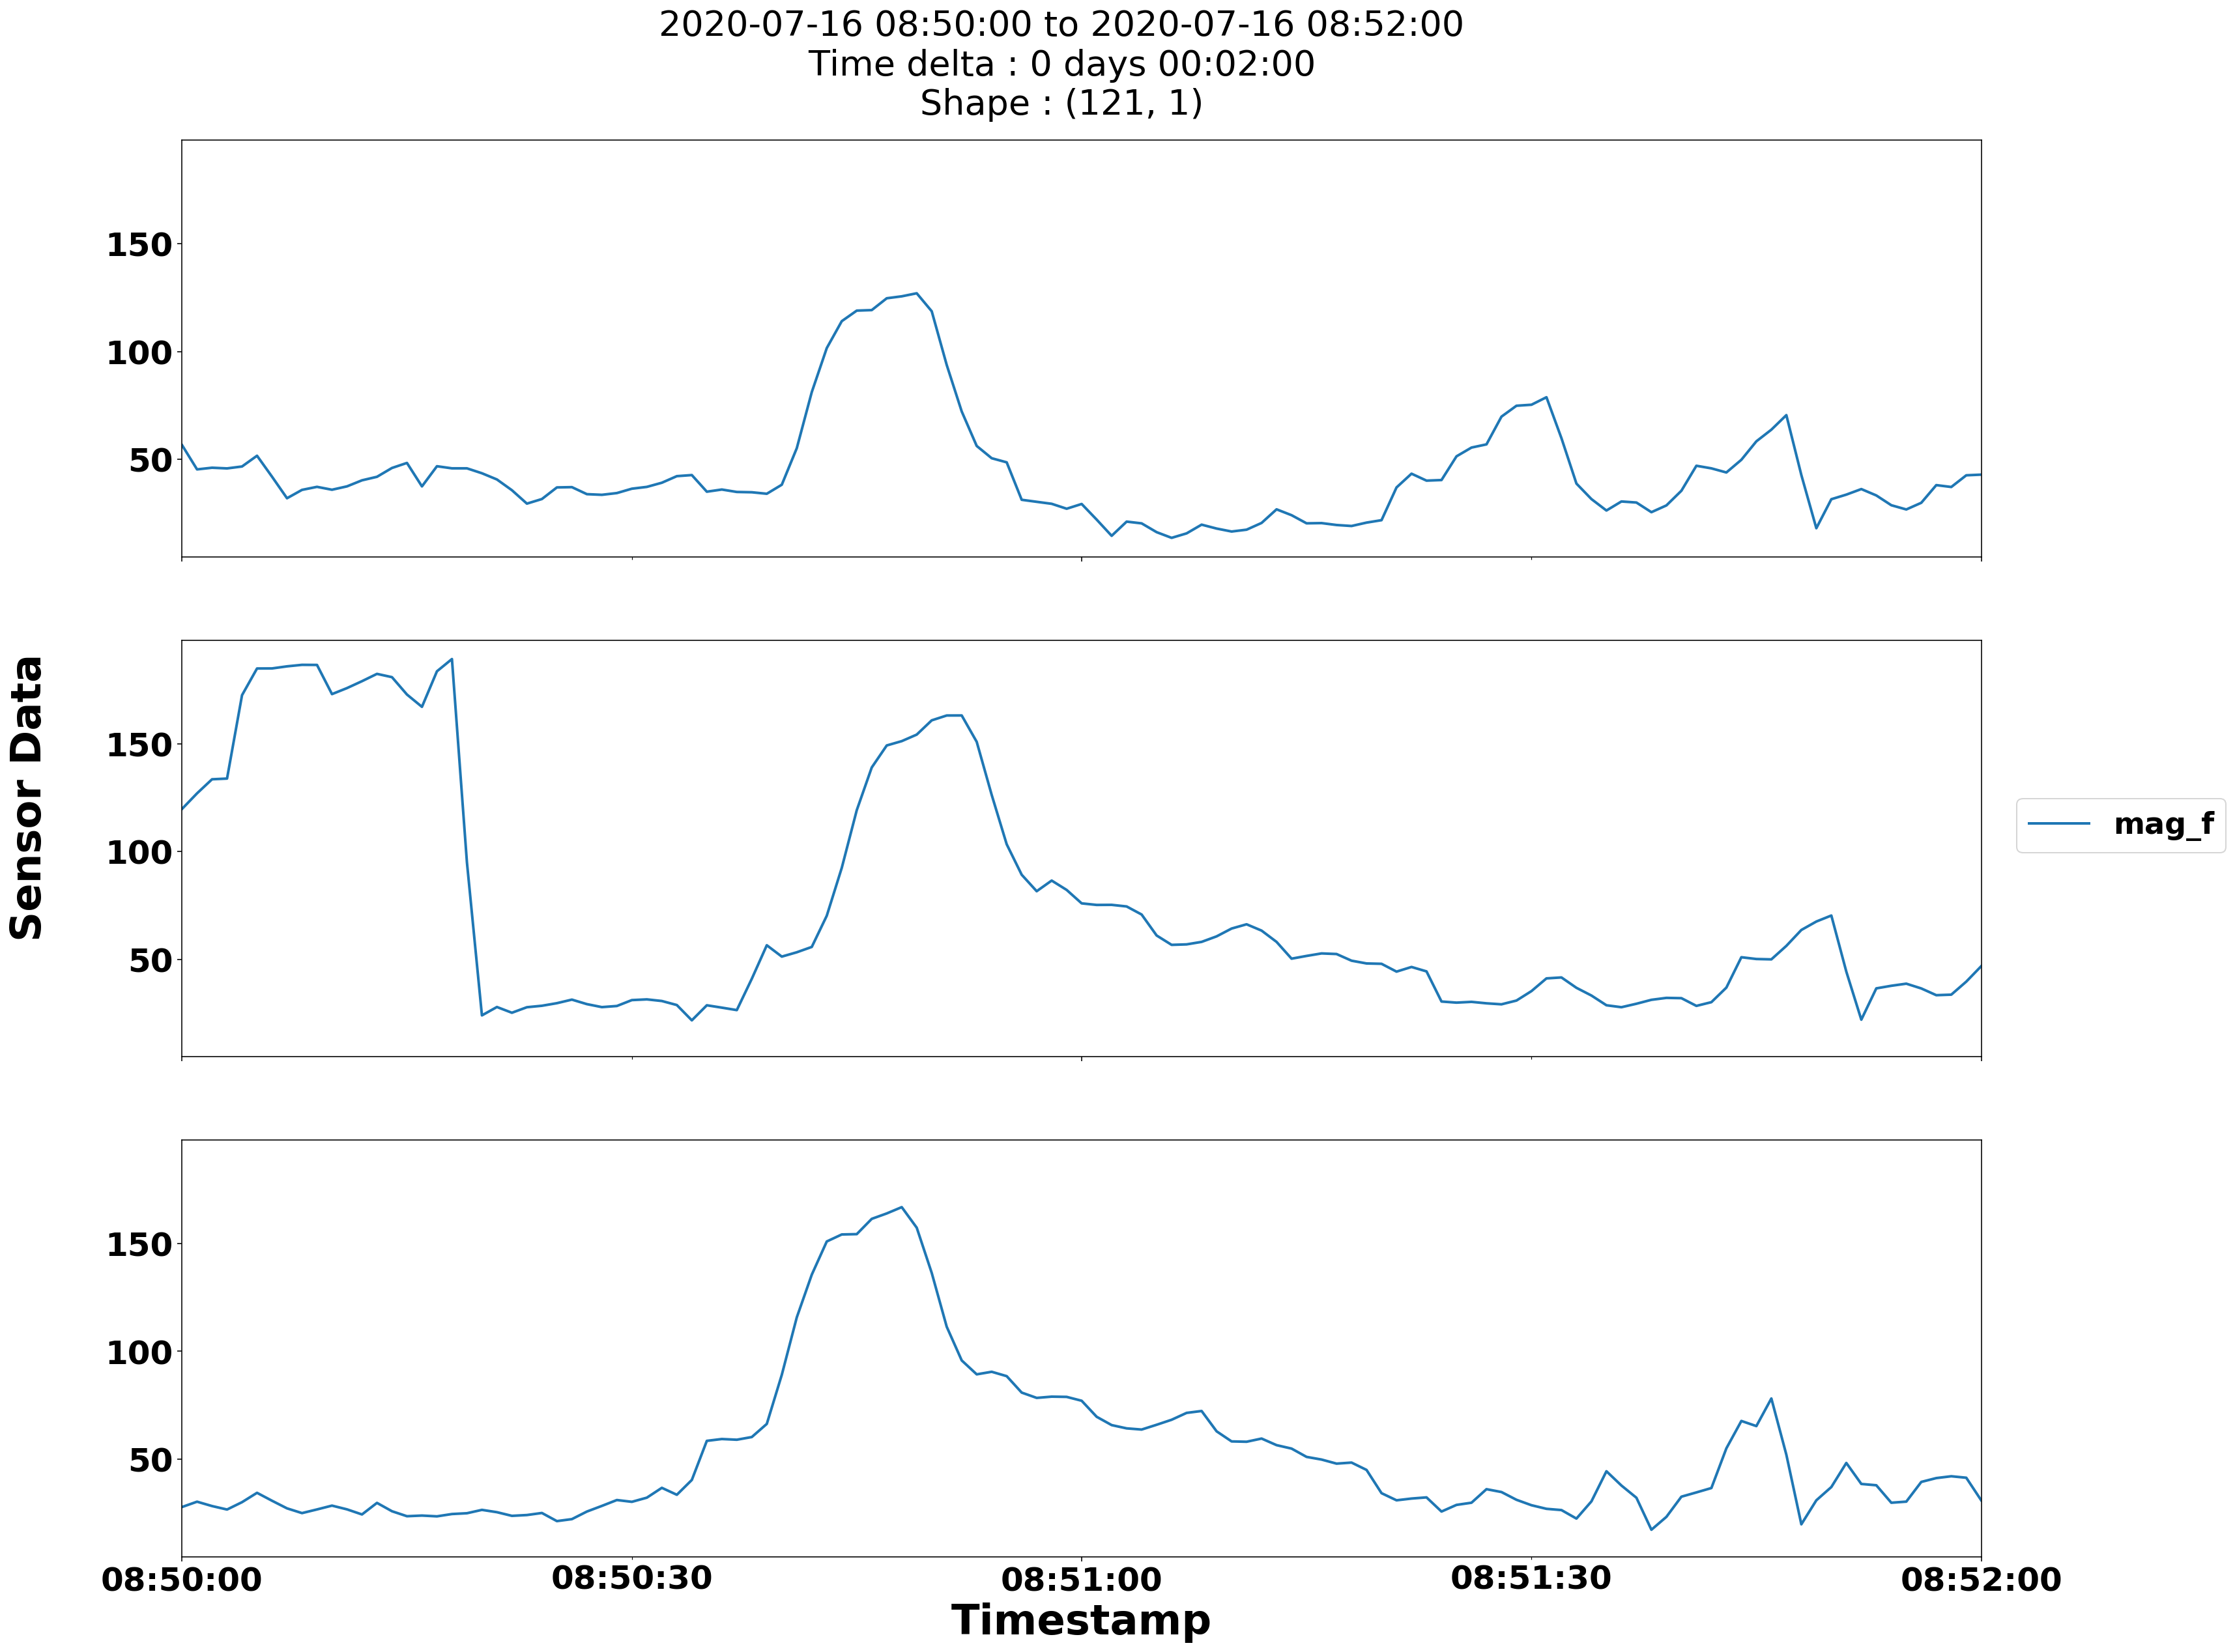

In [41]:
data_display = ['mag_f']
time_from = "2020-07-16 08:50:00"
time_to = "2020-07-16 08:52:00"
data_plotting.plot_data_comp(data_ds, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.892), 27, (25, 20), 
                             dir_name, file_name + '_st_2f(ds)', False)